In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri

from rich.console import Console
from rich.table import Table

import DataExtractor
import datetime

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.diagnostic import het_breuschpagan, het_white, acorr_ljungbox

from scipy.stats import kurtosis, shapiro, kstest, norm, nct, genlogistic
from scipy.stats import fit

import scipy.stats

import warnings
warnings.filterwarnings('ignore')

from arch import arch_model

from scipy.stats import ttest_1samp

In [2]:
NP_RANDOM_SEED = 1234567890

In [3]:
os.environ["PKG_CONFIG_PATH"] = "./lib/pkgconfig/"

In [4]:
r : robjects.R = robjects.r
r['source']('./R/R_Imports.R')

pandas2ri.activate()

r(f'set.seed({NP_RANDOM_SEED})')


R[write to console]: trying URL 'https://cran.stat.unipd.it/src/contrib/strucchange_1.5-3.tar.gz'

R[write to console]: Content type 'application/octet-stream'
R[write to console]:  length 517682 bytes (505 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[writ

x86_64-conda-linux-gnu-cc -I"/home/edoman000/miniconda3/envs/mpsmf_env/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/edoman000/miniconda3/envs/mpsmf_env/include -I/home/edoman000/miniconda3/envs/mpsmf_env/include -Wl,-rpath-link,/home/edoman000/miniconda3/envs/mpsmf_env/lib    -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /home/edoman000/miniconda3/envs/mpsmf_env/include -fdebug-prefix-map=/workspace/croot/r-base_1695428141831/work=/usr/local/src/conda/r-base-4.3.1 -fdebug-prefix-map=/home/edoman000/miniconda3/envs/mpsmf_env=/usr/local/src/conda-prefix  -c strucchange_functions.c -o strucchange_functions.o
x86_64-conda-linux-gnu-cc -I"/home/edoman000/miniconda3/envs/mpsmf_env/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/edoman000/miniconda3/envs/mpsmf_env/include -I/home/edoman000/miniconda3/envs/mpsmf_env/include -Wl,-rpath-link,/home/edoman000

installing to /home/edoman000/miniconda3/envs/mpsmf_env/lib/R/library/00LOCK-strucchange/00new/strucchange/libs
** R
** data
*** moving datasets to lazyload DB
** demo
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (strucchange)
R[write to console]: 

R[write to console]: 
R[write to console]: The downloaded source packages are in
	‘/tmp/RtmpI5V6nK/downloaded_packages’
R[write to console]: 
R[write to console]: 

R[write to console]: Updating HTML index of packages in '.Library'

R[write to console]: Making 'packages.html' ...
R[write to console]:  done

R[write to console]: trying URL 'https://cran.sta

x86_64-conda-linux-gnu-cc -I"/home/edoman000/miniconda3/envs/mpsmf_env/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/edoman000/miniconda3/envs/mpsmf_env/include -I/home/edoman000/miniconda3/envs/mpsmf_env/include -Wl,-rpath-link,/home/edoman000/miniconda3/envs/mpsmf_env/lib    -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /home/edoman000/miniconda3/envs/mpsmf_env/include -fdebug-prefix-map=/workspace/croot/r-base_1695428141831/work=/usr/local/src/conda/r-base-4.3.1 -fdebug-prefix-map=/home/edoman000/miniconda3/envs/mpsmf_env=/usr/local/src/conda-prefix  -c arma.c -o arma.o
x86_64-conda-linux-gnu-cc -I"/home/edoman000/miniconda3/envs/mpsmf_env/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/edoman000/miniconda3/envs/mpsmf_env/include -I/home/edoman000/miniconda3/envs/mpsmf_env/include -Wl,-rpath-link,/home/edoman000/miniconda3/envs/mpsmf_env/lib    

dsumsl.f:1004:72:

 1004 |  10      W(I) = A*X(I) + Y(I)
      |                                                                        1
dsumsl.f:1123:72:

 1123 |  10      Y(I) = S
      |                                                                        1
dsumsl.f:1137:72:

 1137 |  10      X(I) = Y(I) / Z(I)
      |                                                                        1
dsumsl.f:1141:72:

 1141 |  30      X(I) = Y(I) * Z(I)
      |                                                                        1
dsumsl.f:1224:72:

 1224 |  30      Z(I) = CY * Z(I)  -  CS * W(I)
      |                                                                        1
dsumsl.f:1908:72:

 1908 |  10      STEP(I) = G(I) / GNORM
      |                                                                        1
dsumsl.f:1923:72:

 1923 |  20           STEP(I) = -NWTSTP(I)
      |                                                                        1
dsumsl.f:1941:72:

 1941 |  40   

x86_64-conda-linux-gnu-cc -I"/home/edoman000/miniconda3/envs/mpsmf_env/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/edoman000/miniconda3/envs/mpsmf_env/include -I/home/edoman000/miniconda3/envs/mpsmf_env/include -Wl,-rpath-link,/home/edoman000/miniconda3/envs/mpsmf_env/lib    -fpic  -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -pipe -isystem /home/edoman000/miniconda3/envs/mpsmf_env/include -fdebug-prefix-map=/workspace/croot/r-base_1695428141831/work=/usr/local/src/conda/r-base-4.3.1 -fdebug-prefix-map=/home/edoman000/miniconda3/envs/mpsmf_env=/usr/local/src/conda-prefix  -c formats.c -o formats.o
x86_64-conda-linux-gnu-cc -I"/home/edoman000/miniconda3/envs/mpsmf_env/lib/R/include" -DNDEBUG   -DNDEBUG -D_FORTIFY_SOURCE=2 -O2 -isystem /home/edoman000/miniconda3/envs/mpsmf_env/include -I/home/edoman000/miniconda3/envs/mpsmf_env/include -Wl,-rpath-link,/home/edoman000/miniconda3/envs/mpsmf_env/l

installing to /home/edoman000/miniconda3/envs/mpsmf_env/lib/R/library/00LOCK-tseries/00new/tseries/libs
** R
** data
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (tseries)
R[write to console]: 

R[write to console]: 
R[write to console]: The downloaded source packages are in
	‘/tmp/RtmpI5V6nK/downloaded_packages’
R[write to console]: 
R[write to console]: 

R[write to console]: Updating HTML index of packages in '.Library'

R[write to console]: Making 'packages.html' ...
R[write to console]:  done

R[write to console]: trying URL 'https://cran.stat.unipd.it/src/contrib/skewt_1.0.tar.gz'

R[write to console]: Content type 'applicatio

<rpy2.rinterface_lib.sexp.NULLType object at 0x7f9490c48d00> [RTYPES.NILSXP]

In [5]:
def buildTable(testName : str, headerList : list[str], justifyList: list[str]) -> Table :
    table = Table(title = testName)
    for i in range(0, len(headerList)) :
        table.add_column(headerList[i], justify = justifyList[i])
    return table

def kpss_test(dataFrameDict : dict[str, pd.DataFrame], colName : str, cryptoList : list, testTarget : str = "") :
    SIGNIFICANCE_LEVEL = 0.05

    kpssTable : Table = buildTable("KPSS" + " " + testTarget, ["Crypto", "StatValue", "pValue", "Outcome"], ["left", "right", "right", "left"])
    for crypto in cryptoList :
        kpssStat, pValue, _, _ = kpss(dataFrameDict[crypto][colName]) ;
        outcomeString = "Reject" if pValue < SIGNIFICANCE_LEVEL else "Accept"
        kpssTable.add_row(crypto, str(kpssStat), str(pValue), outcomeString)
    console = Console()
    console.print(kpssTable)

def adf_test(dataFrameDict : dict[str, pd.DataFrame], colName : str, cryptoList : list, testTarget : str = "") :
    SIGNIFICANCE_LEVEL = 0.05

    adfullerTable = buildTable("ADF" + " " + testTarget, ["Crypto", "StatValue", "pValue", "Outcome"], ["left", "right", "right", "left"])
    for crypto in cryptoList :
        result = adfuller(dataFrameDict[crypto][colName]) ;
        adfullerStat : float = result[0]
        pValue = result[1]
        outcomeString = "Reject" if pValue < SIGNIFICANCE_LEVEL else "Accept"
        adfullerTable.add_row(crypto, str(adfullerStat), str(pValue), outcomeString)
    console = Console()
    console.print(adfullerTable)

def breusch_pagan_test(dataFrameDict : dict[str, pd.DataFrame], colName : str, cryptoList : str, testTarget : str = "", printSummary : bool = False) :
    SIGNIFICANCE_LEVEL = 0.05
    console = Console()
    bpTable = buildTable("Breusch-Pagan", ["Crypto", "StatValue", "pValue", "Outcome"], ["left", "right", "right", "left"])
    for crypto in cryptoList :
        x = sm.add_constant(dataFrameDict[crypto][colName].index.tolist())
        model = sm.OLS(dataFrameDict[crypto][colName].values, x)
        fittedModel = model.fit()
        if printSummary : 
            console.print(crypto + "\n" + str(fittedModel.summary()))
        
        residKurtosis = kurtosis(fittedModel.resid)

        # In the general description of LM test, Greene mentions that this test exaggerates the significance of results in small or moderately large samples. 
        # In this case the F-statistic is preferable.

        # BREUSCH-PAGAN TEST
        _, _, fValue, f_pvalue = het_breuschpagan(fittedModel.resid, fittedModel.model.exog, residKurtosis > 0.05)
        statValue, pValue = fValue, f_pvalue
        
        outcomeString = "Reject" if pValue < SIGNIFICANCE_LEVEL else "Accept"
        bpTable.add_row(crypto, str(statValue), str(pValue), outcomeString)
    console.print(bpTable)

def white_test(dataFrameDict : dict[str, pd.DataFrame], colName : str, cryptoList : str, testTarget : str = "", printSummary : bool = False) :
    SIGNIFICANCE_LEVEL = 0.05
    console = Console()
    whiteTable = buildTable("White" + " " + testTarget, ["Crypto", "StatValue", "pValue", "Outcome"], ["left", "right", "right", "left"])
    for crypto in cryptoList :
    
        x = sm.add_constant(dataFrameDict[crypto][colName].index.tolist())
        model = sm.OLS(dataFrameDict[crypto][colName].values, x)
        fittedModel = model.fit()
        if printSummary :
            console.print(crypto + "\n" + str(fittedModel.summary()))
        
        _, _, fValue, f_pvalue = het_white(fittedModel.resid, fittedModel.model.exog)
        statValue, pValue = fValue, f_pvalue
        outcomeString = "Reject" if pValue < SIGNIFICANCE_LEVEL else "Accept"
        whiteTable.add_row(crypto, str(statValue), str(pValue), outcomeString)
    
    console.print(whiteTable)

def ljung_box_test(dataFrameDict : dict[str, pd.DataFrame], colName : str, cryptoList : list) :
    N_LAGS = 10
    SIGNIFICANCE_LEVEL = 0.05
    ljungTable = buildTable("Ljung-Box", ["Crypto", "StatValue", "pValue", "Outcome"], ["left", "right", "right", "left"])
    for crypto in cryptoList :
        testResult = acorr_ljungbox(dataFrameDict[crypto][colName], lags = N_LAGS)
        statValue, pValue = testResult["lb_stat"][N_LAGS], testResult["lb_pvalue"][N_LAGS]
        outcomeString = "Reject" if pValue < SIGNIFICANCE_LEVEL else "Accept"
        ljungTable.add_row(crypto, str(statValue), str(pValue), outcomeString)

    console = Console()
    console.print(ljungTable)

def correlograms(
        dataFrame : dict[str, pd.DataFrame], 
        colName : str, 
        cryptoList : list, 
        titleAuto : str, 
        titlePartial : str, 
        zeroAuto : bool = True, 
        yLimsAuto : bool = False,
        zeroPar : bool = True,
        yLimsPar : bool = False
    ) :
    N_LAGS = 10

    fig, ax = plt.subplots(figsize=(20, 15), nrows = len(cryptoList), ncols = 2)
    fig.tight_layout(h_pad = 2, w_pad =2)
    i = 0 
    for crypto in cryptoList :
        plot_acf(x = dataFrame[crypto][colName], ax = ax[i][0], lags = N_LAGS, title = titleAuto + " " + crypto, zero = zeroAuto, auto_ylims = yLimsAuto)
        i += 1

    i = 0
    for crypto in cryptoList :
        plot_pacf(x = dataFrame[crypto][colName], ax = ax[i][1], lags = N_LAGS, title = titlePartial + " " + crypto, zero = zeroPar, auto_ylims = yLimsPar)
        i += 1
        
    plt.show()
    plt.clf()

def shapiro_wilk(dataFrameDict : dict[str, pd.DataFrame], colName : str, cryptoList : str, targetName : str = "") :
    # Esegue il test di normalità di Shapiro-Wilk
    SIGNIFICANCE_LEVEL = 0.05
    shapiroTable = buildTable("Shapiro-Wilk " + targetName, ["Crypto", "StatValue", "pValue", "Outcome"], ["left", "right", "right", "left"])
    for crypto in cryptoList:   
        statValue, pValue = shapiro(dataFrameDict[crypto][colName])
        outcomeString = "Reject" if pValue < SIGNIFICANCE_LEVEL else "Accept"
        shapiroTable.add_row(crypto, str(statValue), str(pValue), outcomeString)
    console = Console()
    console.print(shapiroTable)

def kolmogorov_smirnov(dataFrameDict : dict[str, pd.DataFrame], colName : str, cryptoList : str, targetName : str = "") :
    SIGNIFICANCE_LEVEL = 0.05
    ksTable = buildTable("Kolmogorov-Smirnov " + targetName, ["Crypto", "StatValue", "pValue", "Outcome"], ["left", "right", "right", "left"])
    for crypto in cryptoList:   
        statValue, pValue = kstest(dataFrameDict[crypto][colName], norm.cdf)
        outcomeString = "Reject" if pValue < SIGNIFICANCE_LEVEL else "Accept"
        ksTable.add_row(crypto, str(statValue), str(pValue), outcomeString)
    console = Console()
    console.print(ksTable)



# Analisi Fianziaria di Criptovalute

Nel contesto economico contemporaneo, le criptovalute sono emerse come una forza trainante, ridefinendo paradigmi finanziari e aprendo nuovi orizzonti nell'ambito degli investimenti. 

Una criptovaluta è una forma di valuta digitale basata su crittografia che sfrutta la tecnologia blockchain e algoritmi di consenso distribuito per garantire la sicurezza e la trasparenza delle transazioni all'interno di reti peer-to-peer. 

La decentralizzazione, l'anonimato e l'assenza di controllo da parte di istituzioni centrali sono solo alcune delle caratteristiche distintive che hanno catalizzato l'interesse di investitori, sviluppatori e appassionati di tecnologia.

L'accelerazione dell'adozione delle criptovalute ha comportato la creazione di un vasto e dinamico ecosistema, suscitando un crescente interesse anche da parte degli investitori tradizionali. In questo contesto, l'analisi finanziaria delle criptovalute emerge come una disciplina cruciale per comprendere il potenziale e la sostenibilità di queste nuove forme di asset digitali.

## 0] Analisi del Mercato

### 0.1] Cosa si intende per liquidità in un mercato finanziario?

La liquidità di un mercato finanziario si riferisce alla facilità con cui gli investitori possono comprare o vendere titoli finanziari (come azioni, obbligazioni, valute, ecc.) senza causare significative fluttuazioni nei prezzi di mercato. In altre parole, un mercato finanziario è considerato liquido quando gli investitori possono effettuare transazioni con relativa rapidità ed efficienza, con costi di transazione minimi e senza causare impatti significativi sui prezzi degli strumenti finanziari.

Un mercato finanziario altamente liquido è caratterizzato da una maggiore attività di scambio di titoli, un elevato numero di partecipanti, un elevato volume di scambi giornalieri e una stretta differenza tra i prezzi di acquisto (offerta) e i prezzi di vendita (domanda), noti come spread. Al contrario, in un mercato finanziario con scarsa liquidità, può essere difficile acquistare o vendere titoli e ciò può comportare costi di transazione più elevati e prezzi più volatili.

La liquidità è un importante fattore da considerare quando si decide di investire in un mercato finanziario. I mercati altamente liquidi sono generalmente considerati meno rischiosi, poiché gli investitori possono entrare o uscire facilmente dalle posizioni. D'altra parte, i mercati con bassa liquidità possono comportare maggiori rischi e sfide per gli investitori, poiché potrebbe essere difficile convertire i propri investimenti in denaro contante senza influire in modo significativo sui prezzi del mercato.

### 0.2] Come funziona l'entrata e l'uscita dal mercato delle criptovalute

1. Acquisto di criptovalute:
   - Per entrare nel mercato delle criptovalute, bisogna prima acquistare delle criptovalute. Per farlo si passa attraverso piattaforme di scambio (exchange) specializzate, come Binance, Coinbase o Kraken. Queste piattaforme consentono di acquistare criptovalute usando denaro fiat (come dollari o euro) o altre criptovalute.
   - Quindi si crea un account su una di queste piattaforme, si completa il processo di verifica dell'identità (KYC) e collegare il proprio conto bancario o utilizzare altri metodi di pagamento accettati.
   - Dopo aver finanziato il proprio account, si possono acquistare criptovalute scegliendo tra una vasta gamma di opzioni.

2. Conservazione delle criptovalute:
   - Dopo aver acquistato criptovalute, è importante conservarle in modo sicuro. Questo può essere fatto utilizzando portafogli digitali, che possono essere portafogli online (hot wallet) o portafogli offline (cold wallet). I portafogli offline sono generalmente considerati più sicuri perché non sono esposti a potenziali rischi online.

3. Negoziazione:
   - Una volta che si hanno criptovalute nel proprio portafoglio, si può iniziare a negoziarle sulle piattaforme di scambio. Si possono comprare o vendere criptovalute in base alle tue preferenze e alle condizioni di mercato.
   - A differenza dei mercati tradizionali, i mercati delle criptovalute sono attivi 24/7, quindi si può negoziare in qualsiasi momento, anche durante i fine settimana e le festività.

4. Uscita dal mercato:
   - Per uscire dal mercato delle criptovalute, si possono vendere le proprie criptovalute su una piattaforma di scambio e convertirle in denaro fiat o altre criptovalute.
   - Dopo la vendita, si possono prelevare i fondi sul tuo conto bancario o utilizzare altre opzioni di prelievo offerte dalla piattaforma di scambio.

### 0.3] Liquidità del Mercato Crypto

Per quanto riguarda la liquidità del mercato delle criptovalute, essa può variare notevolmente da una criptovaluta all'altra e da un momento all'altro. 

Le criptovalute più popolari come Bitcoin ed Ethereum tendono ad avere mercati più liquidi, con un alto volume di scambi giornalieri. Tuttavia, le criptovalute meno conosciute o di nicchia possono avere mercati meno liquidi, il che significa che potrebbe essere più difficile acquistare o vendere grandi quantità senza influire significativamente sui prezzi.

In generale, il mercato delle criptovalute è noto per la sua volatilità, il che può comportare fluttuazioni dei prezzi molto rapide e ampie.

## 1] Estrazione dei Dati
I dati sono stati estratti dal sito *Yahoo Finance* usando delle REST API. I dati sono stati scaricati per quattro criptovalute: <br>
* *Ethereum*
* *Bitcoin*
* *Dash*
* *XRP*

I dati sono stati scaricati per l'intervallo temporale tra *2018-01-01* e *2023-09-01* <br>

In [6]:
cryptoList : list[str] = ["ETH-USD", "BTC-USD", "DASH-USD", "XRP-USD"]
colors = ["royalblue", "green", "red", "fuchsia"]

In [7]:
extractionStartDate : str = "2018-01-01"
extractionEndDate : str = "2023-09-01"
interval : str = "daily"

for crypto in cryptoList :
    DataExtractor.extractData(crypto, extractionStartDate, extractionEndDate, interval)

In [8]:
cryptoDataFrameDict : dict[str, pd.DataFrame] = {}
for crypto in cryptoList :
    inputFileName : str = crypto + "_Data.csv"
    inputFilePath = os.path.join("./", "data", inputFileName)
    dataFrame : pd.DataFrame = pd.read_csv(filepath_or_buffer = inputFilePath)
    cryptoDataFrameDict[crypto] = dataFrame 

Per tenere conto dell'inflazione degli ultimi anni consideriamo una correzione sui prezzi fatta usando il *Consumer Price Index* (CPI), ottenuto estraendo i dati dal sito della FRED.
I dati estratti da quest'ultimo sito sono mensili, mentre i dati scaricati per le criptovalute sono giornalieri. Per rendere i dati omogenei procediamo facendo un'interpolazione lineare del CPI, ottenendo il dato per ogni giorno.

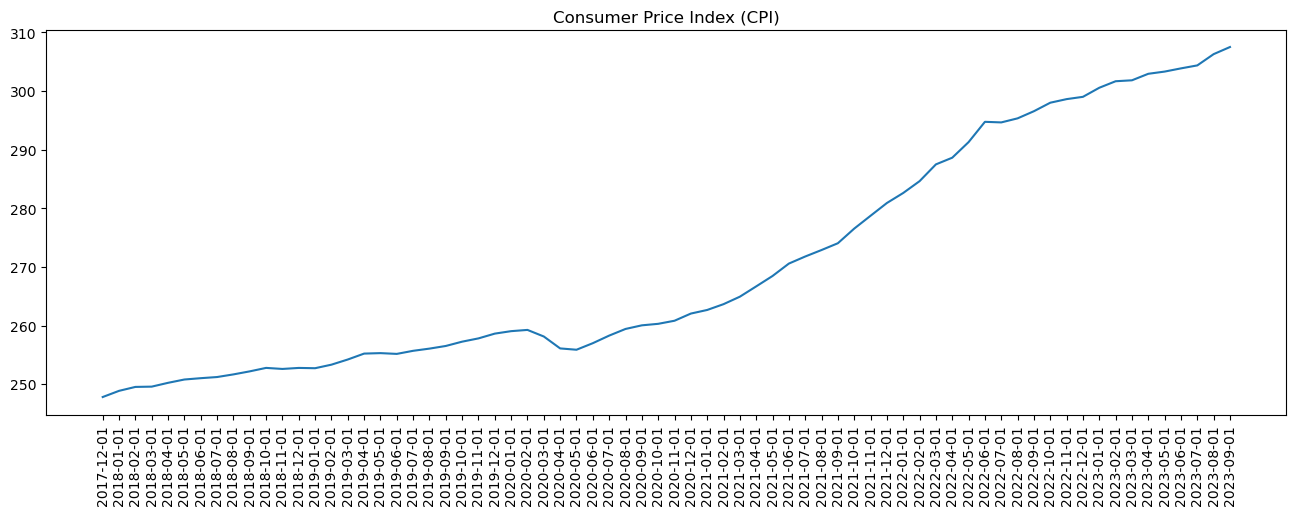

<Figure size 640x480 with 0 Axes>

In [9]:
cpiDataFrame = pd.read_csv(
    os.path.join("./", "data", "ConsumerPriceIndex.csv"),
    date_format = "%Y-%m-%d",
    parse_dates = ["DATE"]
    )
cpiDataFrame["DATE"] = pd.to_datetime(cpiDataFrame["DATE"])

figure, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (16,5))
ax.plot(cpiDataFrame["CPIAUCSL"])
ax.set_title("Consumer Price Index (CPI)")
ax.set_xticks(np.arange(0, cpiDataFrame["DATE"].shape[0], 1))
xLabels = cpiDataFrame["DATE"].astype(str)

ax.set_xticklabels(xLabels, rotation = 90)
plt.show()
plt.clf()

In [10]:

cpiInterpolatedDataFrame : pd.DataFrame = pd.DataFrame(columns = ["Date", "CPI"])

for i in range(0, cpiDataFrame.shape[0] - 1) :
    firstValue = cpiDataFrame.iloc[i]["CPIAUCSL"]
    secondValue = cpiDataFrame.iloc[i + 1]["CPIAUCSL"]
    valueDiff = secondValue - firstValue

    firstDate = cpiDataFrame.iloc[i]["DATE"]
    secondDate = cpiDataFrame.iloc[i + 1]["DATE"]
    dateDiff = secondDate - firstDate

    diffDays = dateDiff.days
    interValue = valueDiff / diffDays

    interpolatedValue = firstValue
    currDate = firstDate
    for dateIncr in range(1, diffDays + 1) :
        newRow = [currDate, interpolatedValue]
        cpiInterpolatedDataFrame.loc[len(cpiInterpolatedDataFrame)] = newRow

        interpolatedValue = interpolatedValue + interValue
        currDate = currDate + pd.Timedelta(days = 1)

lastDate = currDate
lastValue = interpolatedValue

cpiInterpolatedDataFrame.loc[len(cpiInterpolatedDataFrame)] = [lastDate, lastValue]
dateTimeStartDate = datetime.datetime.strptime(extractionStartDate, '%Y-%m-%d')
cpiFirstDate = dateTimeStartDate - datetime.timedelta(days = 1)
cpiInterpolatedDataFrame = cpiInterpolatedDataFrame[cpiInterpolatedDataFrame["Date"] >= datetime.datetime(year = cpiFirstDate.year, month = cpiFirstDate.month, day = cpiFirstDate.day)]
cpiInterpolatedDataFrame.reset_index(drop = True, inplace = True)

cpiInterpolatedDataFrame["Infation"] = cpiInterpolatedDataFrame["CPI"].pct_change() * 100
cpiInterpolatedDataFrame.dropna(inplace = True)
cpiInterpolatedDataFrame.reset_index(inplace = True, drop = True)
cpiInterpolatedDataFrame

Date         CPI  Infation
0    2018-01-01  248.859000  0.013664
1    2018-01-02  248.880613  0.008685
2    2018-01-03  248.902226  0.008684
3    2018-01-04  248.923839  0.008683
4    2018-01-05  248.945452  0.008683
...         ...         ...       ...
2065 2023-08-28  307.324613  0.012723
2066 2023-08-29  307.363710  0.012722
2067 2023-08-30  307.402806  0.012720
2068 2023-08-31  307.441903  0.012718
2069 2023-09-01  307.481000  0.012717

[2070 rows x 3 columns]

Ottenuto il dato sull'inflazione andiamo a normalizzare i prezzi ottenendo:

$ NormalizedClose = Close * (1- Inflation)$

In [11]:
for crypto in cryptoList :
    dataFrame : pd.DataFrame = cryptoDataFrameDict[crypto]
    dataFrame["NormalizedClose"] = dataFrame["Close"] * (1 - (cpiInterpolatedDataFrame["Infation"]))

cryptoDataFrameDict["ETH-USD"]

Date         Open         High          Low        Close  \
0     2018-01-01   755.757019   782.530029   742.004028   772.640991   
1     2018-01-02   772.346008   914.830017   772.346008   884.443970   
2     2018-01-03   886.000000   974.471008   868.450989   962.719971   
3     2018-01-04   961.713013  1045.079956   946.085999   980.921997   
4     2018-01-05   975.750000  1075.390015   956.325012   997.719971   
...          ...          ...          ...          ...          ...   
2065  2023-08-28  1657.439819  1659.328735  1627.446777  1652.457397   
2066  2023-08-29  1652.274170  1742.637329  1639.576172  1729.725708   
2067  2023-08-30  1729.676636  1730.564697  1697.147217  1705.112183   
2068  2023-08-31  1705.364502  1720.011963  1634.850952  1645.639160   
2069  2023-09-01  1645.581299  1653.531738  1603.034180  1628.491211   

        Adj Close       Volume  NormalizedClose  
0      772.640991   2595760128       762.083453  
1      884.443970   5783349760       876.762752  
2      962.719971   5093159936       954.359668  
3      980.921997   6502859776       972.404366  
4      997.719971   6683149824       989.057231  
...           ...          ...              ...  
2065  1652.457397   4855588534      1631.432731  
2066  1729.725708  11304916729      1707.720736  
2067  1705.112183   5023904190      1683.423095  
2068  1645.639160   6593153505      1624.709233  
2069  1628.491211   6104510092      1607.782013  

[2070 rows x 8 columns]

## 2] Analisi del Dataset

### 2.1] Passaggio al Logaritmo

Per avere una maggiore stabilità dei valori numerici, passiamo allo studio del logaritmo dei prezzi di chiusura considerandolo come proxy dello studio condotto sui valori originali.

In [12]:
for crypto in cryptoList :
    cryptoDataFrameDict[crypto]["LogClosePrice"] = np.log10(cryptoDataFrameDict[crypto]["NormalizedClose"])

cryptoDataFrameDict["BTC-USD"]

Date          Open          High           Low         Close  \
0     2018-01-01  14112.200195  14112.200195  13154.700195  13657.200195   
1     2018-01-02  13625.000000  15444.599609  13163.599609  14982.099609   
2     2018-01-03  14978.200195  15572.799805  14844.500000  15201.000000   
3     2018-01-04  15270.700195  15739.700195  14522.200195  15599.200195   
4     2018-01-05  15477.200195  17705.199219  15202.799805  17429.500000   
...          ...           ...           ...           ...           ...   
2065  2023-08-28  26089.615234  26198.578125  25880.599609  26106.150391   
2066  2023-08-29  26102.486328  28089.337891  25912.628906  27727.392578   
2067  2023-08-30  27726.083984  27760.160156  27069.207031  27297.265625   
2068  2023-08-31  27301.929688  27456.078125  25752.929688  25931.472656   
2069  2023-09-01  25934.021484  26125.869141  25362.609375  25800.724609   

         Adj Close       Volume  NormalizedClose  LogClosePrice  
0     13657.200195  10291200000     13470.585182       4.129386  
1     14982.099609  16846600192     14851.983090       4.171784  
2     15201.000000  16871900160     15068.993839       4.178084  
3     15599.200195  21783199744     15463.747809       4.189315  
4     17429.500000  23840899072     17278.167730       4.237498  
...            ...          ...              ...            ...  
2065  26106.150391  11002805166     25773.994720       4.411182  
2066  27727.392578  29368391712     27374.654281       4.437349  
2067  27297.265625  16343655235     26950.043426       4.430559  
2068  25931.472656  20181001451     25601.665345       4.408268  
2069  25800.724609  17202862221     25472.621935       4.406074  

[2070 rows x 9 columns]

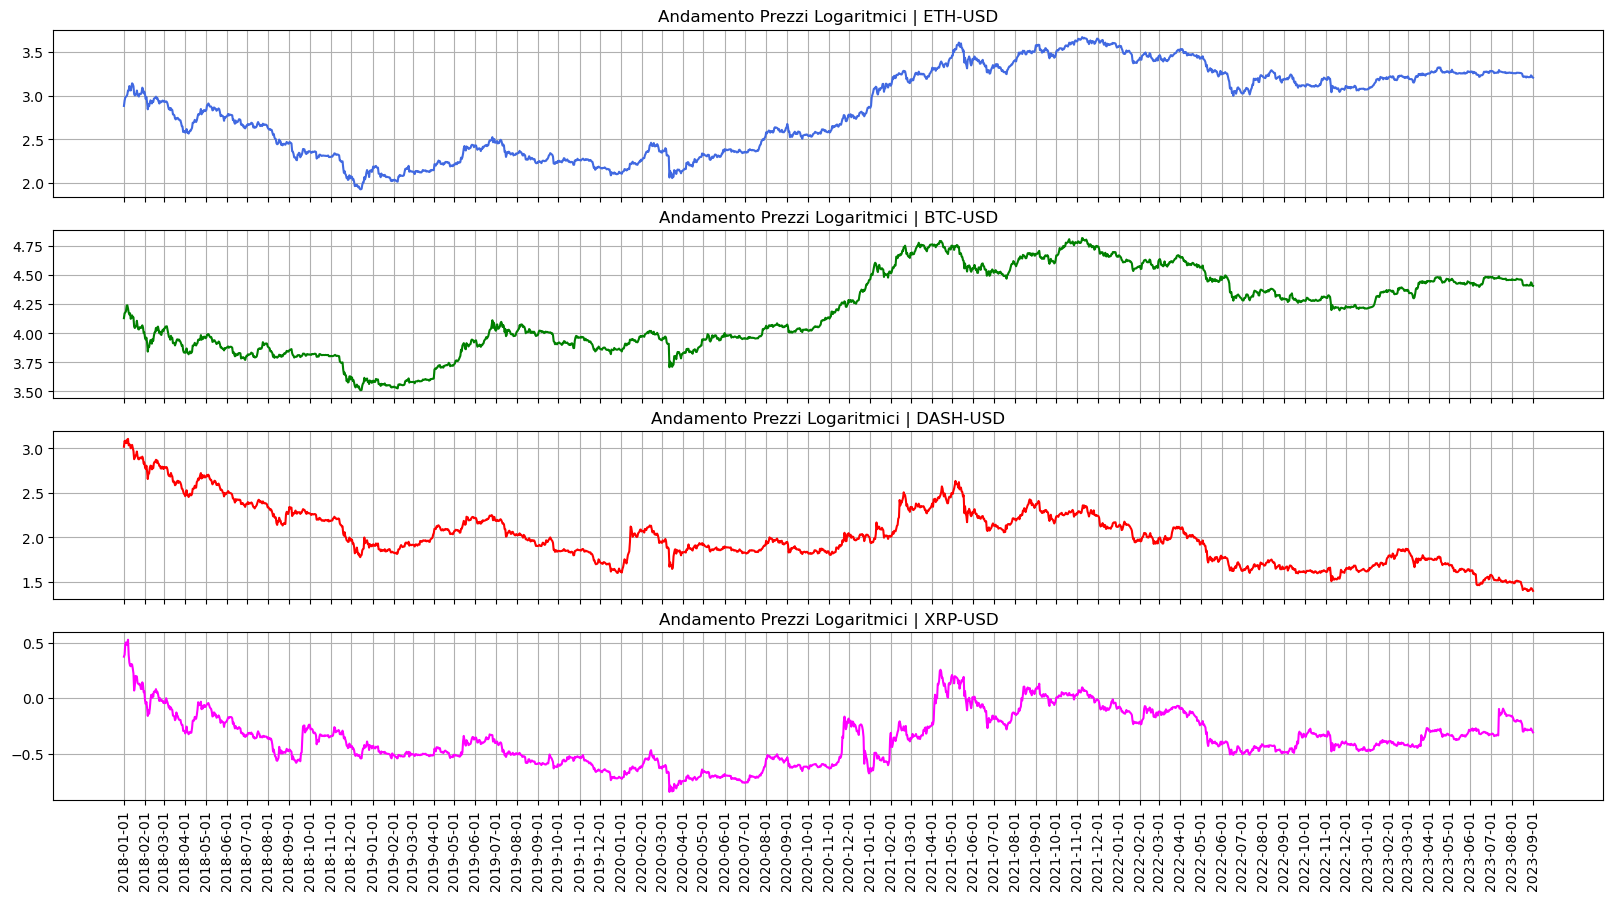

<Figure size 640x480 with 0 Axes>

In [13]:
figure, axs = plt.subplots(nrows = len(cryptoList), sharex = True, figsize = (20,10))

xtickPoints = cryptoDataFrameDict["ETH-USD"]["Date"]
xtickPoints = xtickPoints[xtickPoints.str.endswith("01") == 1]
i = 0 
for crypto in cryptoList :
    axs[i].plot(cryptoDataFrameDict[crypto]["LogClosePrice"], color = colors[i % len(colors)])
    axs[i].set_title("Andamento Prezzi Logaritmici | " + crypto)
    axs[i].grid(True)
    i += 1

axs[len(cryptoList) - 1].set_xticks(xtickPoints.index)
axs[len(cryptoList) - 1].set_xticklabels(xtickPoints.values, rotation = 90)

plt.show()
plt.clf()

Tracciamo ora gli autocorrelogrammi e gli autocorrelogrammi parziali delle serie dei prezzi logaritmici.
Ricordiamo che:
* Gli autocorrelogrammi rappresantono l'influenza del punto $X_0$ al tempo $X_t$ tenendo conto dei tempi $i$ dove $\forall i=1,...,t-1$
* Gli autocorrelogrammi parziali rappresantono l'influenza del punto $X_0$ al tempo $X_t$ **NON** tenendo conto dei tempi $i$ dove $\forall i=1,...,t-1$

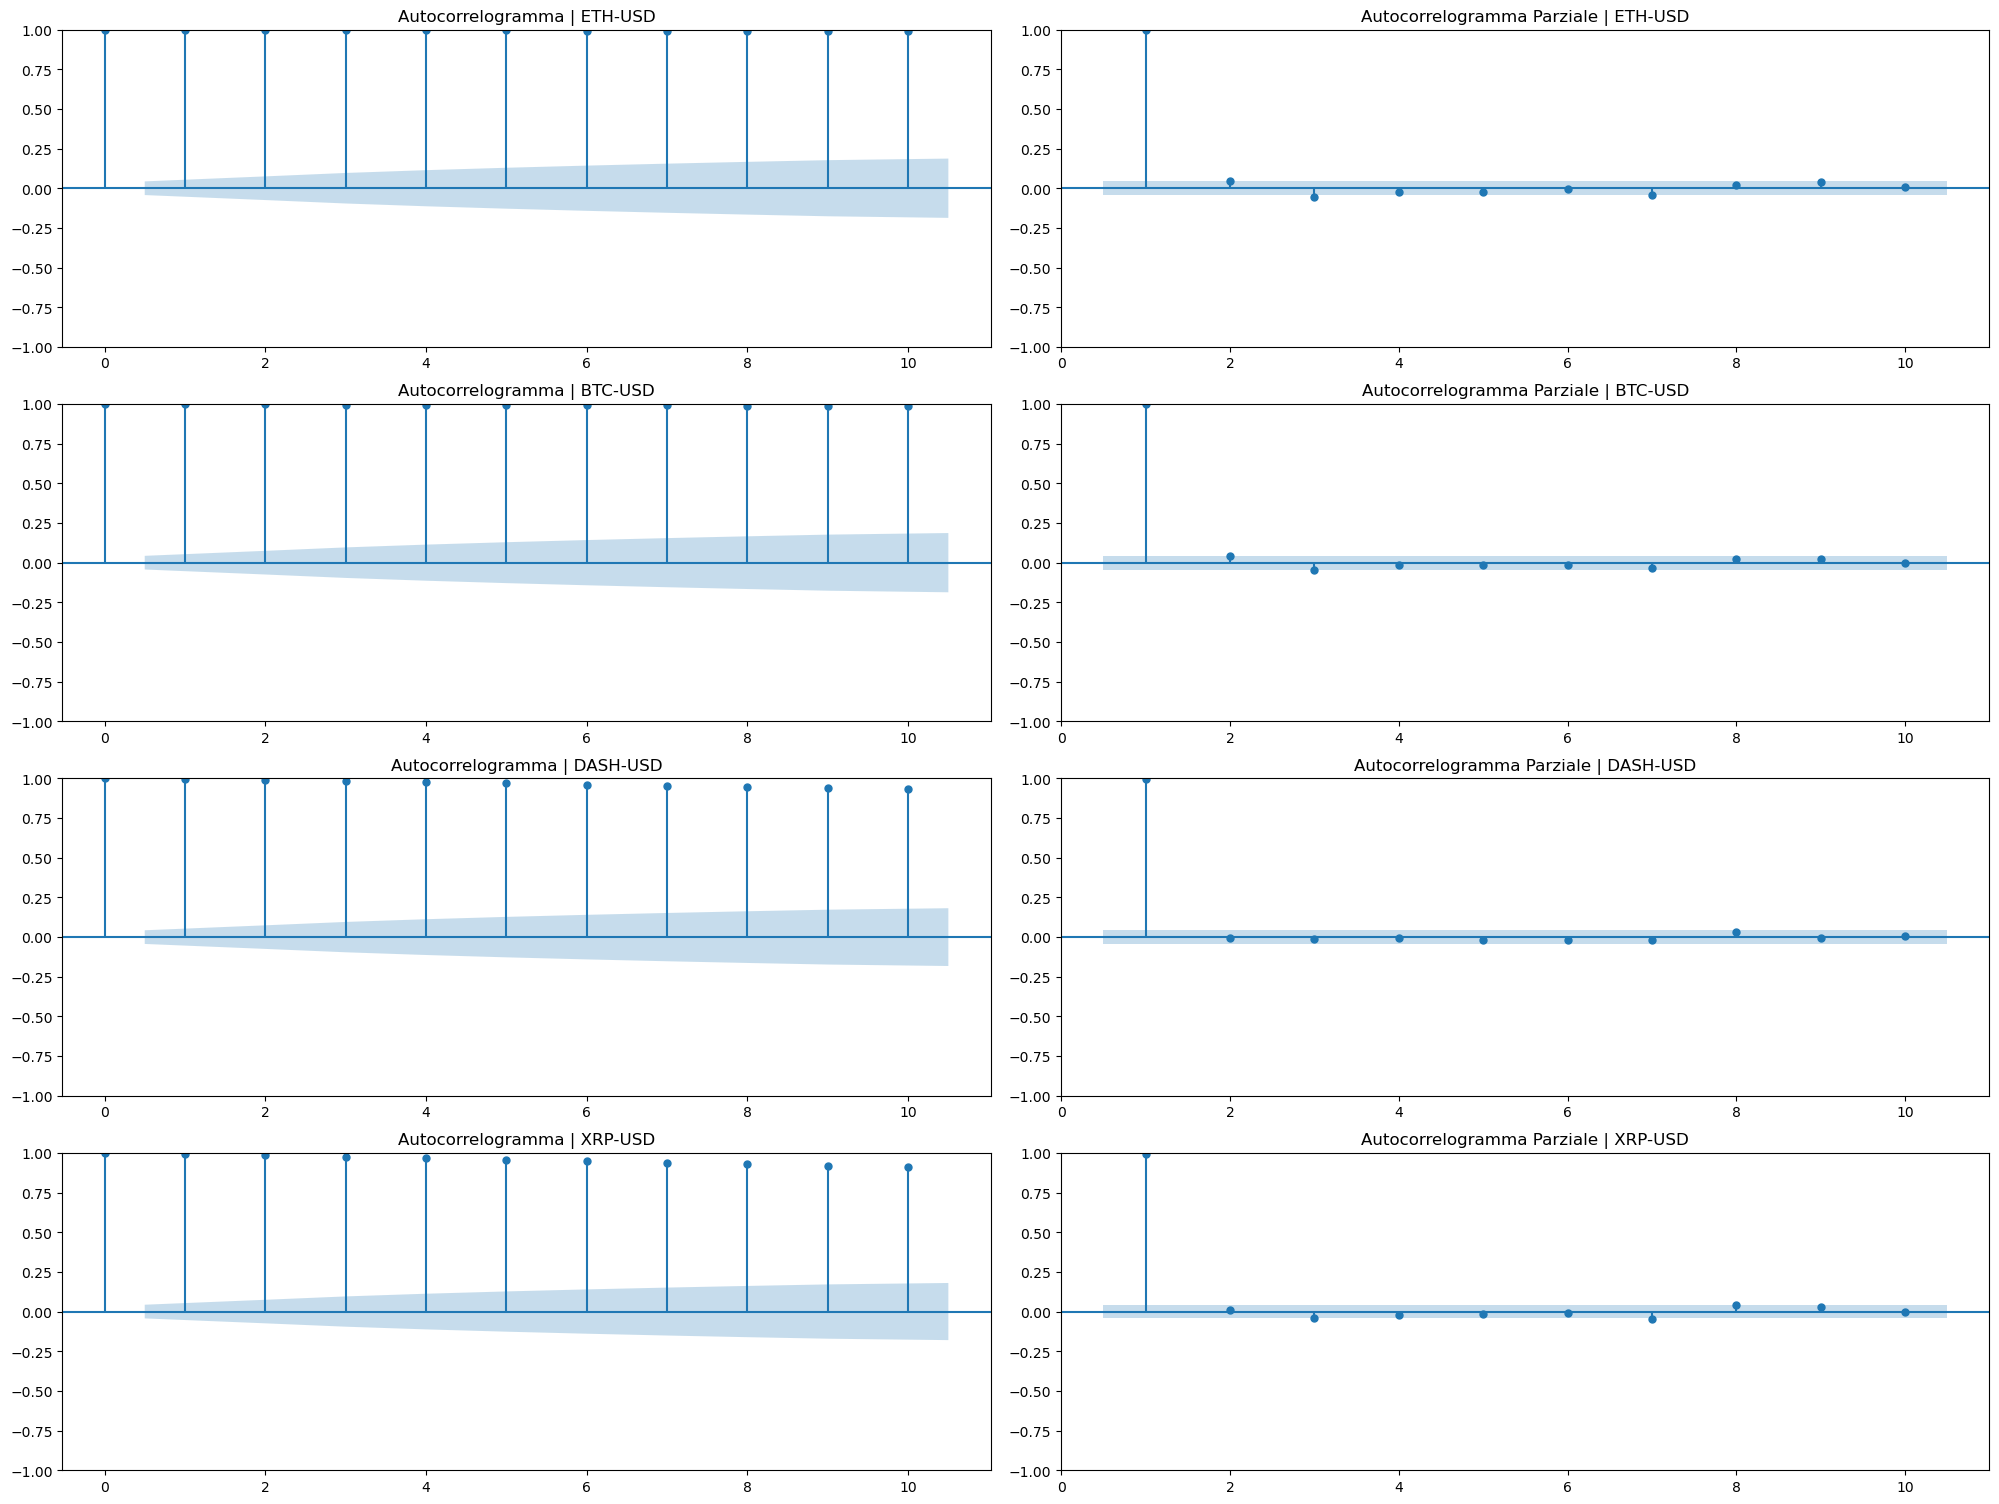

<Figure size 640x480 with 0 Axes>

In [14]:
correlograms(cryptoDataFrameDict, "LogClosePrice", cryptoList, "Autocorrelogramma |", "Autocorrelogramma Parziale |", zeroPar = False)

Come si vede dai grafici:
- Negli autocorelogrammi abbiamo un andamento che tende a scemare nel tempo e questo è dovuto al fatto che l'influenza del punto $X_0$ è sempre più debole con il tempo
- Negli autocorelogrammi parziali abbiamo un picco sul primo punto $X_1$, segno del fatto che l'influenza del punto precedente su quello successivo è alta, ma un'influenza più debole sui punti successivi

### 2.2] Ricerca di una componenti di Random Walk
Cerchiamo una componente di Random Walk all'interno delle serie.

La presenza di una componente di Random Walk nella serie è indice del fatto che il mercato non è prevedibile e che quindi il suo andamento può salire o scendere in modo casuale, ovvero assume valori:
* $up$ con probabilità $p$
* $down$ con probabilità $1-p$

Le componenti di Random Walk vengono ricercate usando due Test di Ipotesi:
* ADF
* KPSS

Nel test di KPSS abbiamo:
* $H_0$ : La serie è stazionaria attorno a una tendenza deterministica (NON ha componente di Random Walk)
* $H_1$ : La serie non è stazionaria (HA componente di Random Walk)

Nel test di ADF abbiamo:
* $H_0$ : La serie ha una radice unitaria (HA componente di Random Walk)
* $H_1$ : La serie non ha una radice unitaria (NON ha componente di Random Walk)

Nel nostro caso vogliamo:
* KPSS, **Rigettare**
* ADF, **Accettare**

In [15]:
kpss_test(cryptoDataFrameDict, "LogClosePrice", cryptoList)
adf_test(cryptoDataFrameDict, "LogClosePrice", cryptoList)

                        KPSS                        
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃          StatValue ┃ pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │  4.630432272815153 │   0.01 │ Reject  │
│ BTC-USD  │  4.820559865672976 │   0.01 │ Reject  │
│ DASH-USD │ 2.7531299544913352 │   0.01 │ Reject  │
│ XRP-USD  │  0.918683154822733 │   0.01 │ Reject  │
└──────────┴────────────────────┴────────┴─────────┘

                                ADF                                
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃           StatValue ┃               pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │ -0.9501313424178288 │   0.7710157360162664 │ Accept  │
│ BTC-USD  │  -0.978510604401754 │   0.7610211585021541 │ Accept  │
│ DASH-USD │ -2.8180938650045064 │   0.0557353087206187 │ Accept  │
│ XRP-USD  │  -3.500868599705032 │ 0.007964814582617451 │ Reject  │
└──────────┴─────────────────────┴──────────────────────┴─────────┘

Dai test condotti si vede che tutte le serie hanno natura di Random Walk, fatta eccezione per l'ultima che non passa il test *ADF*. Tuttavia, passando il test *KPSS* ed essendo il valore del *pValue* abbastanza vicino al limite possiamo concludere che il trend stocastico sia presente anche per la crypto *XRP-USD* ma che sia un trend debole.

### 2.3] Differencing della serie storica e analisi del rumore
Procediamo lo studio con l'analisi del rumore.

Passiamo al differencing della serie storica, ottenendo $Y_{t+1} - Y_{t} = W_{t}$ e procedendo con un'analisi del termine $W_{t}$.

Il differencing viene fatto sul risultato del passaggio al logaritmo dei valori originari. Siano:
* *Y*, valori logaritmici
* *P*, valori originari
* *R*, rendimento

Fare il differencing dei valori logaritmici ci permette di fare quanto segue:

$Y_{t+1} - Y_{t} = \log(P_{t+1}) - \log(P_t) = \log(\frac{P_{t+1}}{P_{t}}) = \log(R) = W_t$

Ovvero analizzare se il rendimento ha o meno natura di *White Noise*, controllando:
* Stazionarietà
* Eteroschedasticità
* Autocorrelazione
* Gaussianità

In [16]:
differencingDict : dict[str, pd.DataFrame] = {}
for crypto in cryptoDataFrameDict :
    logPriceSeries : pd.Series = cryptoDataFrameDict[crypto]["LogClosePrice"]
    differencing : pd.Series = logPriceSeries.diff()
    differencing.dropna(inplace = True)
    differencing.reset_index(inplace = True, drop = True)
    differencingDict[crypto] = pd.DataFrame({"Diff" : differencing.values, "QuadDiff" : (differencing.pow(2)).values})

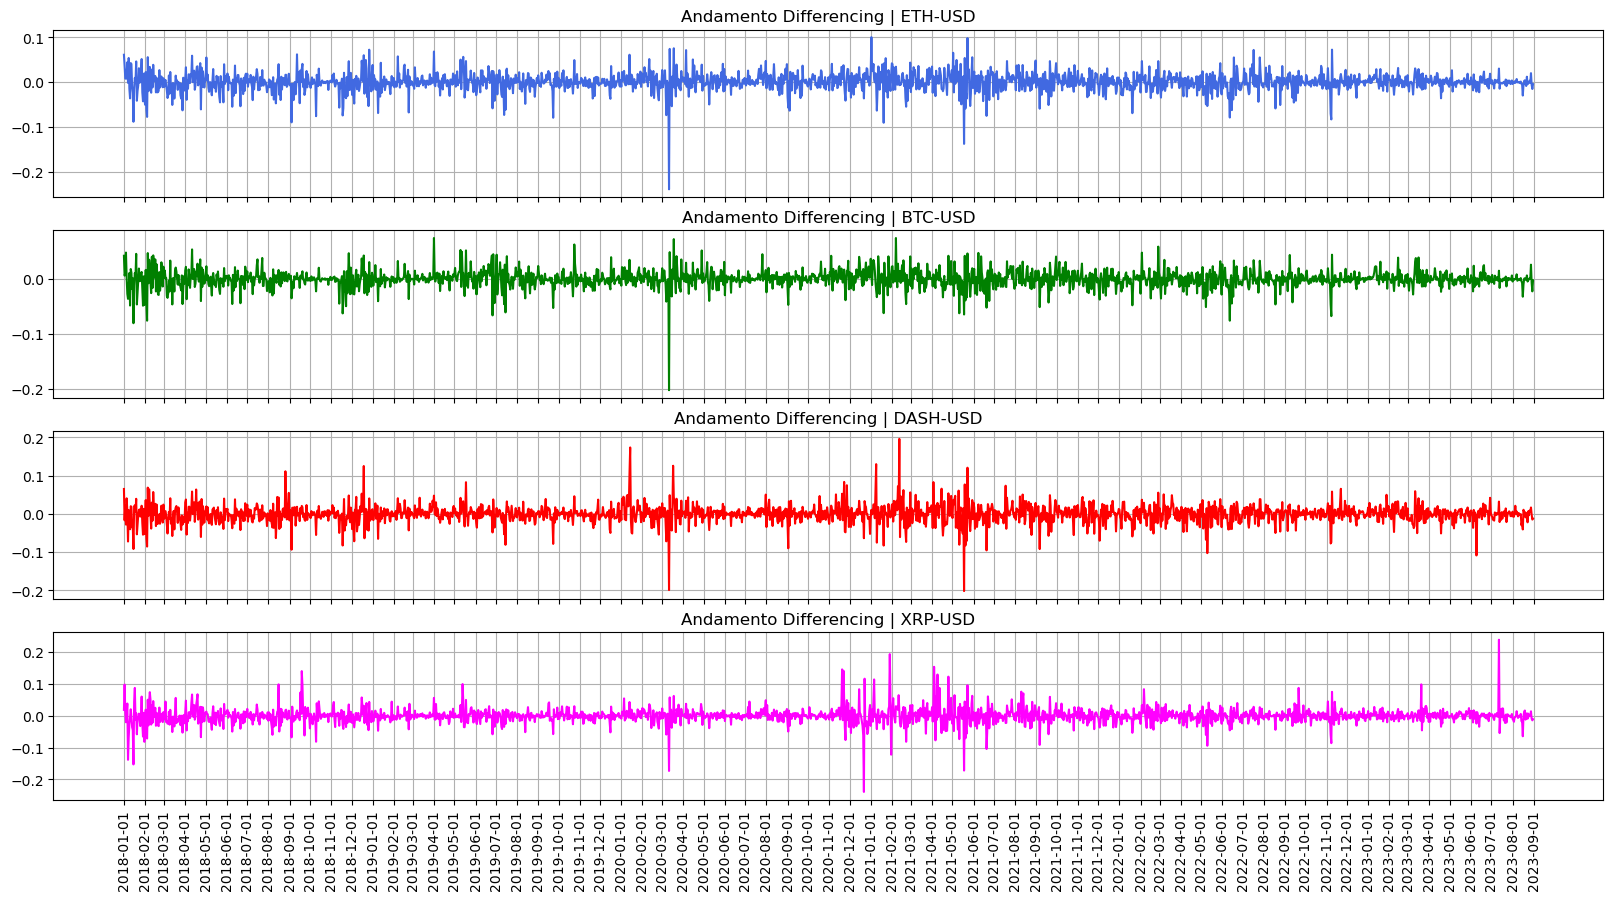

<Figure size 640x480 with 0 Axes>

In [17]:
figure, axs = plt.subplots(nrows = len(cryptoList), sharex = True, figsize = (20,10))

xtickPoints = cryptoDataFrameDict["ETH-USD"]["Date"]
xtickPoints = xtickPoints[xtickPoints.str.endswith("01") == 1]
i = 0 
for crypto in cryptoList :
    axs[i].plot(differencingDict[crypto]["Diff"], color = colors[i % len(colors)])
    axs[i].set_title("Andamento Differencing | " + crypto)
    axs[i].grid(True)
    i += 1

axs[len(cryptoList) - 1].set_xticks(xtickPoints.index)
axs[len(cryptoList) - 1].set_xticklabels(xtickPoints.values, rotation = 90)

plt.show()
plt.clf()

Dai grafici sull'andamento notiamo clustering di volatilità e questo ci fa supporre presenza di autocorrelazione.

#### 2.3.1] Analisi Stazionarietà
Per l'analisi di stazionarietà eseguiamo due test:
* KPSS
* ADF

Nel test di KPSS abbiamo:
* $H_0$ : La serie è stazionaria attorno a una tendenza deterministica
* $H_1$ : La serie non è stazionaria

Nel test di Adfuller abbiamo:
* $H_0$ : La serie ha una radice unitaria
* $H_1$ : La serie non ha una radice unitaria

Nel caso di white noise si avrebbe:
* KPSS, **Accettare**
* ADF, **Rigettare**

In [18]:
kpss_test(differencingDict, "Diff", cryptoList)
adf_test(differencingDict, "Diff", cryptoList)

                        KPSS                         
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃           StatValue ┃ pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │ 0.23201574524870314 │    0.1 │ Accept  │
│ BTC-USD  │ 0.15674142996559834 │    0.1 │ Accept  │
│ DASH-USD │ 0.13769918829263092 │    0.1 │ Accept  │
│ XRP-USD  │ 0.19808342863898767 │    0.1 │ Accept  │
└──────────┴─────────────────────┴────────┴─────────┘

                                 ADF                                 
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃           StatValue ┃                 pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │ -13.748813873133498 │ 1.0600349812346284e-25 │ Reject  │
│ BTC-USD  │ -31.470467916876196 │                    0.0 │ Reject  │
│ DASH-USD │ -21.645263875919735 │                    0.0 │ Reject  │
│ XRP-USD  │  -46.79501030099321 │                    0.0 │ Reject  │
└──────────┴─────────────────────┴────────────────────────┴─────────┘

Dal test di KPSS e dal test ADF, possiamo concludere che il differencing $W_t$ è stazionario

#### 2.3.2] Analisi Eteroschedasticità
Per l'analisi di eteroschedasticità eseguiamo i seguenti test:
* Breusch-Pagan
* White

Nel test di Breusch-Pagan abbiamo:
* $H_0$: I residui sono distribuiti con varianza omogenea (La serie è Omoschedastica)
* $H_1$: I residui *NON* sono distribuiti con varianza omogenea (La serie *NON* è omoschedastica)

Nel test di White abbiamo:
* $H_0$: La varianza dei residui è costante (La serie è Omoschedastica)
* $H_1$: La varianza dei residui *NON* è costante (La serie *NON* è Omoschedastica)

Nel caso di white noise si avrebbe:
* Breusch-Pagan, **Accettare**
* White, **Accettare**

In [19]:
breusch_pagan_test(differencingDict, "Diff", cryptoList, printSummary = False)
white_test(differencingDict, "Diff", cryptoList)

                           Breusch-Pagan                           
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃          StatValue ┃                pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │  8.567367566736669 │ 0.0034597918568196914 │ Reject  │
│ BTC-USD  │  7.763759935805086 │  0.005379165131515243 │ Reject  │
│ DASH-USD │  2.276765009171112 │    0.1314783730532143 │ Accept  │
│ XRP-USD  │ 1.2467607341644058 │    0.2643018406639988 │ Accept  │
└──────────┴────────────────────┴───────────────────────┴─────────┘

                              White                               
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃          StatValue ┃               pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │   5.26508181913567 │ 0.005238555530471663 │ Reject  │
│ BTC-USD  │  4.141400487811925 │ 0.016032762971599328 │ Reject  │
│ DASH-USD │  3.666072606577798 │ 0.025743255972081297 │ Reject  │
│ XRP-USD  │ 0.7598677076192619 │   0.4678589731665155 │ Accept  │
└──────────┴────────────────────┴──────────────────────┴─────────┘

Notiamo che *XRP-USD* è l'unica delle Crypto per cui il test passa: analizzando il grafico possiamo notare come ci sia una certa costanza nella volatilità della serie, quindi anche graficamente abbiamo una conferma del risultato.

Per le altre crypto invece abbiamo che, trattandosi di serie abbastanza lunghe, è ragionevole che la varianza non sia costante.

#### 2.3.3] Analisi Autocorrelazione

Per l'Autocorrelazione consideriamo i seguenti test:
* Ljung-Box

Per il test Ljung-Box:
* $H_0$: Non c'è autocorrelazione nei dati. In altre parole, i residui sono indipendenti l'uno dall'altro e non mostrano alcuna struttura di autocorrelazione significativa.
* $H_1$: I residui non sono indipendenti e mostrano una struttura di autocorrelazione significativa.

Nel caso di white noise si avrebbe:
* Ljung-Box, **Accettare**

In [20]:
ljung_box_test(differencingDict, "Diff", cryptoList)

                             Ljung-Box                             
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃          StatValue ┃                pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │ 31.609722534078987 │ 0.0004650065716092994 │ Reject  │
│ BTC-USD  │ 16.925034452734113 │   0.07603932218108504 │ Accept  │
│ DASH-USD │ 15.716773963771859 │   0.10803220218423684 │ Accept  │
│ XRP-USD  │  7.977674132723926 │     0.631017790629593 │ Accept  │
└──────────┴────────────────────┴───────────────────────┴─────────┘

Il test quindi Accetta e i dati non dovrebbero quindi essere autocorrelati.
Questo và in contraddizione con ciò che avevamo dedotto osservando i grafici relativi al differencing, in cui sembravano essere presenti dei cluster di varianza costante, in cui a basse *[risp: alte]* varianze seguono zone di bassa *[risp: alta]* varianza.

Andiamo per completezza a vedere gli autocorrelogrammi e gli autocorrelogrammi parziali dei dati di differencing.

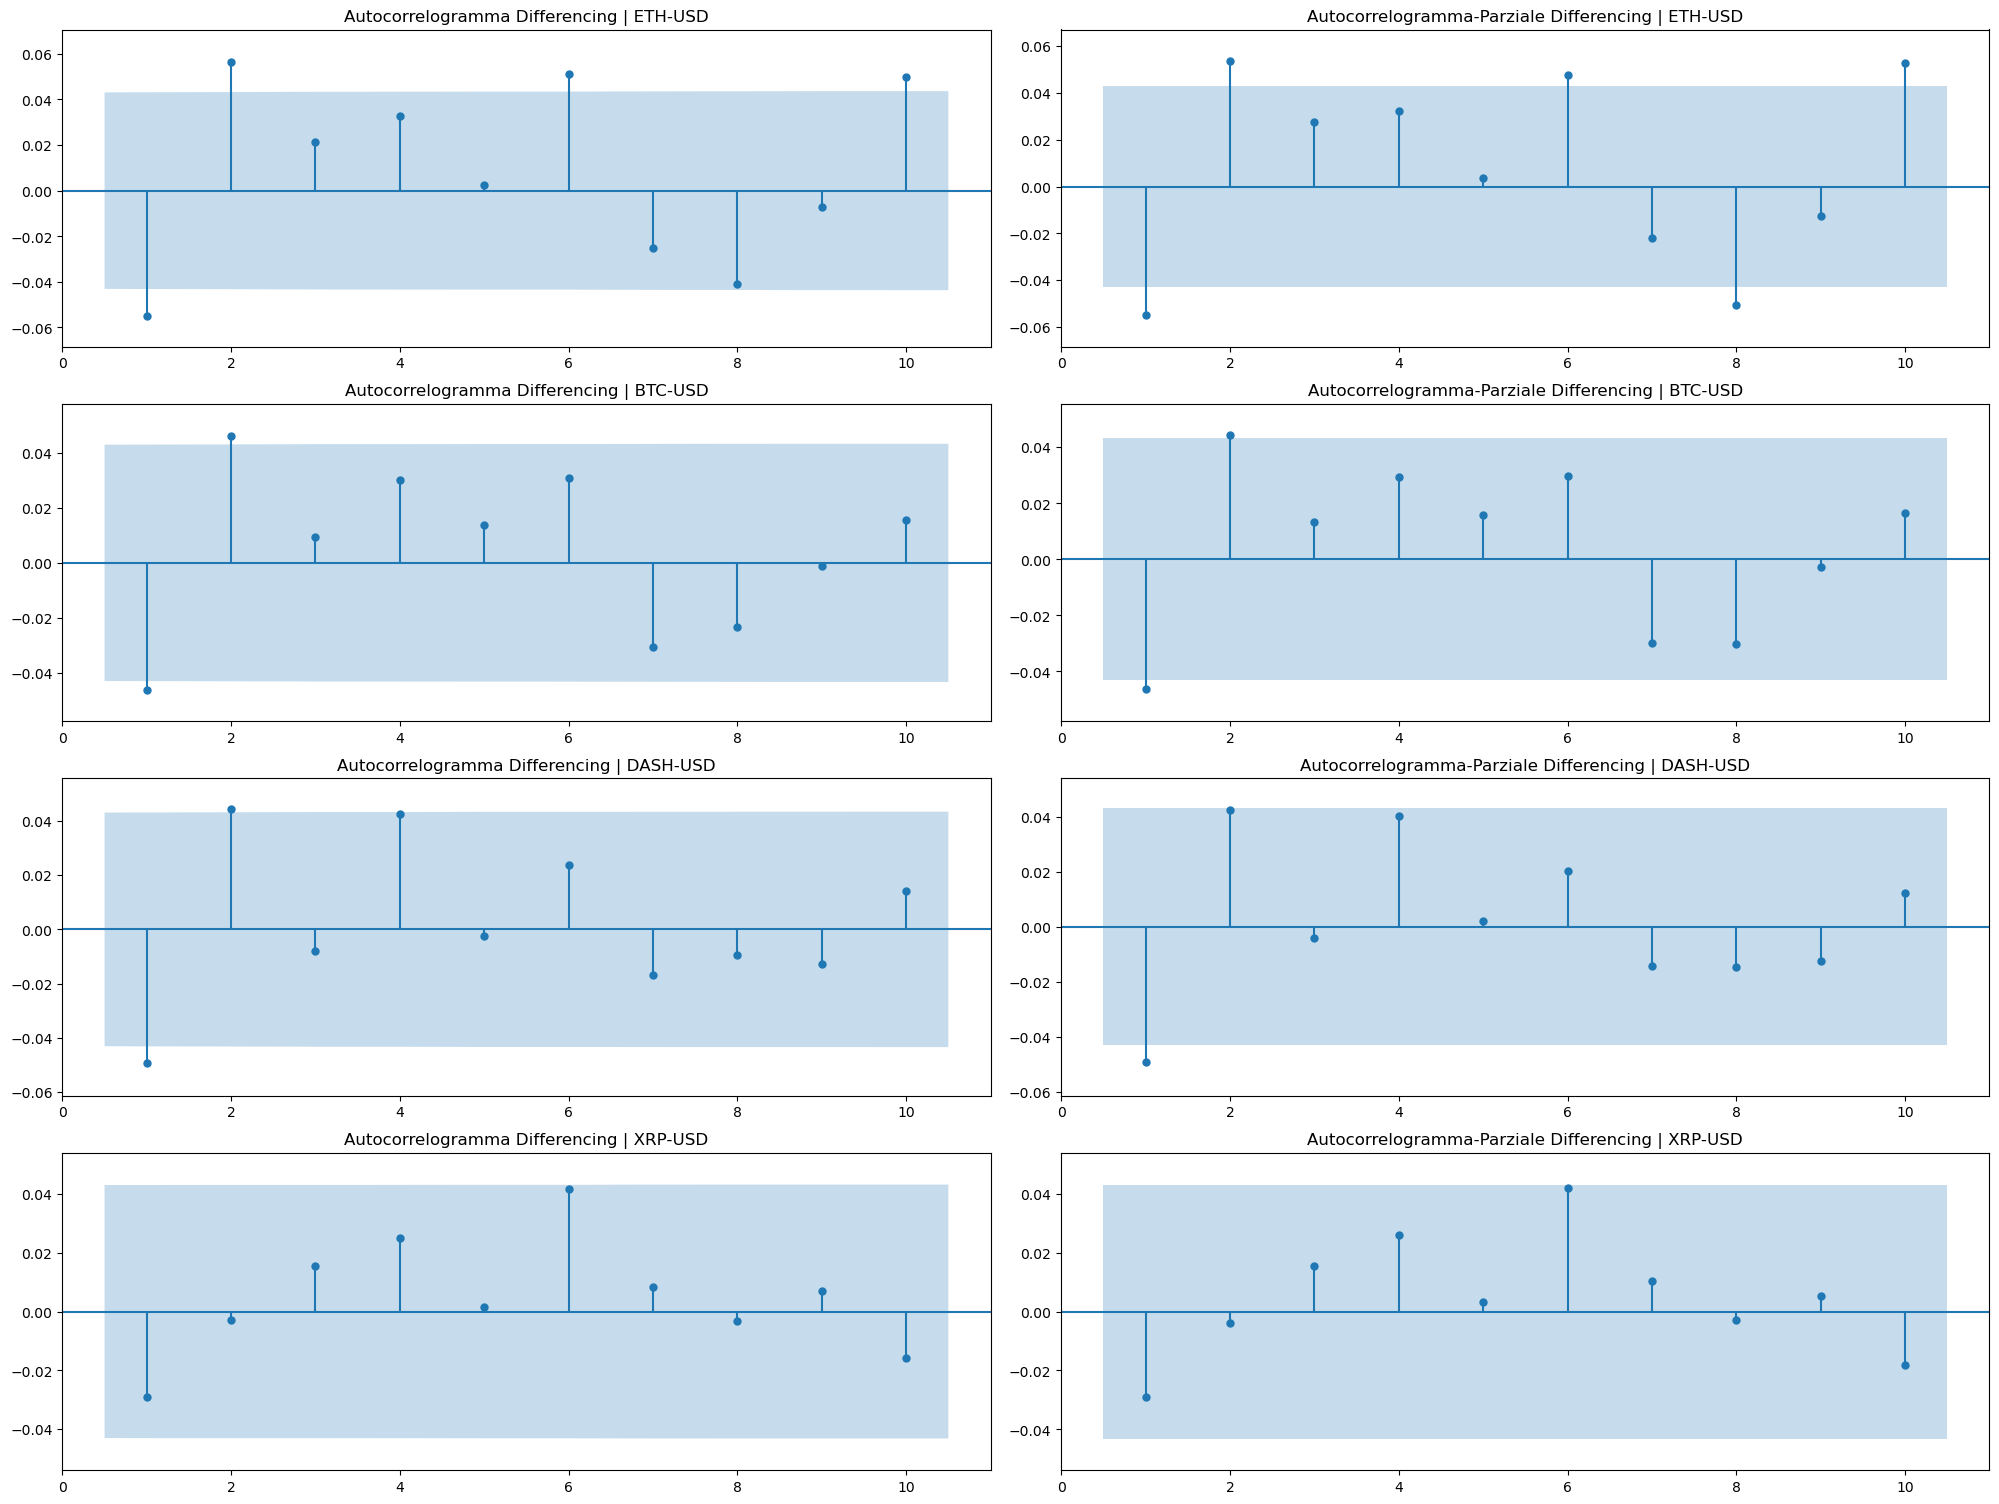

<Figure size 640x480 with 0 Axes>

In [21]:
correlograms(differencingDict, "Diff", cryptoList, titleAuto = "Autocorrelogramma Differencing |", titlePartial = "Autocorrelogramma-Parziale Differencing |", zeroAuto = False, yLimsAuto = True, zeroPar = False, yLimsPar = True)

Riassumendo abbiamo:
* Accettazione del test di Ljung-Box 
* Evidenza grafica di clusterizzazione delle varianze

Questo fenomeno potrebbe essere dovuto al fatto che i dati sono molti, e quindi il grande numero di dati potrebbe offuscare l'autocorrelazione portando i dati a tendere al gaussiano... Ci fa supporre la presenza di punti di rottura nella struttura!

Passiamo quindi, dopo dei veloci test sulla gaussianità, all'analisi delle rotture strutturali.

#### 2.3.4] Analisi Normalità
Per l'analisi di normalità eseguiamo i seguenti test:
* Shapiro-Wilk
* Kolmogorov-Smirnov

Nel test di Shapiro-Wilk abbiamo:
* $H_0$: I dati seguono una distribuzione normale
* $H_1$: I dati NON seguono una distribuzione normale

Nel test di Kolmogorov-Smirnov abbiamo:
* $H_0$: I dati seguono la distribuzione specificata
* $H_1$: I dati NON seguono la distribuzione specificata

Nel caso di white noise:
* Shapiro-Wilk, **Accettare**
* Kolmogorov-Smirnov, **Accettare**

In [22]:
shapiro_wilk(differencingDict, "Diff", cryptoList)
kolmogorov_smirnov(differencingDict, "Diff", cryptoList)

                            Shapiro-Wilk                            
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃          StatValue ┃                 pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │ 0.9225029349327087 │  2.243272511905845e-31 │ Reject  │
│ BTC-USD  │ 0.9065624475479126 │  7.687562699532387e-34 │ Reject  │
│ DASH-USD │ 0.9040272235870361 │ 3.3494620980164206e-34 │ Reject  │
│ XRP-USD  │ 0.8357081413269043 │   7.15923385423549e-42 │ Reject  │
└──────────┴────────────────────┴────────────────────────┴─────────┘

                 Kolmogorov-Smirnov                  
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃           StatValue ┃ pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │  0.4705378122861261 │    0.0 │ Reject  │
│ BTC-USD  │ 0.47608764853183083 │    0.0 │ Reject  │
│ DASH-USD │ 0.46608875744466827 │    0.0 │ Reject  │
│ XRP-USD  │  0.4642030732172747 │    0.0 │ Reject  │
└──────────┴─────────────────────┴────────┴─────────┘

Notiamo quindi che i due test ci fanno rigettare in entrambi i casi l'ipotesi nulla di normalità dei dati.

### 2.4] Analisi dei Punti di Rottura nella Struttura
Cerchiamo i punti di rottura usando le funzioni di R:
* *breakpoints*
* *fstats*
* *supMZ*

I test rilevano la presenza dei seguenti punti di rottura, come sospettavamo...

In [23]:
# Loading the function we have defined in R.
r['source']('./R/R_Break.R')

breakPointSearch_R = robjects.globalenv['breakPointSearch']
fstatBreakpointsSearch_R = robjects.globalenv['fstatBreakpointsSearch']
supmzBreakpointsSearch_R = robjects.globalenv['supmzBreakpointsSearch']

cryptoBreakPointsDict_1 = {}
cryptoBreakPointsDict_2 = {}
cryptoBreakPointsDict_3 = {}

for crypto in cryptoList :
    ## Converting to R dataFrame
    closePrice_R = pandas2ri.py2rpy(cryptoDataFrameDict[crypto]["LogClosePrice"])

    # Invoking R function
    breakPointsList_R = breakPointSearch_R(closePrice_R)

    #Converting it back to a pandas dataframe.
    breakPointsList = np.array(breakPointsList_R)

    breakPointsList = [int(elem - 1) for elem in breakPointsList]
    cryptoBreakPointsDict_1[crypto] = breakPointsList

    fstatPointsList_R = fstatBreakpointsSearch_R(closePrice_R)
    fstatBreakPointsList = np.array(fstatPointsList_R)
    fstatBreakPointsList = [int(elem - 1) for elem in fstatBreakPointsList]
    cryptoBreakPointsDict_2[crypto] = fstatBreakPointsList

    logClosePriceDataFrame = pd.DataFrame(cryptoDataFrameDict[crypto]["LogClosePrice"], columns = ["LogClosePrice"])
    logClosePriceDF_R = pandas2ri.py2rpy(logClosePriceDataFrame)
    supmzPointsList_R = supmzBreakpointsSearch_R(logClosePriceDF_R)
    supmzBreakPointsList = list(supmzPointsList_R)
    cryptoBreakPointsDict_3[crypto] = supmzBreakPointsList

In [24]:
breakPointsTable = buildTable("Structural Breakpoints", ["Crypto", "Breakpoint", "FStats", "SupMZ"], ["left", "right", "right", "right"])
for crypto in cryptoList :
    datesString_1 = "| "
    datesString_2 = "| "
    datesString_3 = "| "
    for breakpoint in cryptoBreakPointsDict_1[crypto] :
        date = cryptoDataFrameDict[crypto]["Date"].loc[breakpoint]
        datesString_1 += date + " | "
    for breakpoint in cryptoBreakPointsDict_2[crypto] :
        date = cryptoDataFrameDict[crypto]["Date"].loc[breakpoint]
        datesString_2 += date + " | "
    for breakpoint in cryptoBreakPointsDict_3[crypto] :
        date = cryptoDataFrameDict[crypto]["Date"].loc[breakpoint]
        datesString_3 += date + " | "
    breakPointsTable.add_row(crypto, datesString_1, datesString_2, datesString_3)

console = Console()
console.print(breakPointsTable)

                                         Structural Breakpoints                                          
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Crypto   ┃                                             Breakpoint ┃          FStats ┃           SupMZ ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ ETH-USD  │  | 2018-11-06 | 2020-02-06 | 2021-01-02 | 2022-05-10 | │  | 2020-12-29 | │  | 2021-01-04 | │
│ BTC-USD  │               | 2019-05-12 | 2020-12-15 | 2022-05-08 | │  | 2020-11-11 | │  | 2020-11-06 | │
│ DASH-USD │  | 2018-11-06 | 2019-09-22 | 2021-01-09 | 2022-05-04 | │  | 2018-11-07 | │  | 2022-05-12 | │
│ XRP-USD  │  | 2018-11-18 | 2019-09-24 | 2021-02-08 | 2022-04-28 | │  | 2021-02-08 | │  | 2021-02-05 | │
└──────────┴────────────────────────────────────────────────────────┴─────────────────┴─────────────────┘

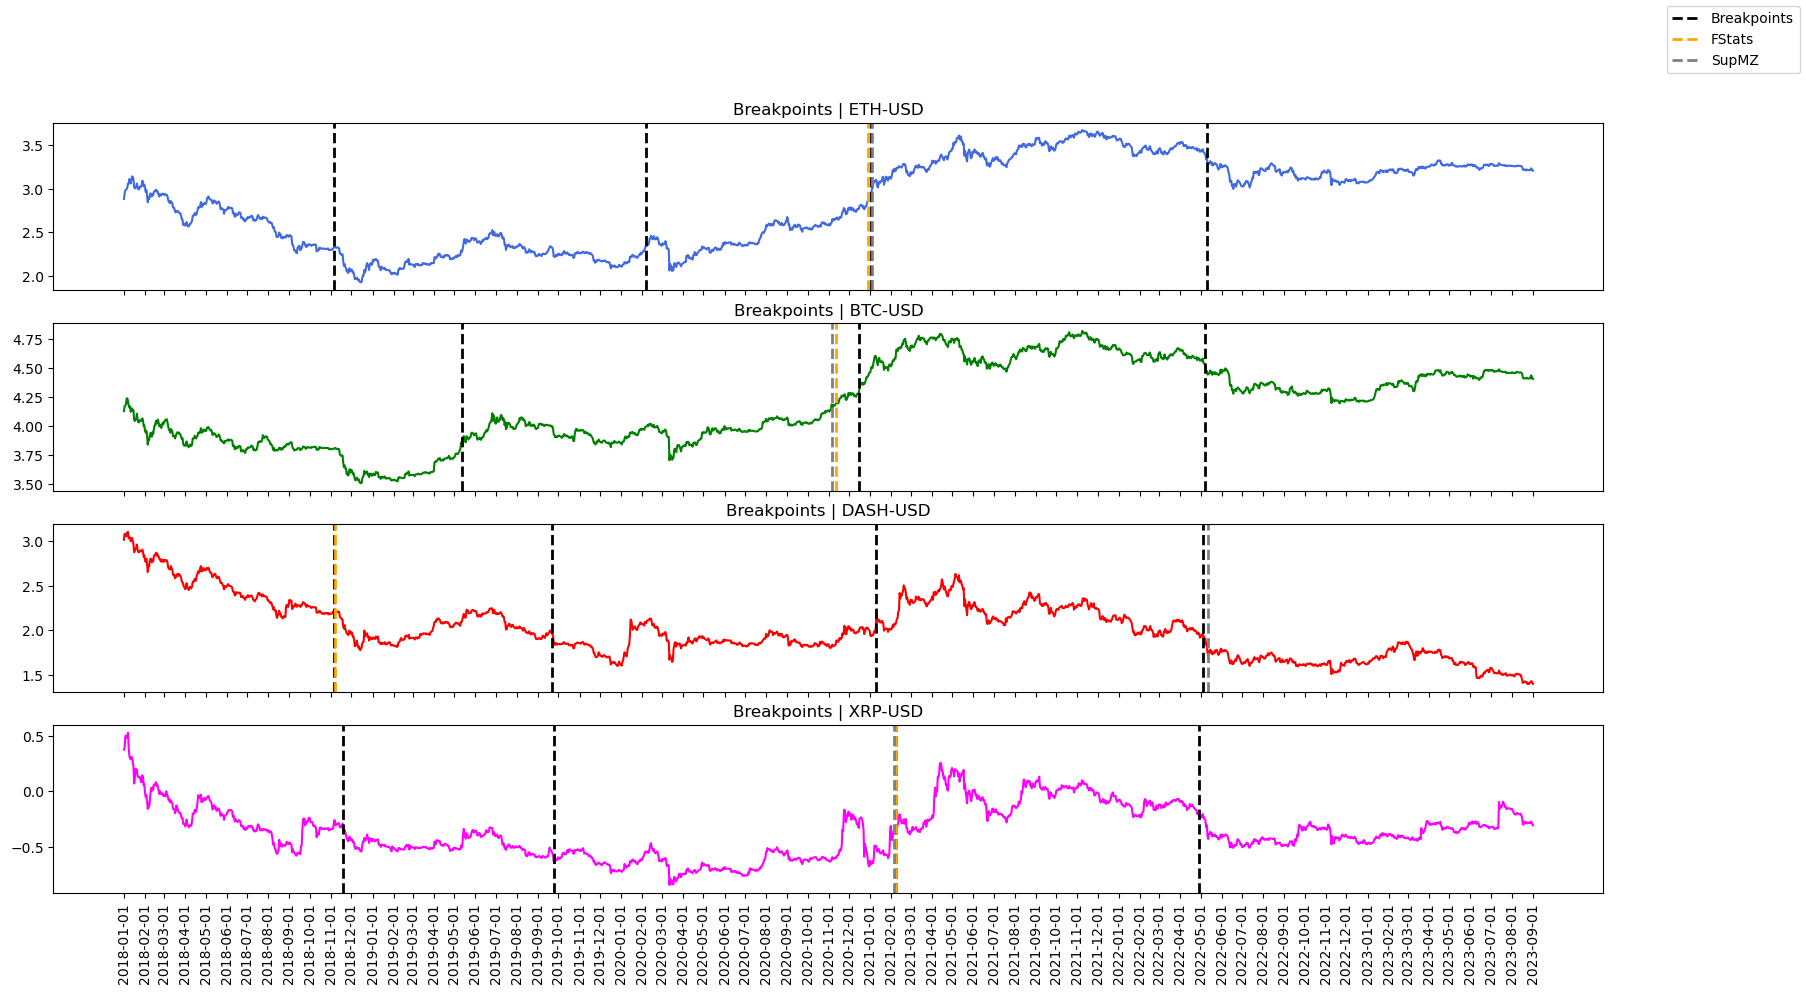

<Figure size 640x480 with 0 Axes>

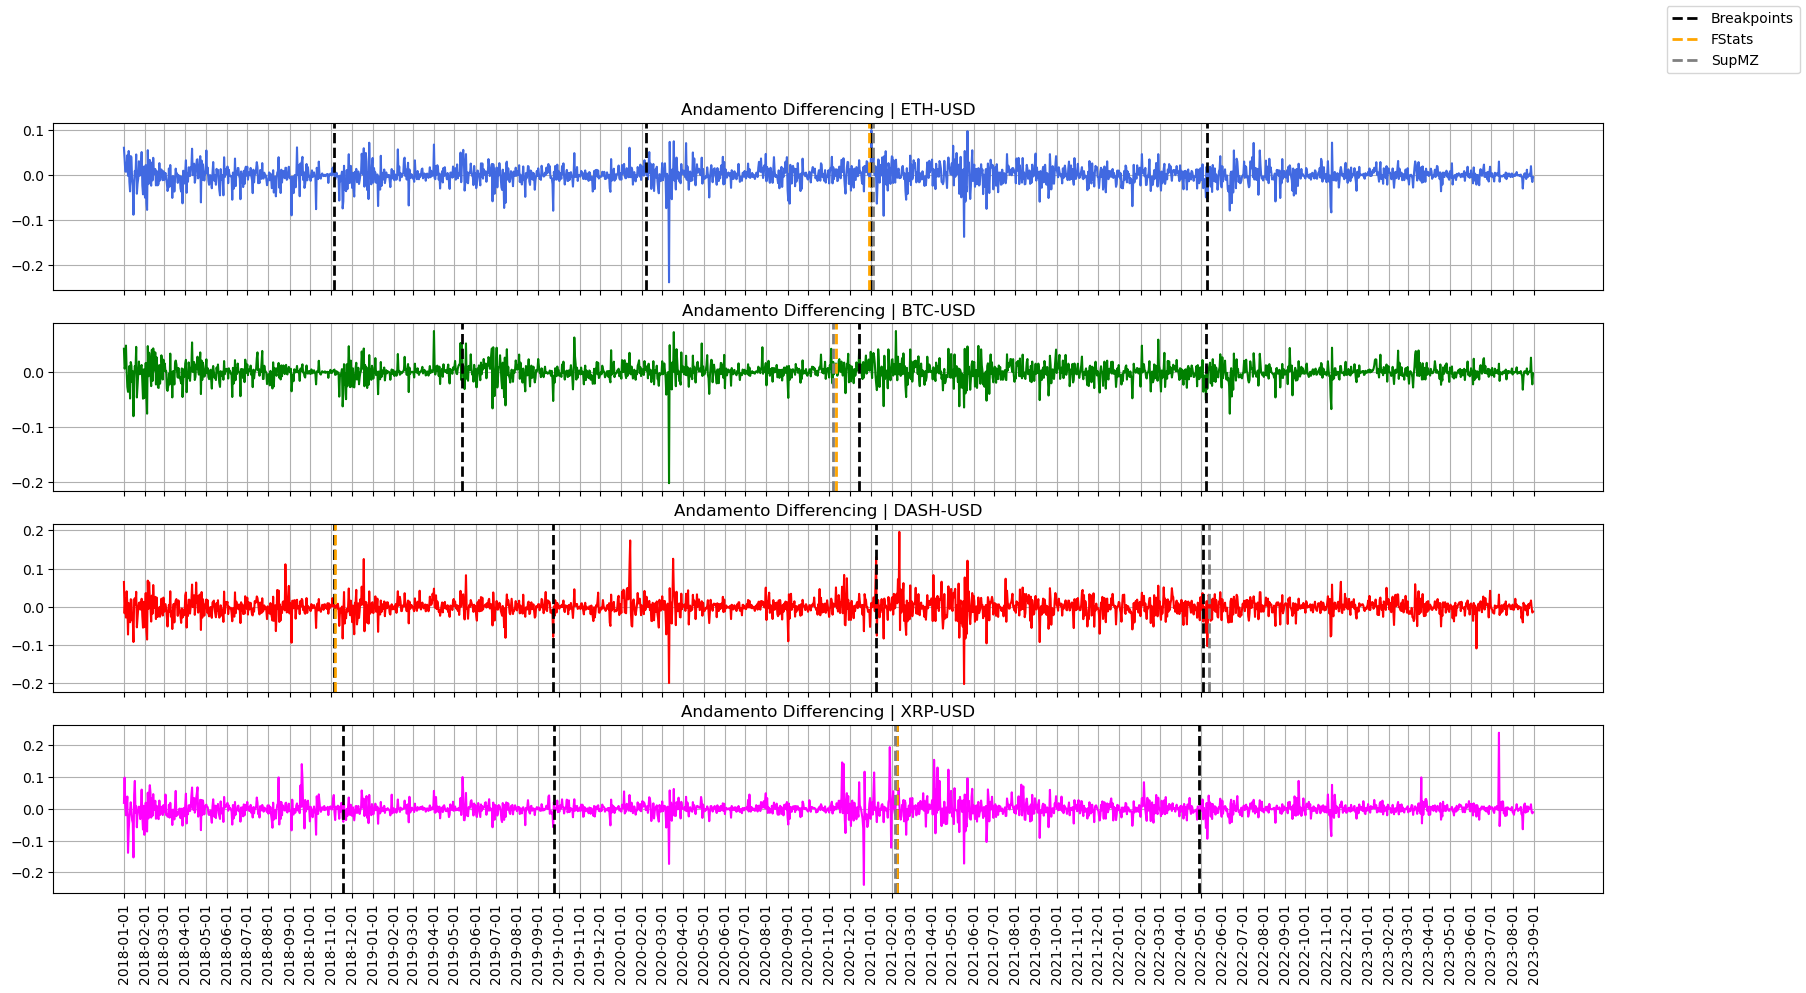

<Figure size 640x480 with 0 Axes>

In [25]:


figure, axs = plt.subplots(nrows = len(cryptoList), sharex = True, figsize = (20,10))

xtickPoints = cryptoDataFrameDict["ETH-USD"]["Date"]
xtickPoints = xtickPoints[xtickPoints.str.endswith("01") == 1]
i = 0 
legend_1 = True
legend_2 = True
legend_3 = True
for crypto in cryptoList :
    axs[i].plot(cryptoDataFrameDict[crypto]["LogClosePrice"], color = colors[i % len(colors)])
    axs[i].set_title("Breakpoints | " + crypto)
    # axs[i].grid(True)

    for breakpoint in cryptoBreakPointsDict_1[crypto] :
        axs[i].axvline(x = breakpoint, color = "black", linestyle = "--", linewidth = "2", label = "Breakpoints" if legend_1 else None)
        legend_1 = False
    for breakpoint in cryptoBreakPointsDict_2[crypto] :
        axs[i].axvline(x = breakpoint, color = "orange", linestyle = "--", linewidth = "2", label = "FStats" if legend_2 else None)
        legend_2 = False
    for breakpoint in cryptoBreakPointsDict_3[crypto] :
        axs[i].axvline(x = breakpoint, color = "gray", linestyle = "--", linewidth = "2", label = "SupMZ" if legend_3 else None)
        legend_3 = False
    i += 1
figure.legend()

axs[len(cryptoList) - 1].set_xticks(xtickPoints.index)
axs[len(cryptoList) - 1].set_xticklabels(xtickPoints.values, rotation = 90)

plt.show()
plt.clf()


figure, axs = plt.subplots(nrows = len(cryptoList), sharex = True, figsize = (20,10))

xtickPoints = cryptoDataFrameDict["ETH-USD"]["Date"]
xtickPoints = xtickPoints[xtickPoints.str.endswith("01") == 1]
i = 0
legend_1 = True
legend_2 = True
legend_3 = True
for crypto in cryptoList :
    axs[i].plot(differencingDict[crypto]["Diff"], color = colors[i % len(colors)])
    axs[i].set_title("Andamento Differencing | " + crypto)
    axs[i].grid(True)

    for breakpoint in cryptoBreakPointsDict_1[crypto] :
        axs[i].axvline(x = breakpoint, color = "black", linestyle = "--", linewidth = "2", label = "Breakpoints" if legend_1 else None)
        legend_1 = False
    for breakpoint in cryptoBreakPointsDict_2[crypto] :
        axs[i].axvline(x = breakpoint, color = "orange", linestyle = "--", linewidth = "2", label = "FStats" if legend_2 else None)
        legend_2 = False
    for breakpoint in cryptoBreakPointsDict_3[crypto] :
        axs[i].axvline(x = breakpoint, color = "gray", linestyle = "--", linewidth = "2", label = "SupMZ" if legend_3 else None)
        legend_3 = False
        
    i += 1
figure.legend()

axs[len(cryptoList) - 1].set_xticks(xtickPoints.index)
axs[len(cryptoList) - 1].set_xticklabels(xtickPoints.values, rotation = 90)

plt.show()
plt.clf()

Notiamo  che test diversi rilevano punti di rottura simili: scegliamo quindi di procedere con un *"voto a maggioranza"*, prendendo il punto di rottura più simile tra i tre test e considerando i dati a partire da tale punto in poi.

## 3] Divisione del dataset
Dividiamo inoltre il dataset *ristretto* per ogni crypto in due parti, training e test set: manteniamo nel training circa il 90% dei dati di ogni strumento.

In [26]:
cryptoBreakPointsIndexes = {
    "ETH-USD" : cryptoBreakPointsDict_1["ETH-USD"][2],
    "BTC-USD" : cryptoBreakPointsDict_1["BTC-USD"][1],
    "DASH-USD" : cryptoBreakPointsDict_1["DASH-USD"][3],
    "XRP-USD" : cryptoBreakPointsDict_1["XRP-USD"][2],
}

In [27]:
restrCryptoDataFrameDict : dict[str, pd.DataFrame] = {}
restrDiffDataFrameDict : dict[str, pd.DataFrame] = {}

for crypto in cryptoList :
    breakPoint = cryptoBreakPointsIndexes[crypto]

    restrictedDataFrame : pd.DataFrame = cryptoDataFrameDict[crypto].iloc[cryptoDataFrameDict[crypto].index >= breakPoint]
    restrictedDataFrame.reset_index(drop = True, inplace = True)
    restrCryptoDataFrameDict[crypto] = restrictedDataFrame

    restrictedDiffDataFrame : pd.DataFrame = differencingDict[crypto].iloc[differencingDict[crypto]["Diff"].index >= breakPoint]
    restrictedDiffDataFrame.reset_index(drop = True, inplace = True)
    restrDiffDataFrameDict[crypto] = restrictedDiffDataFrame

In [28]:
trainCryptoDict : dict[str, pd.DataFrame] = {}
testCryptoDict : dict[str, pd.DataFrame] = {}
trainCryptoDiffDict : dict[str, pd.DataFrame] = {}
testCryptoDiffDict : dict[str, pd.DataFrame] = {}

for crypto in cryptoList :
    totalSize = restrCryptoDataFrameDict[crypto].shape[0]
    trainSize = int((totalSize / 100) * 90)
    testSize = totalSize - trainSize

    trainCryptoDict[crypto] = restrCryptoDataFrameDict[crypto].iloc[restrCryptoDataFrameDict[crypto].index < trainSize]
    trainCryptoDict[crypto].reset_index(drop = True, inplace = True)
    testCryptoDict[crypto] = restrCryptoDataFrameDict[crypto].iloc[restrCryptoDataFrameDict[crypto].index >= trainSize]
    testCryptoDict[crypto].reset_index(drop = True, inplace = True)

    trainCryptoDiffDict[crypto] = restrDiffDataFrameDict[crypto].iloc[restrDiffDataFrameDict[crypto].index < trainSize]
    trainCryptoDiffDict[crypto].reset_index(drop = True, inplace = True)
    testCryptoDiffDict[crypto] = restrDiffDataFrameDict[crypto].iloc[restrDiffDataFrameDict[crypto].index >= trainSize]
    testCryptoDiffDict[crypto].reset_index(drop = True, inplace = True)

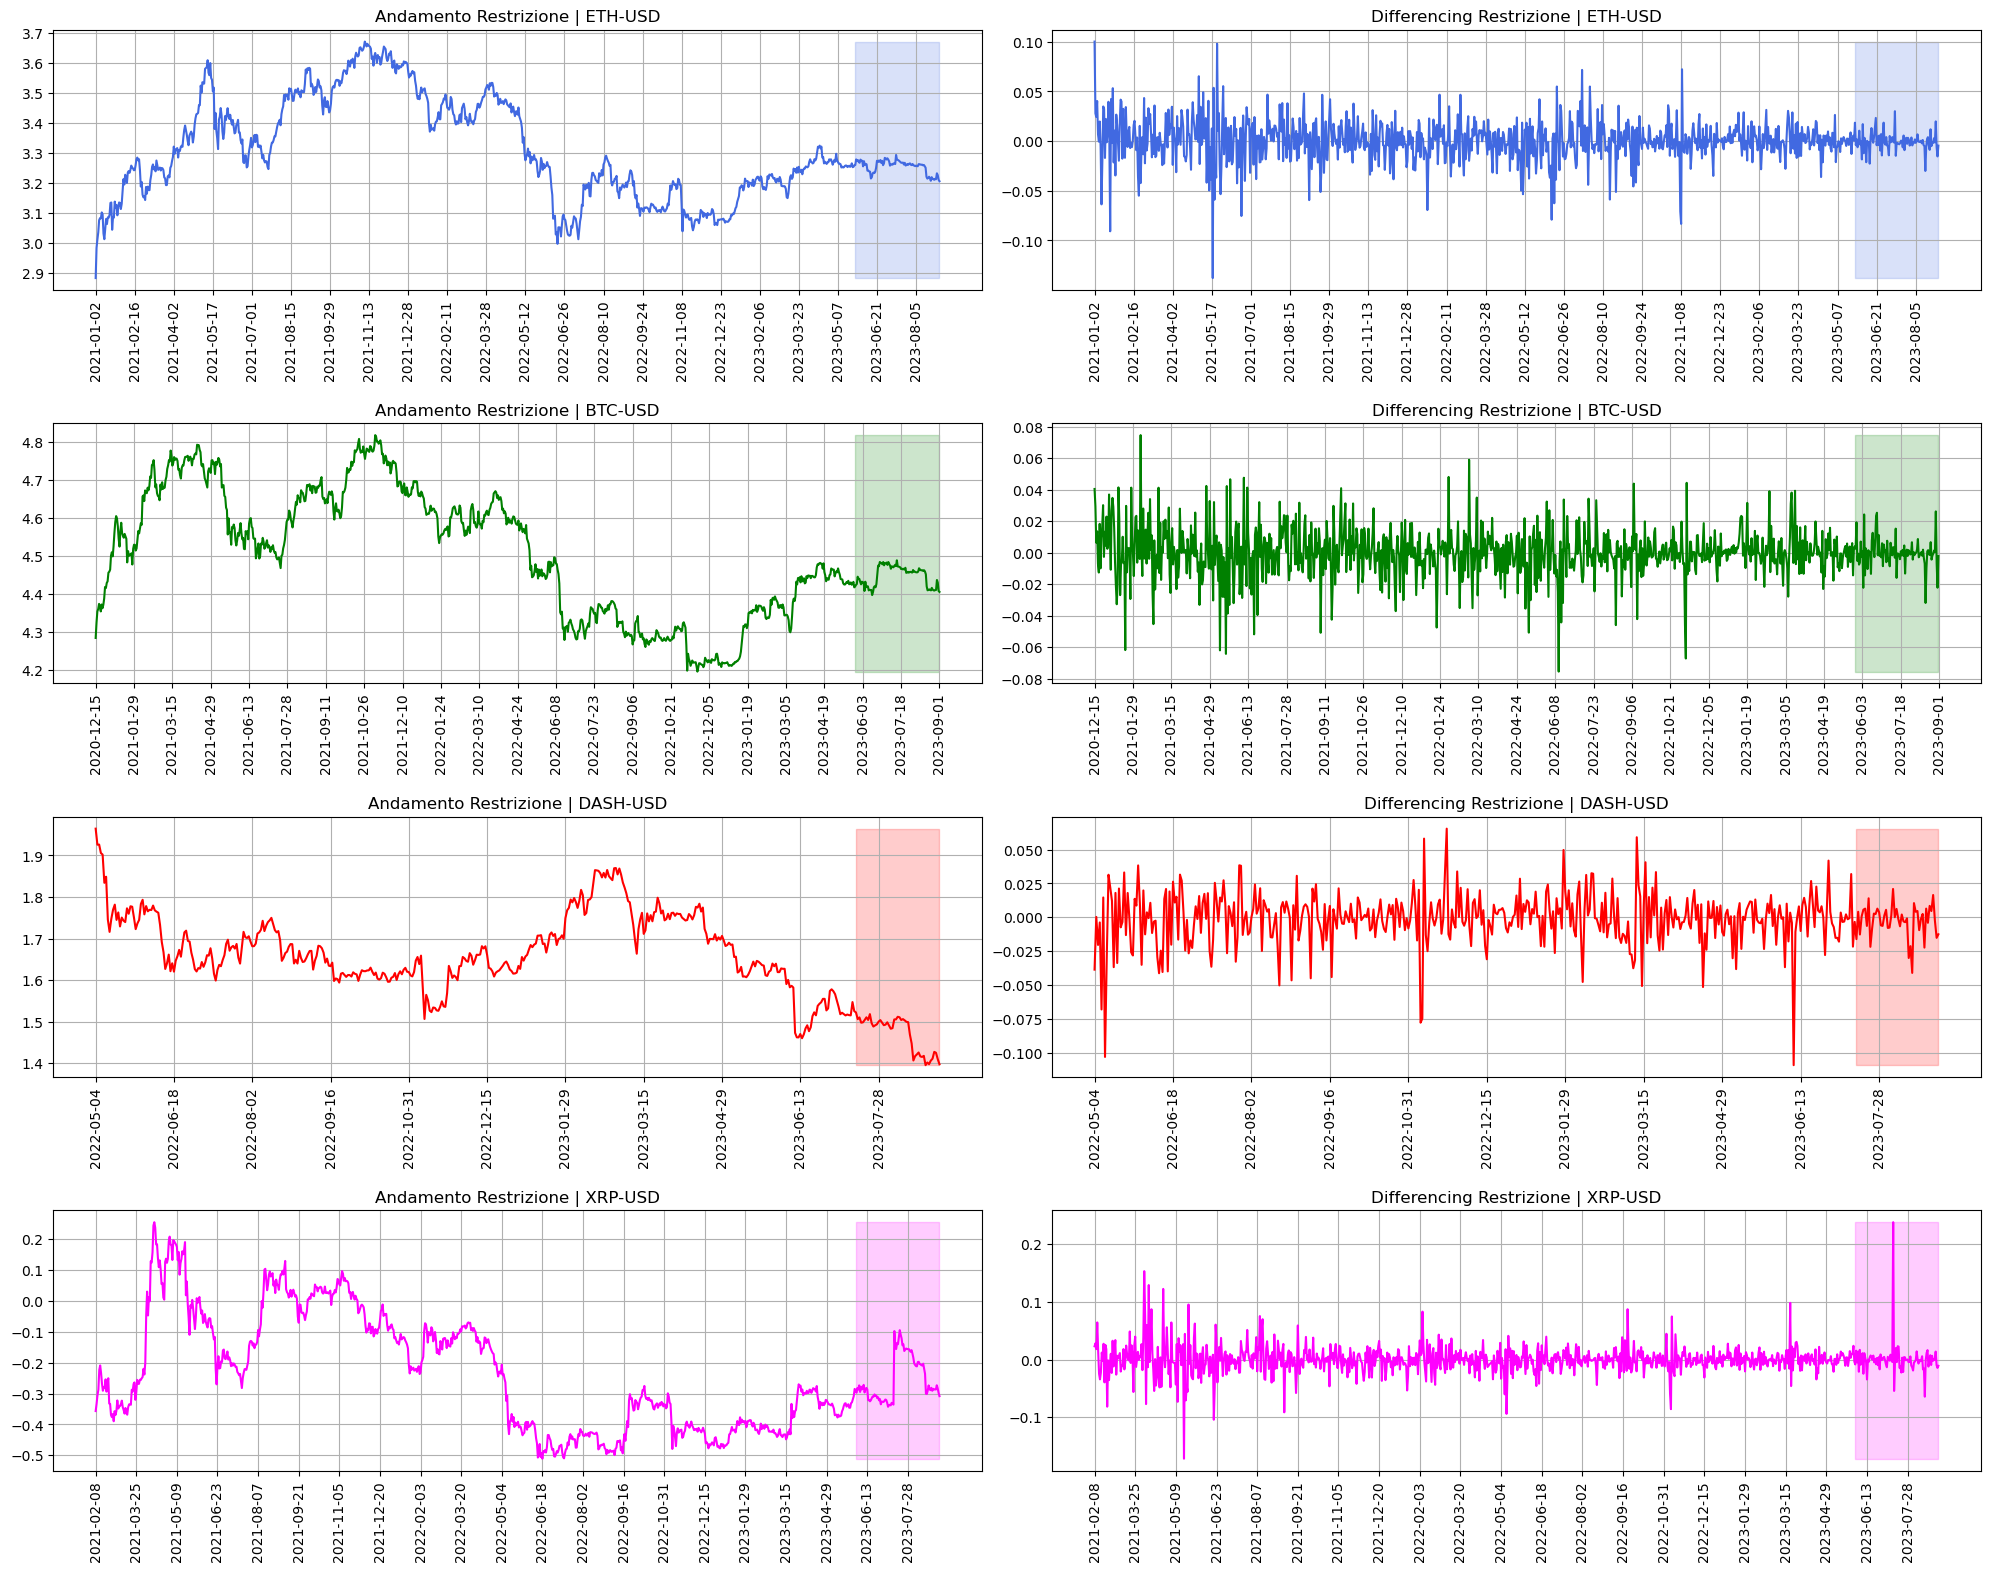

<Figure size 640x480 with 0 Axes>

In [29]:

figure, axs = plt.subplots(nrows = len(cryptoList), ncols = 2, figsize = (20,15))
figure.tight_layout(h_pad = 7.5, w_pad = 2)

STEP = 45
ROTATION = 90

i = 0 
for crypto in cryptoList :
    axs[i][0].plot(restrCryptoDataFrameDict[crypto]["LogClosePrice"], color = colors[i % len(colors)])
    axs[i][0].set_title("Andamento Restrizione | " + crypto)
    axs[i][0].grid(True)

    xtickPoints = np.arange(start = 0, stop = restrCryptoDataFrameDict[crypto].shape[0], step = STEP)
    xtickLabels = restrCryptoDataFrameDict[crypto]["Date"].iloc[xtickPoints]
    axs[i][0].set_xticks(xtickPoints)
    axs[i][0].set_xticklabels(xtickLabels, rotation = ROTATION)

    axs[i][0].fill_between(
        x = np.arange(trainCryptoDict[crypto].shape[0], trainCryptoDict[crypto].shape[0] + testCryptoDict[crypto].shape[0]), 
        y1 = restrCryptoDataFrameDict[crypto]["LogClosePrice"].min(), 
        y2 = restrCryptoDataFrameDict[crypto]["LogClosePrice"].max(),
        alpha = 0.20, 
        color = colors[i]
    )

    i += 1



i = 0 
for crypto in cryptoList :
    axs[i][1].plot(restrDiffDataFrameDict[crypto]["Diff"], color = colors[i % len(colors)])
    axs[i][1].set_title("Differencing Restrizione | " + crypto)
    axs[i][1].grid(True)

    xtickPoints = np.arange(start = 0, stop = restrCryptoDataFrameDict[crypto].shape[0], step = STEP)
    xtickLabels = restrCryptoDataFrameDict[crypto]["Date"].iloc[xtickPoints]
    axs[i][1].set_xticks(xtickPoints)
    axs[i][1].set_xticklabels(xtickLabels, rotation = ROTATION)

    axs[i][1].fill_between(
        x = np.arange(trainCryptoDiffDict[crypto].shape[0], trainCryptoDiffDict[crypto].shape[0] + testCryptoDiffDict[crypto].shape[0]), 
        y1 = restrDiffDataFrameDict[crypto]["Diff"].min(), 
        y2 = restrDiffDataFrameDict[crypto]["Diff"].max(),
        alpha = 0.20, 
        color = colors[i]
    )

    i += 1

plt.show()
plt.clf()

## 4] Analisi dei dati ristretti

Consideriamo ora solamente i dati di training, per ogni crypto, sul dataset ristretto all'ultimo punto di rottura.

#### 4.1] Analisi del differencing ridotto
Come nel primo caso analizziamo il differencing e vediamo se questo ha natura di white noise.

##### 4.1.1] Analisi Stazionarietà
Per l'analisi di stazionarietà eseguiamo due test:
* KPSS
* ADF

Nel test di KPSS abbiamo:
* $H_0$ : La serie è stazionaria attorno a una tendenza deterministica
* $H_1$ : La serie non è stazionaria

Nel test di Adfuller abbiamo:
* $H_0$ : La serie ha una radice unitaria
* $H_1$ : La serie non ha una radice unitaria

Nel caso di white noise si avrebbe:
* KPSS, **Accettare**
* ADF, **Rigettare**

In [30]:
kpss_test(trainCryptoDiffDict, "Diff", cryptoList)
adf_test(trainCryptoDiffDict, "Diff", cryptoList)

                        KPSS                         
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃           StatValue ┃ pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │ 0.30402339982507376 │    0.1 │ Accept  │
│ BTC-USD  │ 0.26793706713609056 │    0.1 │ Accept  │
│ DASH-USD │ 0.14448487432870857 │    0.1 │ Accept  │
│ XRP-USD  │ 0.10857489114721602 │    0.1 │ Accept  │
└──────────┴─────────────────────┴────────┴─────────┘

                                ADF                                 
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃           StatValue ┃                pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │ -31.463043189797844 │                   0.0 │ Reject  │
│ BTC-USD  │ -30.483765580661746 │                   0.0 │ Reject  │
│ DASH-USD │ -15.051422863190458 │ 9.281783031352217e-28 │ Reject  │
│ XRP-USD  │ -31.024464015415518 │                   0.0 │ Reject  │
└──────────┴─────────────────────┴───────────────────────┴─────────┘

##### 4.1.2] Analisi Eteroschedasticità
Per l'analisi di eteroschedasticità eseguiamo i seguenti test:
* Breusch-Pagan
* White

Nel test di Breusch-Pagan abbiamo:
* $H_0$: I residui sono distribuiti con varianza omogenea (La serie è Omoschedastica)
* $H_1$: I residui *NON* sono distribuiti con varianza omogenea (La serie *NON* è omoschedastica)

Nel test di White abbiamo:
* $H_0$: La varianza dei residui è costante (La serie è Omoschedastica)
* $H_1$: La varianza dei residui *NON* è costante (La serie *NON* è Omoschedastica)

Nel caso di white noise si avrebbe:
* Breusch-Pagan, **Accettare**
* White, **Accettare**

In [31]:
breusch_pagan_test(trainCryptoDiffDict, "Diff", cryptoList)
white_test(trainCryptoDiffDict, "Diff", cryptoList)

                           Breusch-Pagan                           
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃         StatValue ┃                 pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │ 25.05566267671057 │  6.737702332420841e-07 │ Reject  │
│ BTC-USD  │ 25.84501763683427 │ 4.5114279068198483e-07 │ Reject  │
│ DASH-USD │ 2.495168564366106 │    0.11492299248948996 │ Accept  │
│ XRP-USD  │  34.8344311264828 │  5.204886672228533e-09 │ Reject  │
└──────────┴───────────────────┴────────────────────────┴─────────┘

                              White                               
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃         StatValue ┃                pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │  13.1651660977433 │  2.32843202022156e-06 │ Reject  │
│ BTC-USD  │ 13.22301453319326 │ 2.193663541133534e-06 │ Reject  │
│ DASH-USD │ 3.299977334208391 │  0.037811687468737934 │ Reject  │
│ XRP-USD  │ 23.00017453495107 │ 1.885248700990853e-10 │ Reject  │
└──────────┴───────────────────┴───────────────────────┴─────────┘

##### 4.1.3] Analisi Autocorrelazione
Per l'Autocorrelazione consideriamo i seguenti test:
* Ljung-Box

Per il test Ljung-Box:
* $H_0$: Non c'è autocorrelazione nei dati. In altre parole, i residui sono indipendenti l'uno dall'altro e non mostrano alcuna struttura di autocorrelazione significativa.
* $H_1$: I residui non sono indipendenti e mostrano una struttura di autocorrelazione significativa.

Nel caso di white noise si avrebbe:
* Ljung-Box, **Accettare**

In [32]:
ljung_box_test(trainCryptoDiffDict, "Diff", cryptoList)

                            Ljung-Box                             
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃          StatValue ┃               pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │  20.74439638246904 │ 0.022948121087501706 │ Reject  │
│ BTC-USD  │ 12.632829754955273 │  0.24493117060834974 │ Accept  │
│ DASH-USD │  9.348220225953458 │  0.49940562393741117 │ Accept  │
│ XRP-USD  │ 16.883011215521183 │  0.07699305871115295 │ Accept  │
└──────────┴────────────────────┴──────────────────────┴─────────┘

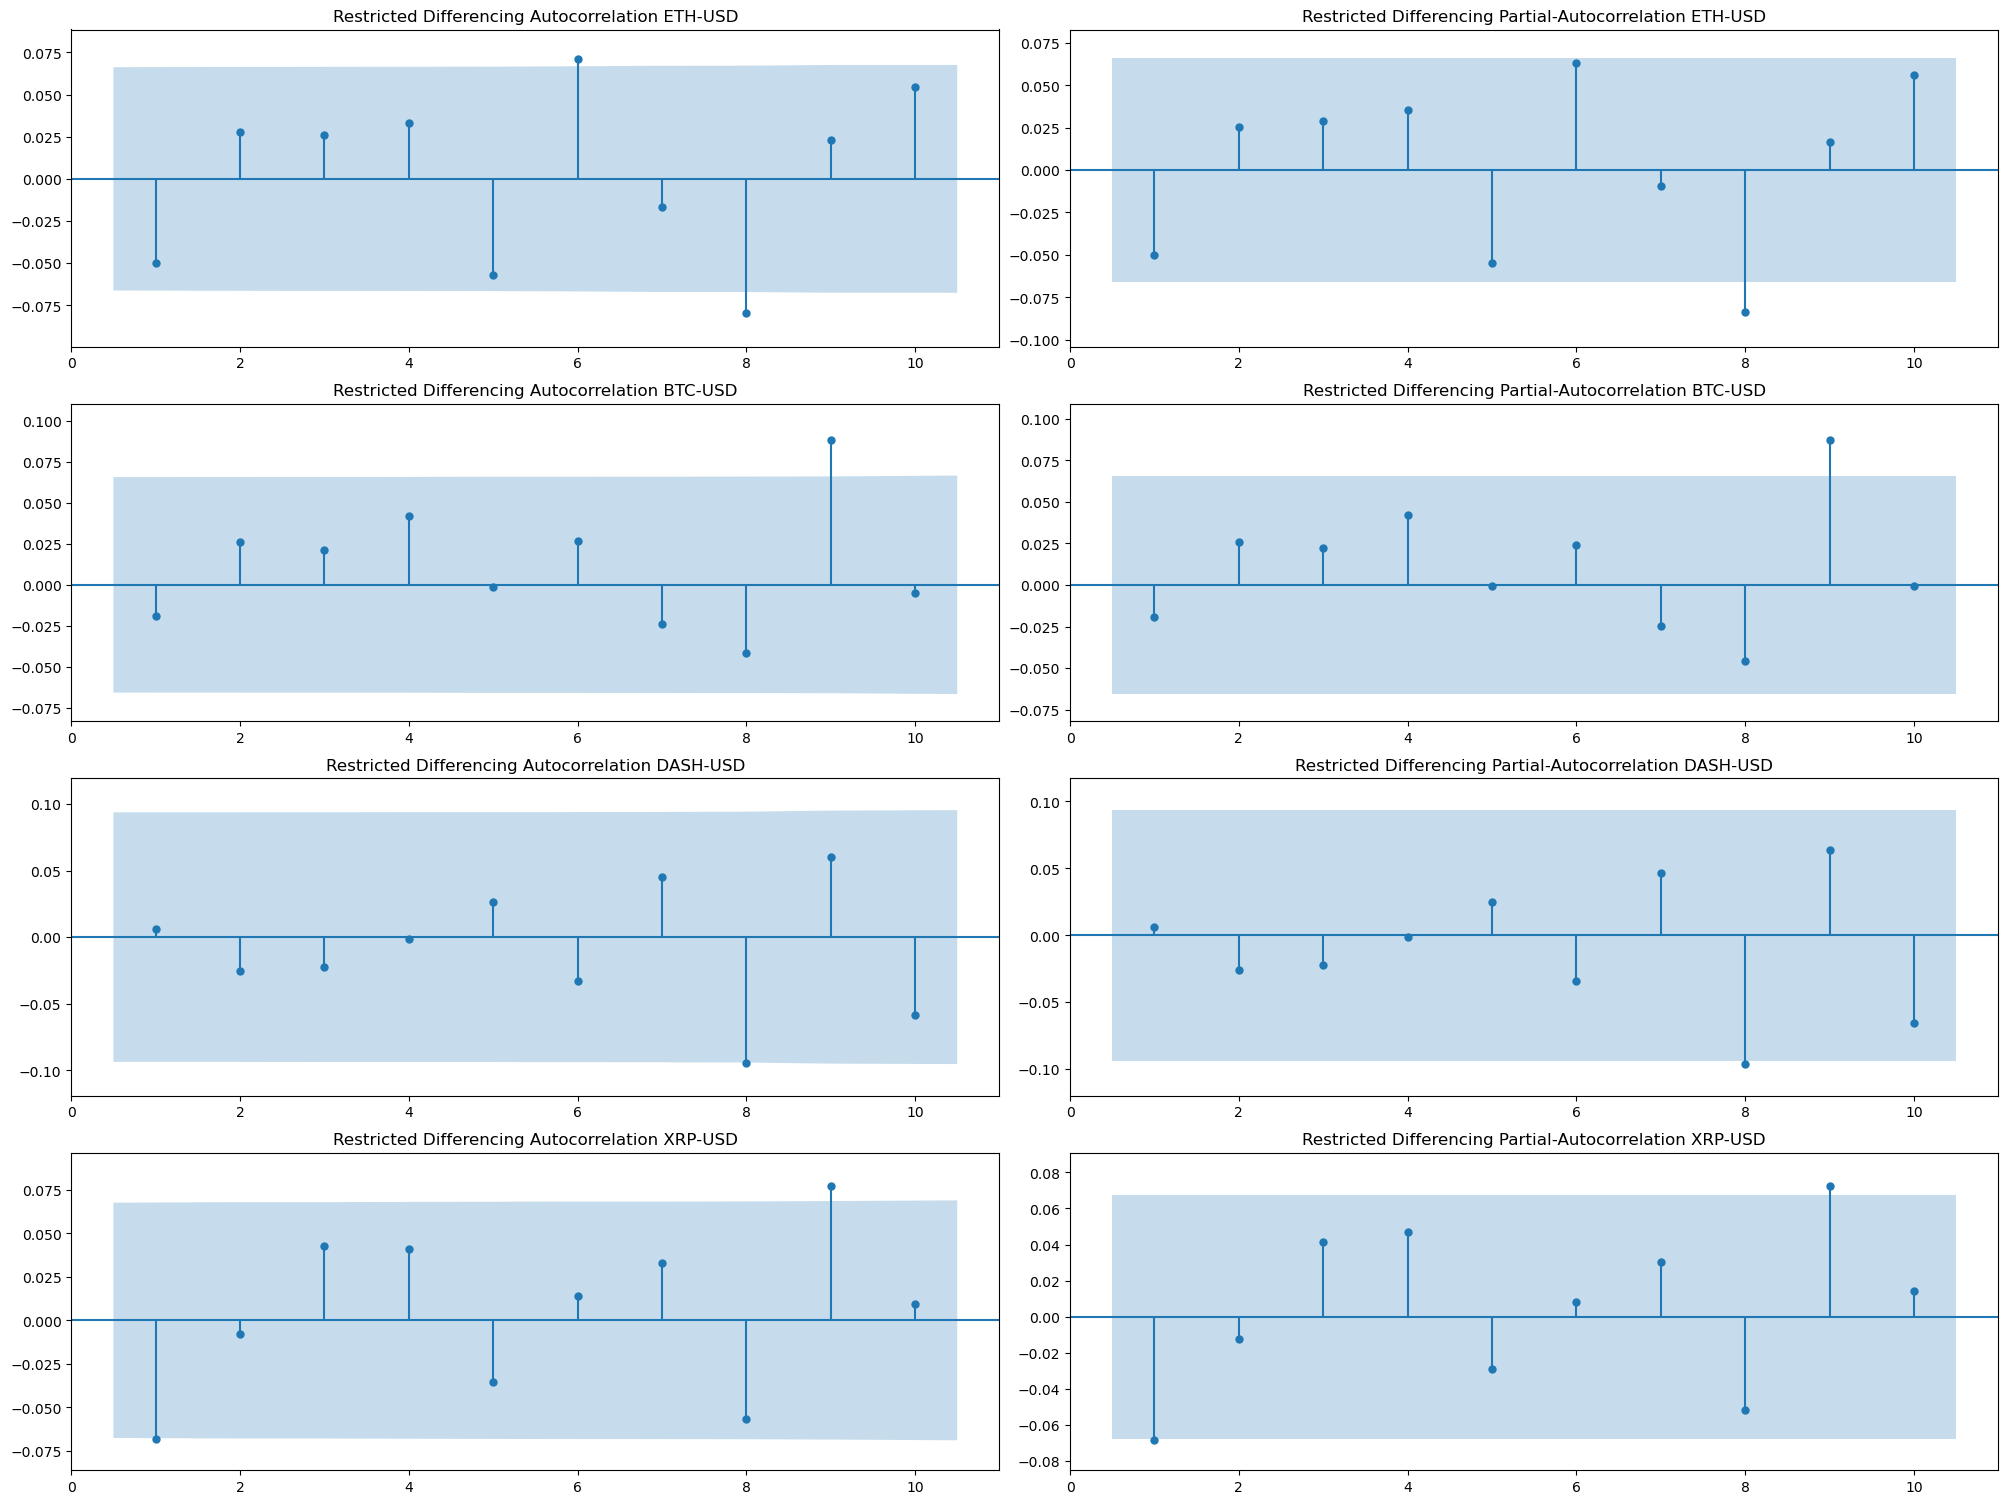

<Figure size 640x480 with 0 Axes>

In [33]:
correlograms(
    trainCryptoDiffDict,
    "Diff",
    cryptoList,
    titleAuto = "Restricted Differencing Autocorrelation",
    titlePartial = "Restricted Differencing Partial-Autocorrelation", 
    zeroAuto = False, yLimsAuto = True,
    zeroPar = False, yLimsPar = True
)

Nonostante la restrizione del dataset dai risultati del test di Lijung-Box e gli autocorrelogrammi sembra proprio che tra i rendimenti delle criptovalute la correlazione seriale sia abbastanza scarsa. 

Questo risultato è abbastanza deludente in termini di strategie di trading basate sulla "compra-vendita" più o meno intelligente dei titoli.
A questo punto non ci resta che esaminare l'eventuale correlazione sui quadrati dei rendimenti. 

## 5] Quadratic autocorrelation

L'analisi sulla correlazione dei quadrati risulta a questo punto necessaria poiché, ricordando che:

$D^{2}[X_t] = E[X_t^{2}] + E^{2}[X_t]$

Se la media fosse nulla quindi la varianza dei rendimenti corrisponderebbe con il quadrato dei rendimenti stessi:

$D^{2}[X_t] = E[X_t^{2}]$

In [34]:
# Ipotesi nulla: la media è zero
null_hypothesis_mean = 0
alpha = 0.05
meanTable = buildTable("Zero Mean Test", ["Crypto", "T-Statistic", "P-Value", "Result"], ["left", "right", "right", "left"])
for crypto in cryptoList:
    # Esegue il test t
    t_statistic, p_value = ttest_1samp(differencingDict[crypto]["Diff"], null_hypothesis_mean)

    # Confronta il p-value con un livello di significatività predefinito (ad esempio, 0.05)
    outcomeString = "Reject" if p_value < alpha else "Accept"
    meanTable.add_row(crypto, str(t_statistic), str(p_value), outcomeString)
# Stampa i risultati del test
console = Console()
console.print(meanTable)

                         Zero Mean Test                          
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ Crypto   ┃         T-Statistic ┃             P-Value ┃ Result ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ ETH-USD  │ 0.33808066325759595 │  0.7353367184851297 │ Accept │
│ BTC-USD  │  0.3725821323911949 │  0.7094976528285228 │ Accept │
│ DASH-USD │  -1.459006273766798 │ 0.14471524793122822 │ Accept │
│ XRP-USD  │ -0.5918757465602607 │  0.5539984936921993 │ Accept │
└──────────┴─────────────────────┴─────────────────────┴────────┘

Per nessuno degli strumenti finanziari possiamo rigettare l'ipotesi nulla di *media nulla* al 95%.

Procediamo quindi con l'analisi dei rendimenti logaritmici quadrati che, qualora risultassero autocorrelati, potrebbero essere modellati con dei modelli GARCH. <br>

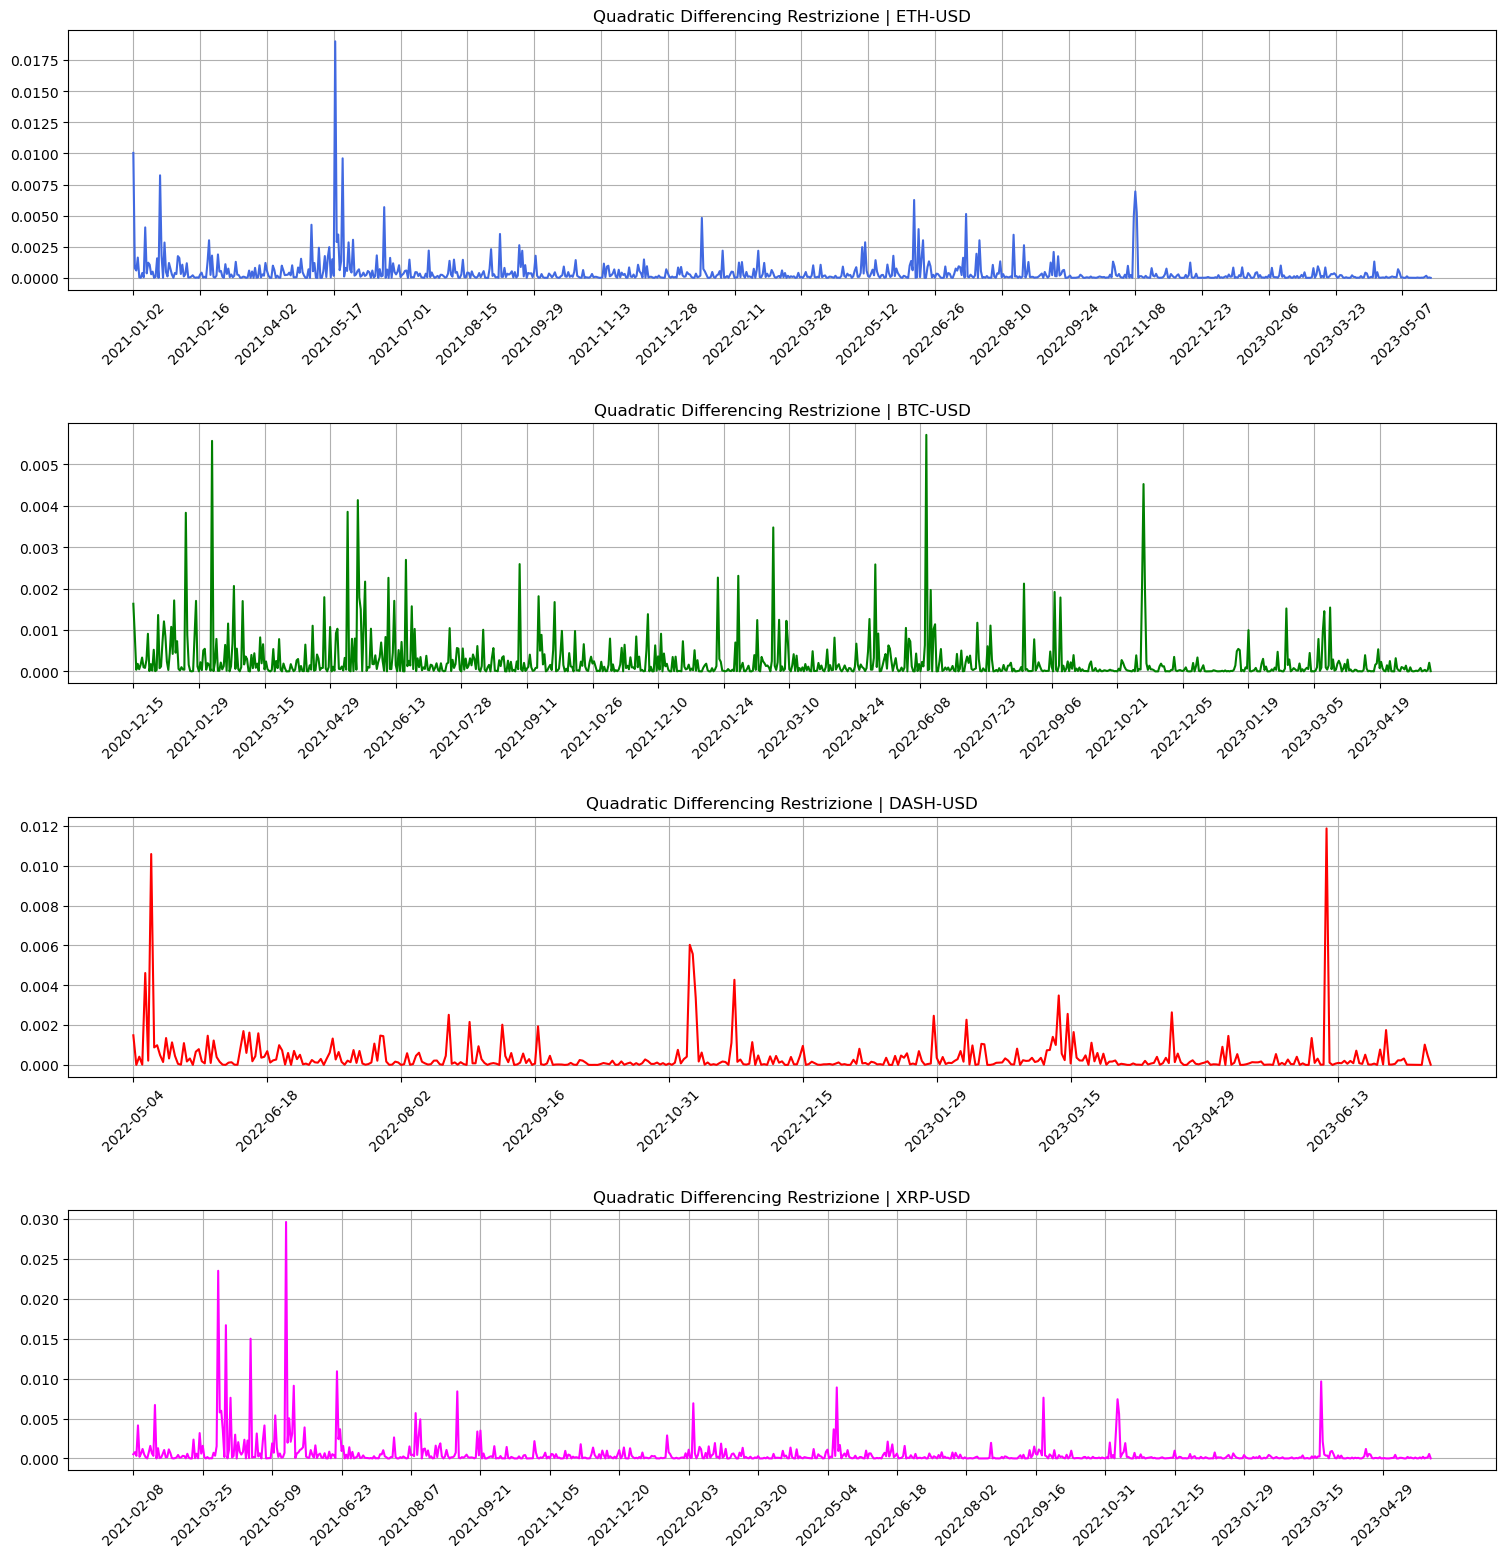

<Figure size 640x480 with 0 Axes>

In [35]:
figure, axs = plt.subplots(nrows = len(cryptoList), figsize = (15,15))
figure.tight_layout(h_pad = 7.5, w_pad = 2)

STEP = 45
ROTATION = 45

i = 0 
for crypto in cryptoList :
    axs[i].plot(trainCryptoDiffDict[crypto]["QuadDiff"], color = colors[i % len(colors)])
    axs[i].set_title("Quadratic Differencing Restrizione | " + crypto)
    axs[i].grid(True)

    xtickPoints = np.arange(start = 0, stop = trainCryptoDict[crypto].shape[0], step = STEP)
    xtickLabels = trainCryptoDict[crypto]["Date"].iloc[xtickPoints]
    axs[i].set_xticks(xtickPoints)
    axs[i].set_xticklabels(xtickLabels, rotation = ROTATION)

    i += 1

plt.show()
plt.clf()

Dall'evidenza grafica sembrerebbe esserci un effetto clustering abbastanza marcato.
Per averne conferma procediamo con un test di *Ljung-Box* sui dati quadratici.

In [36]:
ljung_box_test(trainCryptoDiffDict, "QuadDiff", cryptoList)

                             Ljung-Box                              
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃          StatValue ┃                 pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │ 107.45662340504884 │ 1.7362744278257656e-18 │ Reject  │
│ BTC-USD  │ 28.435878927917237 │  0.0015366636984585028 │ Reject  │
│ DASH-USD │ 20.296369471575147 │   0.026570915198950266 │ Reject  │
│ XRP-USD  │ 124.35893071112875 │  6.585066550321394e-22 │ Reject  │
└──────────┴────────────────────┴────────────────────────┴─────────┘

Dai risultati si evince infatti che per tutte le monete si può rigettare l'ipotesi nulla di *non-autocorrelazione*, concludiamo quindi che tutte le monete presentano autocorrelazione.

Procediamo poi per completezza a graficare gli autocorrelogrammi per le varie monete.

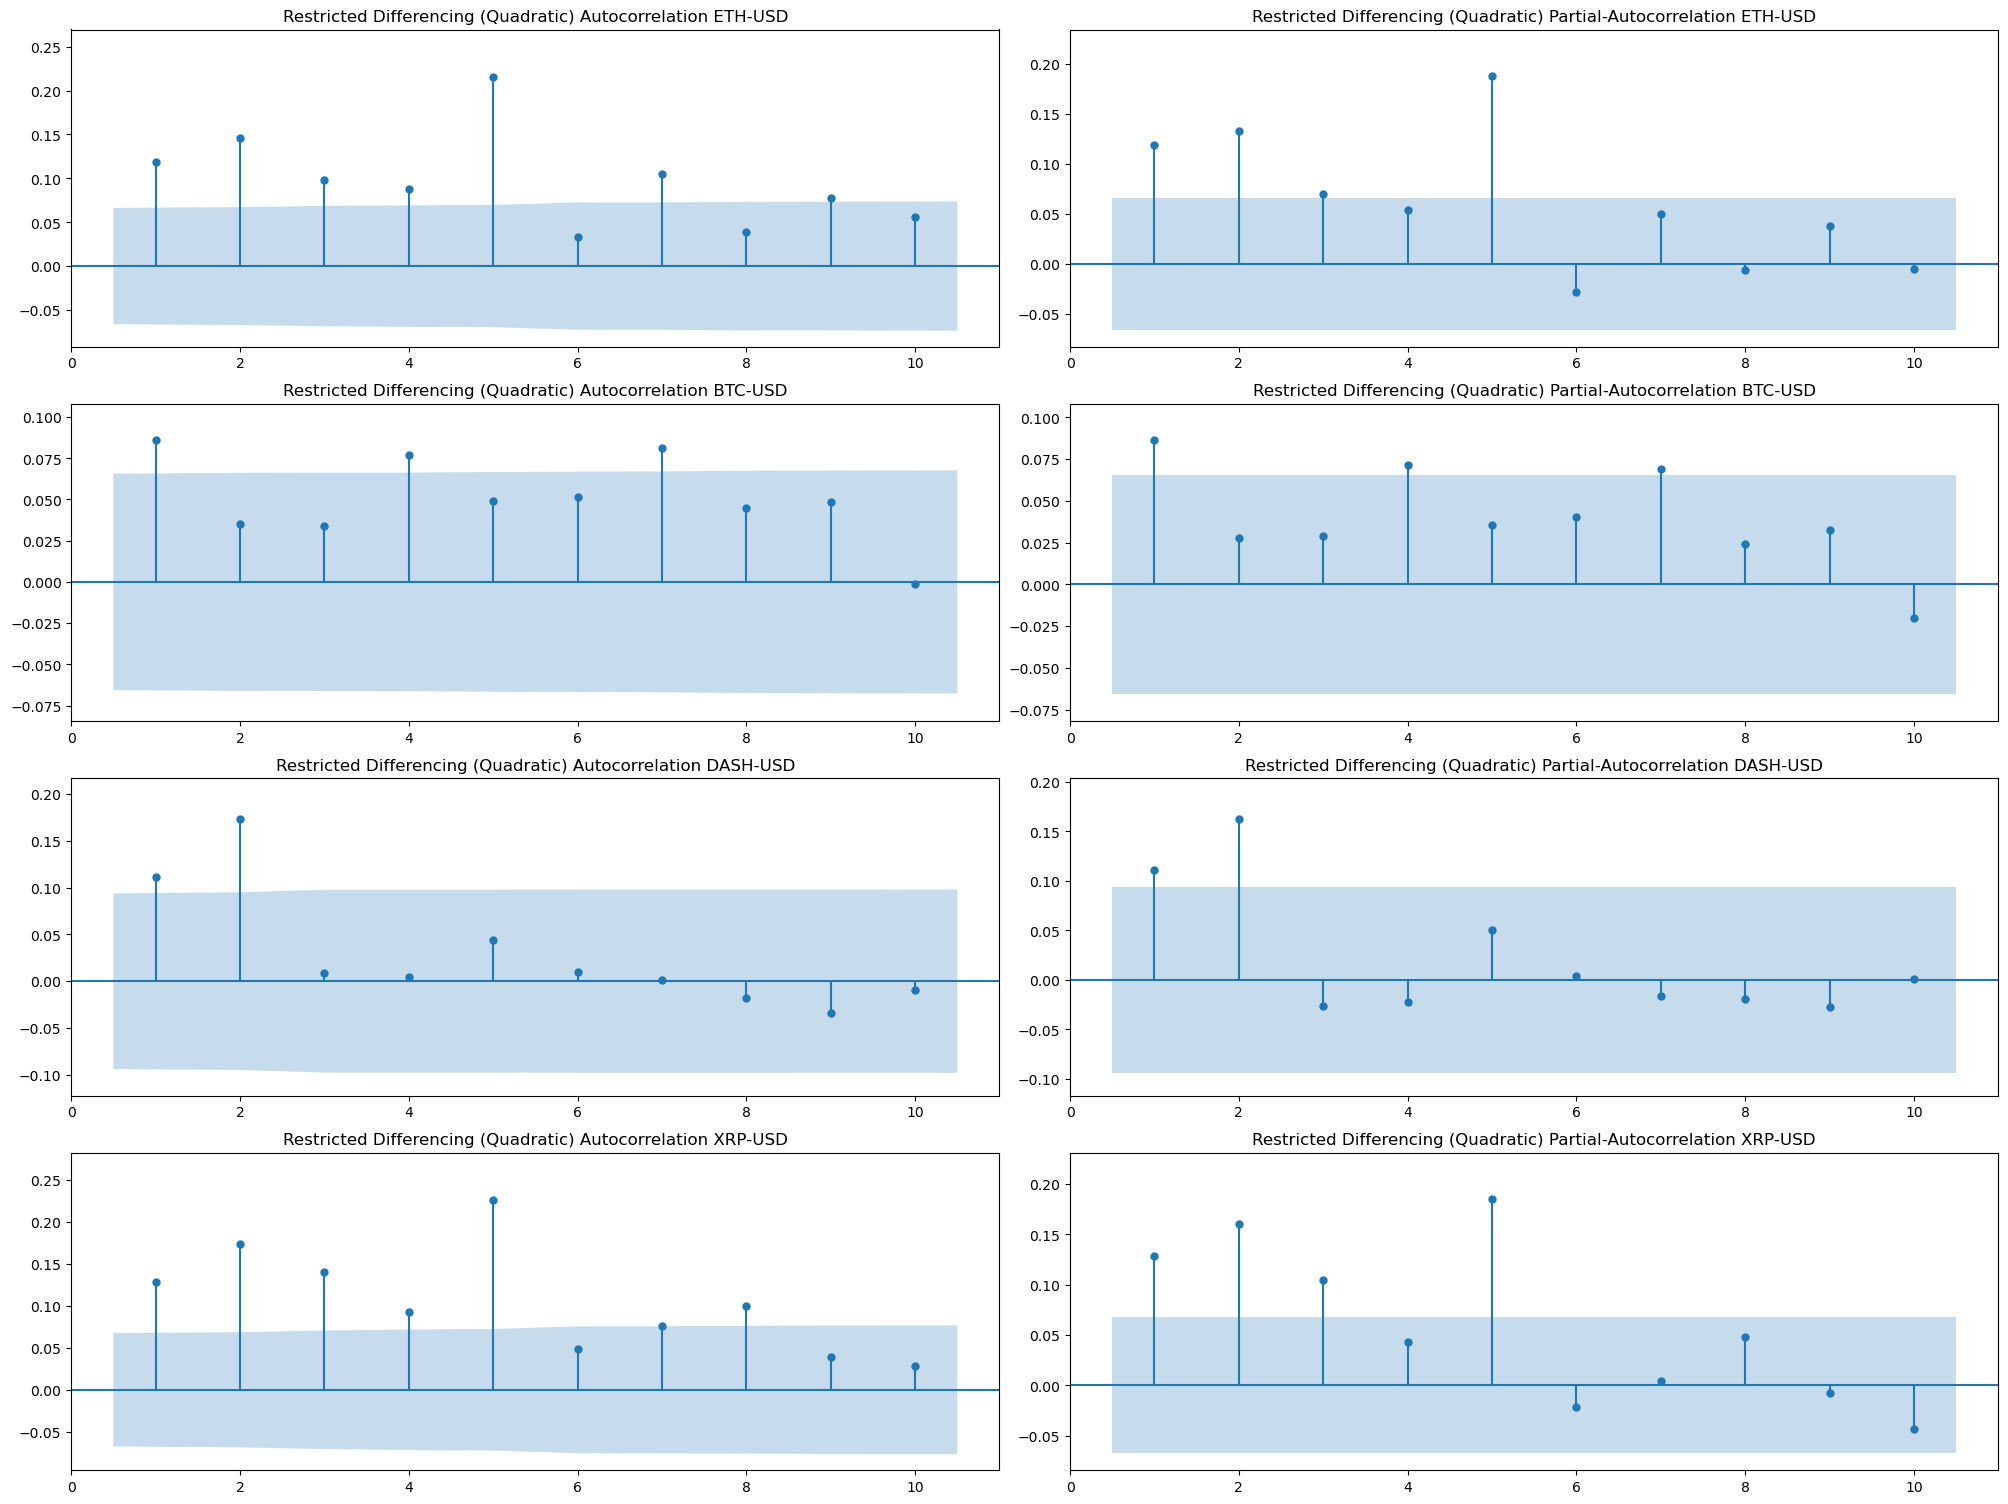

<Figure size 640x480 with 0 Axes>

In [37]:
correlograms(
    trainCryptoDiffDict, 
    "QuadDiff", 
    cryptoList,
    titleAuto = "Restricted Differencing (Quadratic) Autocorrelation",
    titlePartial = "Restricted Differencing (Quadratic) Partial-Autocorrelation",
    zeroAuto = False, zeroPar = False,
    yLimsAuto = True, yLimsPar = True
)

## 6] Analisi con modello GARCH

Come già detto, essendo presente autocorrelazione nella volatilità dei rendimenti, possiamo procedere a modellare tramite *Generalized ARCH model (GARCH)*.

In genere, solo parametrizzazioni ARCH piuttosto ricche sono in grado di misurare adeguatamente le serie finanziarie. Tuttavia, i modelli ampiamente parametrizzati possono essere instabili nella previsione e difficili da stimare.

Per superare le carenze del modello ARCH, nel 1986 *Tim Bollerslev* ha proposto una generalizzazione del modello ARCH chiamata GARCH model.
Il modello consente di valutare adeguatamente i rendimenti finanziari mantenendo però un numero ridotto di parametri.

Nella pratica, il modello GARCH è uno dei modelli di volatilità più utilizzati con successo.

In [38]:
residualsDict : {str, pd.DataFrame} = {}
garchParamsTable = buildTable("GARCH models parameters", ["Crypto", "alpha_0", "alpha_1", "beta_1"], ["left", "right","right","right"])

In [39]:
%%capture
r['source']('./R/R_Garch.R')

garchResiduals_R = robjects.globalenv['garchResiduals']

for crypto in cryptoList :
    tempCryptoDiff = trainCryptoDiffDict[crypto]["Diff"].copy()
    #tempCryptoDiff = tt[crypto]["Diff"].copy()
    model = arch_model(tempCryptoDiff)
    fittedModel = model.fit(disp='off')
    alpha_0 = fittedModel.params["omega"]
    alpha_1 = fittedModel.params["alpha[1]"]
    beta_1 = fittedModel.params["beta[1]"]
    garchParamsTable.add_row(crypto, str(alpha_0), str(alpha_1), str(beta_1))

    diffList_R = pandas2ri.py2rpy(tempCryptoDiff)
    residuals_R = garchResiduals_R(diffList_R)
    residuals = pd.Series(list(residuals_R)[1 : ]).dropna()

    diff = residuals - fittedModel.resid

    residualsDict[crypto] = pd.DataFrame(data = {"Resid" : residuals})

Fittando il modello GARCH(1,1) per ogni cryptovaluta, otteniamo i seguenti parametri di modello.

In [40]:
Console().print(garchParamsTable)

                            GARCH models parameters                             
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃ Crypto   ┃                alpha_0 ┃             alpha_1 ┃             beta_1 ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ ETH-USD  │   8.76217244982038e-06 │ 0.09991210016705068 │ 0.8801005312804235 │
│ BTC-USD  │   5.27417398334347e-06 │  0.0499931225074402 │ 0.9298499390118588 │
│ DASH-USD │  5.795185708522076e-05 │ 0.10761903431571908 │ 0.7379445393229688 │
│ XRP-USD  │ 1.5061776323395724e-05 │ 0.10021435919806294 │ 0.8785064342363201 │
└──────────┴────────────────────────┴─────────────────────┴────────────────────┘

Prima di procedere con la costruzione delle bande di predizione, cerchiamo di valutare la bontà del modello attraverso un'analisi dei residui.

Per prima cosa ne valutiamo la $Stazionarietà$ attraverso i test *KPSS* e *ADF*. In particolare un buon modello dovrebbe presentare residui stazionari.

In [41]:
kpss_test(residualsDict, "Resid", cryptoList)
adf_test(residualsDict, "Resid", cryptoList)

                        KPSS                         
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃           StatValue ┃ pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │ 0.17432400371354975 │    0.1 │ Accept  │
│ BTC-USD  │ 0.19844539579445133 │    0.1 │ Accept  │
│ DASH-USD │ 0.11788575359356059 │    0.1 │ Accept  │
│ XRP-USD  │ 0.10803807541946762 │    0.1 │ Accept  │
└──────────┴─────────────────────┴────────┴─────────┘

                                 ADF                                 
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃           StatValue ┃                 pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │ -15.693567424856559 │ 1.4241061163949666e-28 │ Reject  │
│ BTC-USD  │ -29.079199700789154 │                    0.0 │ Reject  │
│ DASH-USD │ -20.551692589739947 │                    0.0 │ Reject  │
│ XRP-USD  │ -30.272866468250122 │                    0.0 │ Reject  │
└──────────┴─────────────────────┴────────────────────────┴─────────┘

Una volta stabilita la stazionarietà procediamo valutandone l'$Autocorrelazione$ con il test di *Ljung-Box*. In particolare un buon modello dovrebbe mostrare residui scorrelati.

In [42]:
ljung_box_test(residualsDict, "Resid", cryptoList)

                            Ljung-Box                            
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃          StatValue ┃              pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │ 12.429167305858956 │  0.2573598822424017 │ Accept  │
│ BTC-USD  │ 11.049385706036809 │ 0.35368336960583363 │ Accept  │
│ DASH-USD │  7.738434333520586 │  0.6543690599625923 │ Accept  │
│ XRP-USD  │  13.16396100965736 │ 0.21464853827574287 │ Accept  │
└──────────┴────────────────────┴─────────────────────┴─────────┘

Andiamo a produrre degli autocorrelogrammi per averne anche evidenza grafica.

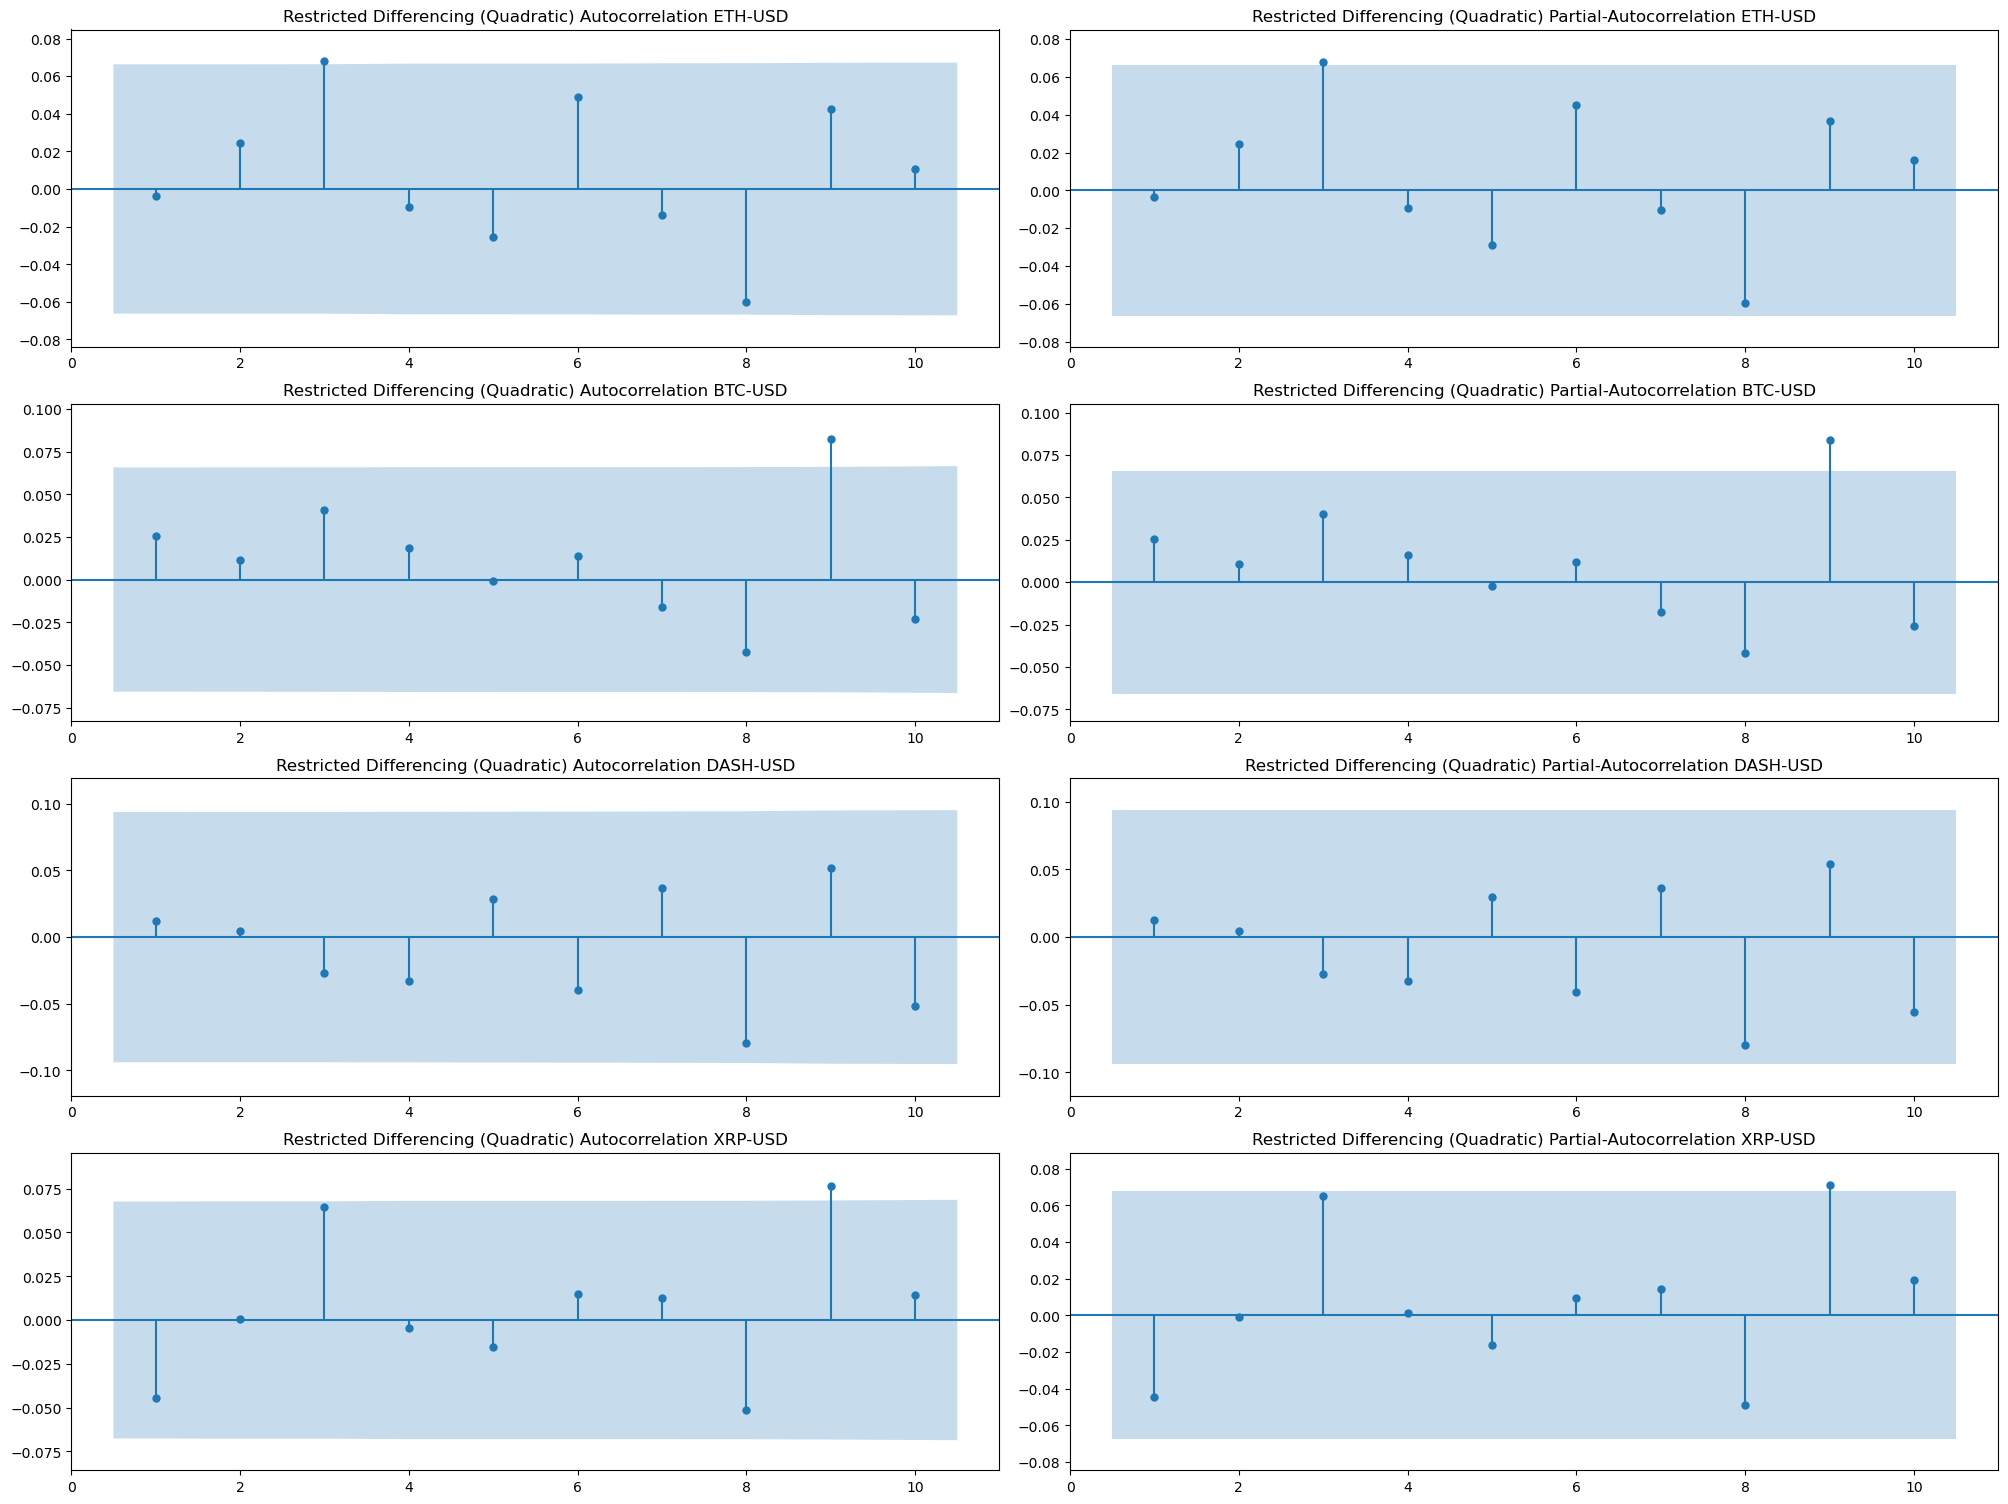

<Figure size 640x480 with 0 Axes>

In [43]:
correlograms(
    residualsDict, 
    "Resid", 
    cryptoList,
    titleAuto = "Restricted Differencing (Quadratic) Autocorrelation",
    titlePartial = "Restricted Differencing (Quadratic) Partial-Autocorrelation",
    zeroAuto = False, zeroPar = False,
    yLimsAuto = True, yLimsPar = True
)

Avendo avuto conferma di trovarci davanti a residui scorrelati, possiamo infine procedere ad un'analisi dell'$Eteroschedasticità$ attraverso i test di *Breusch-Pagan* e *White*. In particolare un buon modello non dovrebbe presentare residui molto eteroschedastici.

In [44]:
breusch_pagan_test(residualsDict, "Resid", cryptoList)
white_test(residualsDict, "Resid", cryptoList)

                           Breusch-Pagan                           
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃           StatValue ┃               pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │  3.0552372793185714 │   0.0808291850355068 │ Accept  │
│ BTC-USD  │    4.81037750869296 │ 0.028547494279450508 │ Reject  │
│ DASH-USD │ 0.16268201483311248 │   0.6868977927761047 │ Accept  │
│ XRP-USD  │   6.365618133810369 │ 0.011819036032203746 │ Reject  │
└──────────┴─────────────────────┴──────────────────────┴─────────┘

                              White                               
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto   ┃          StatValue ┃               pValue ┃ Outcome ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD  │ 2.1579503833990525 │  0.11617918995361964 │ Accept  │
│ BTC-USD  │ 2.5589215991266947 │  0.07795936137356213 │ Accept  │
│ DASH-USD │  1.432578207289038 │   0.2398217511979006 │ Accept  │
│ XRP-USD  │ 3.4750426643481562 │ 0.031407409545298644 │ Reject  │
└──────────┴────────────────────┴──────────────────────┴─────────┘

Qui in alcuni casi si ha una lieve eteroschedasticità ma non essendo eccessivamente marcata possiamo comunque concludere che il modello è adeguato e procedere con la trattazione.

Grafichiamo quindi i residui ottenuti.

<Figure size 1600x900 with 0 Axes>

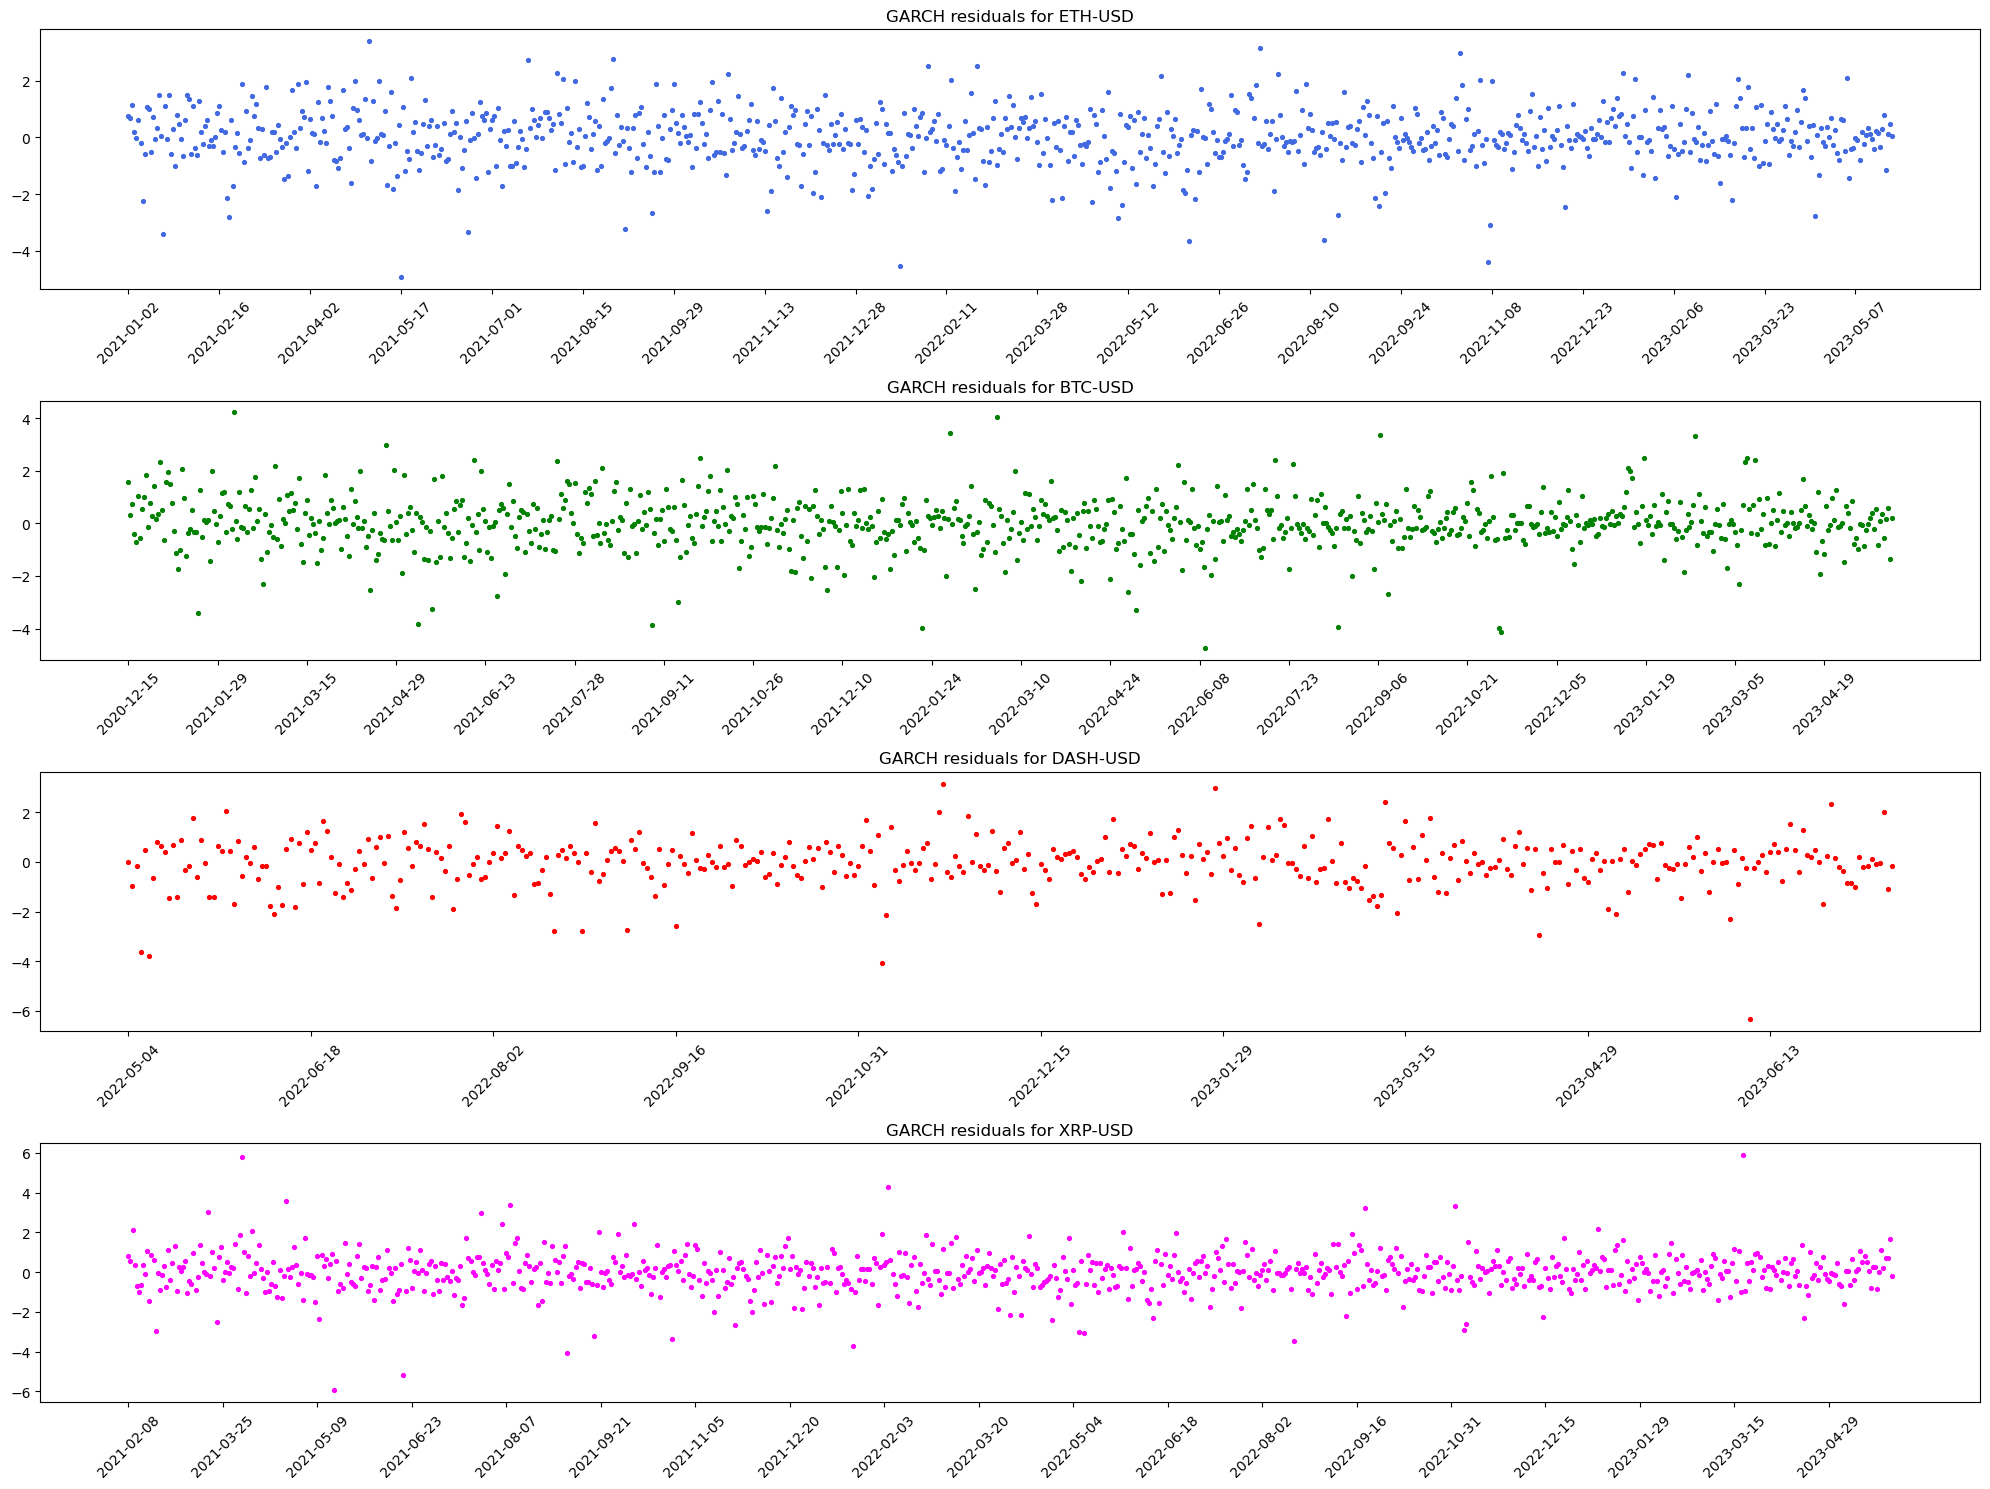

<Figure size 640x480 with 0 Axes>

In [45]:
plt.figure(figsize= (16,9))
fig, axs = plt.subplots(nrows=len(cryptoList), figsize=(20, 15))
i = 0
for crypto in cryptoList:
    axs[i].scatter(x = np.arange(0, residualsDict[crypto].shape[0]), y = residualsDict[crypto]["Resid"], sizes = [7.5], color = colors[i])
    axs[i].set_title("GARCH residuals for " + crypto)

    xtickPoints = np.arange(start = 0, stop = trainCryptoDict[crypto].shape[0], step = STEP)
    xtickLabels = trainCryptoDict[crypto]["Date"].iloc[xtickPoints]
    axs[i].set_xticks(xtickPoints)
    axs[i].set_xticklabels(xtickLabels, rotation = ROTATION)
    i += 1

fig.set_tight_layout(tight = True)


plt.show()
plt.clf()

### 6.1] Approccio non parametrico (Tecnica di Bootstrap)

Con l'obiettivo di generare delle bande di predizione in cui ci aspettiamo che ricada il nostro testing set andiamo ad applicare la tecnica di *Bootstrap*.
Questa tecnica, che sembra empiricamente funzionare discretamente bene, è molto facile e veloce rispetto ad un tradizionale approccio parametrico ma non dà informazioni complete sul processo generatore della serie dei residui.

Procediamo quindi con i seguenti passi per ogni cryptovaluta:
 1. Fit del modello *GARCH(1,1)* sul trainingSet dei rendimenti
 2. Estrazione dei parametri del modello ($\alpha_0$, $\alpha_1$, $\beta_1$)
 3. Tecnica di Bootstrap:
    - Estrazione di *TESTING_SET_LEN* samples con rimpiazzamento dai residui del modello
    - Generazione di *10000 traiettorie*:
      <br> $\sigma^2_t = \alpha_0 + \alpha_1 X_{t-1}^2 + \beta_1 \sigma_{t-1}^2$
      <br> $X_t = \sigma_t W_t$
      <br> $\forall t = 1,...,testSetLen$
      <br> Dove $\sigma_0, X_0 = lastTrainingSetPoint$
  

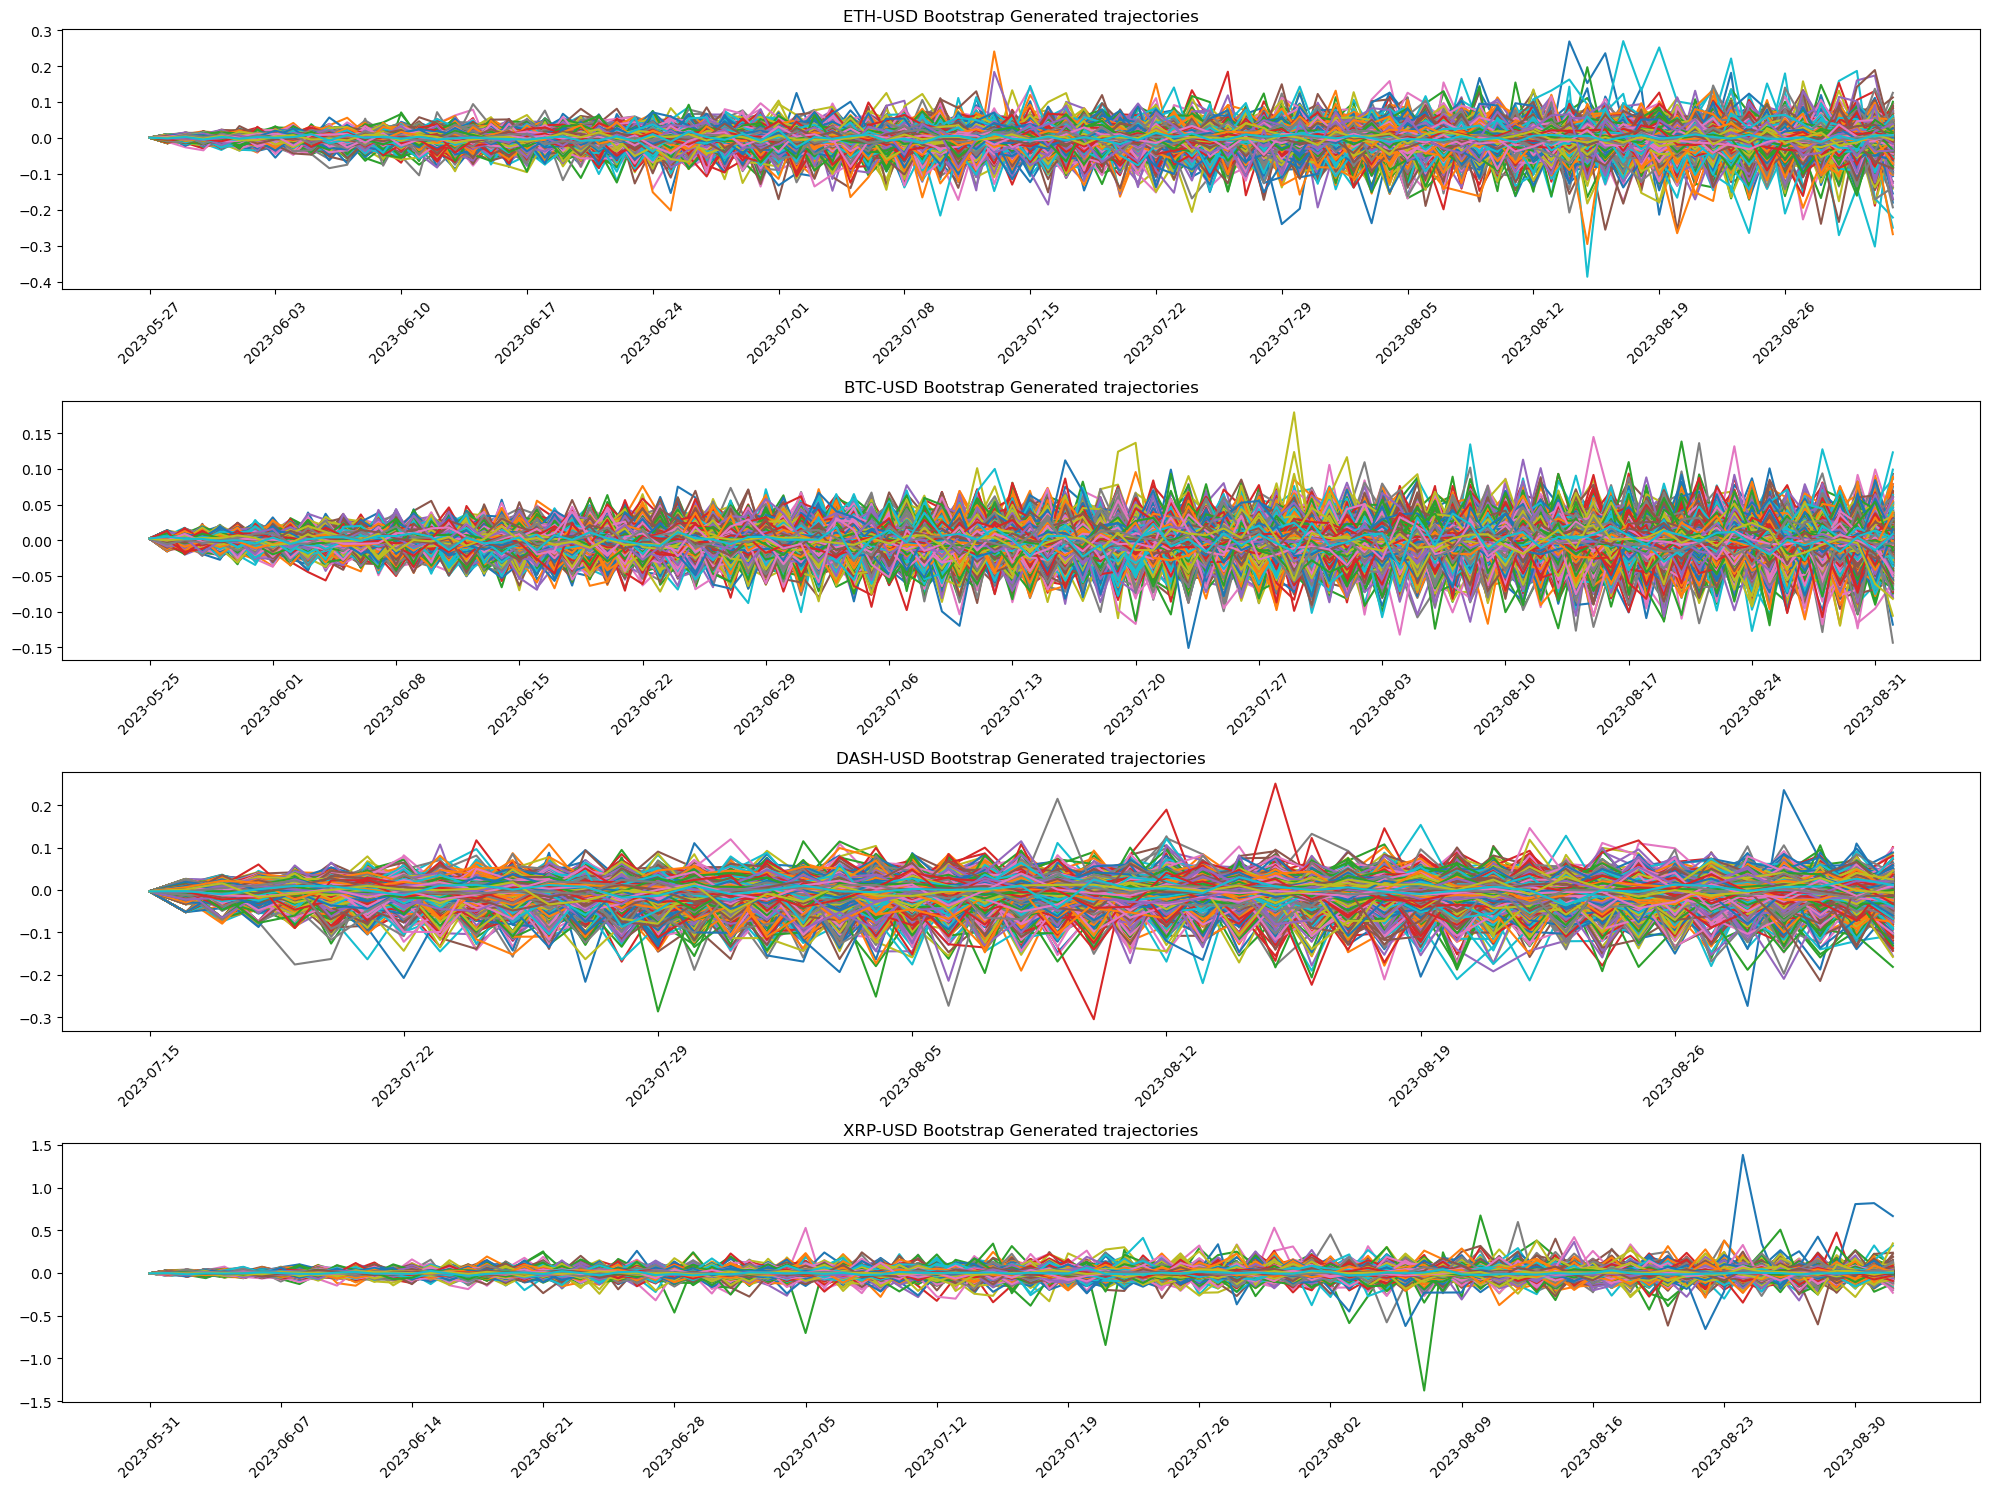

<Figure size 640x480 with 0 Axes>

In [46]:
NUM_SAMPLES = 10000
fig, axs = plt.subplots(nrows = len(cryptoList), ncols = 1, figsize=(20,15))
axsIndex = 0
np.random.seed(NP_RANDOM_SEED)
trajectoriesDict : dict[str, list[list]] = {}


garchResiduals_R = robjects.globalenv['garchResiduals']

STEP = 7

for crypto in cryptoList :
    TRAINING_SET_LEN = trainCryptoDiffDict[crypto]["Diff"].shape[0]
    TESTING_SET_LEN = testCryptoDiffDict[crypto]["Diff"].shape[0]
    garchModel = arch_model(trainCryptoDiffDict[crypto]["Diff"])
    fittedModel = garchModel.fit(disp = 'off')
    residuals = residualsDict[crypto]["Resid"]

    alpha_0 = fittedModel.params["omega"]
    alpha_1 = fittedModel.params["alpha[1]"]
    beta_1 = fittedModel.params["beta[1]"]

    sigma_0 = trainCryptoDiffDict[crypto]["Diff"][TRAINING_SET_LEN - 1]
    trajectories = []
    for _ in range(NUM_SAMPLES):
        computedXt = []
        bootstrapSample = np.random.choice(a = residuals, size = TESTING_SET_LEN, replace = True)
        prev_Xt = trainCryptoDiffDict[crypto]["Diff"].iloc[TRAINING_SET_LEN-1]
        computedXt.append(prev_Xt)
        prev_var_t = sigma_0**2
        for i in range(TESTING_SET_LEN):
            var_t = alpha_0 + (alpha_1 * (prev_Xt**2)) + (beta_1 * prev_var_t)
            Xt = np.sqrt(var_t) * bootstrapSample[i]
            computedXt.append(Xt)
            prev_Xt = Xt
            prev_var_t = var_t
        trajectories.append(computedXt)
    trajectoriesDict[crypto] = trajectories

    axs[axsIndex].set_title(crypto + " Bootstrap Generated trajectories")
    for traj in trajectories:
        axs[axsIndex].plot(traj)

    xtickPoints = np.arange(start = 0, stop = testCryptoDiffDict[crypto].shape[0], step = STEP)
    xtickLabels = testCryptoDict[crypto]["Date"].iloc[xtickPoints]
    axs[axsIndex].set_xticks(xtickPoints)
    axs[axsIndex].set_xticklabels(xtickLabels, rotation = ROTATION)
    
    axsIndex += 1

fig.set_tight_layout(tight = True)
    

plt.show()
plt.clf()

Partendo dalle traiettorie generate, andiamo a calcolare i quantili empirici per ogni t e costruiamo le nostre bande di predizione al 10% e 90%.

Grafichiamo poi il tutto sui dati di testing effettivi.

In [47]:
LOW_PERC = 0.10
HIGH_PERC = 0.90

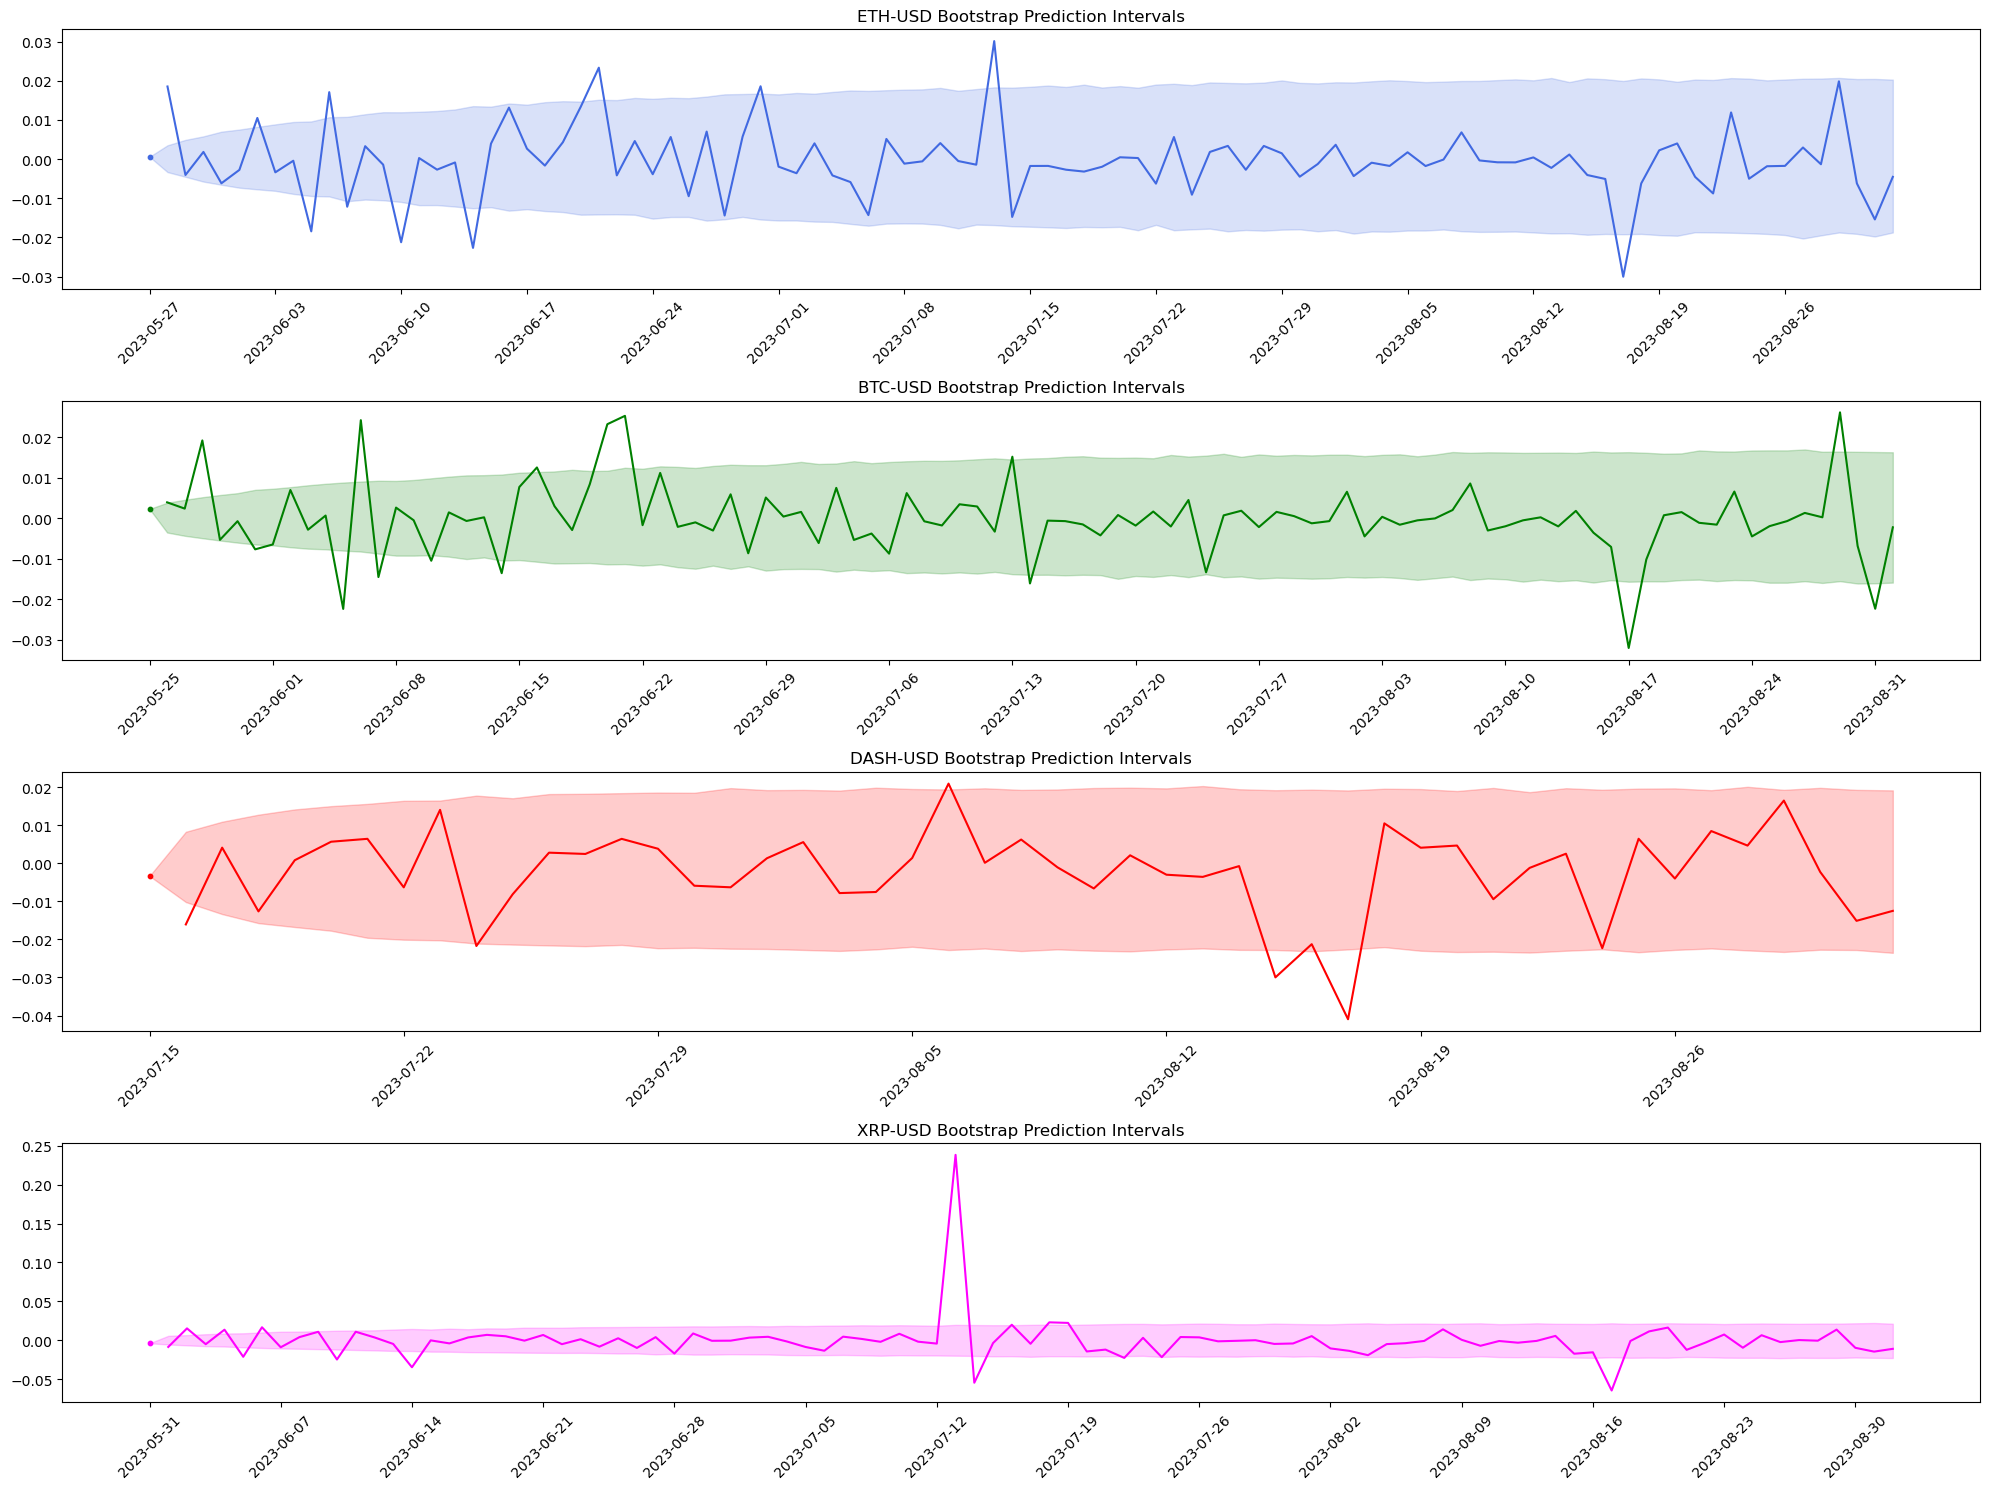

<Figure size 640x480 with 0 Axes>

In [48]:
fig, axs = plt.subplots(nrows = len(cryptoList), ncols = 1, figsize=(20,15))
axsIndex = 0
trajQuantDict : dict[str,tuple[list,list]] = {}

for crypto in cryptoList:
    TRAINING_SET_LEN = trainCryptoDiffDict[crypto].shape[0]
    TESTING_SET_LEN = testCryptoDiffDict[crypto].shape[0]
    
    trajectories = trajectoriesDict[crypto]
    trajectories = np.array(trajectories)
    trajectories = trajectories.T
    trajQuantList_25 = []
    trajQuantList_75 = []
    for i in range(trajectories.shape[0]):
        trajQuant_25 = np.quantile(a = trajectories[i], q = LOW_PERC)
        trajQuant_75 = np.quantile(a = trajectories[i], q = HIGH_PERC)
        trajQuantList_25.append(trajQuant_25)
        trajQuantList_75.append(trajQuant_75)
    trajQuantDict[crypto] = (trajQuantList_25,trajQuantList_75)

    firstPoint = trainCryptoDiffDict[crypto]["Diff"].iloc[TRAINING_SET_LEN - 1]
    axs[axsIndex].plot(np.arange(1, TESTING_SET_LEN + 1, 1), testCryptoDiffDict[crypto]["Diff"], color = colors[axsIndex])
    axs[axsIndex].scatter(x = 0, y = firstPoint, color = colors[axsIndex], sizes = [10])
    axs[axsIndex].fill_between(x = np.arange(0, len(trajQuantList_25), 1), y1 = trajQuantList_25, y2 = trajQuantList_75, alpha = 0.20, color = colors[axsIndex])
    axs[axsIndex].set_title(crypto + " Bootstrap Prediction Intervals")
    
    xtickPoints = np.arange(start = 0, stop = testCryptoDiffDict[crypto].shape[0], step = STEP)
    xtickLabels = testCryptoDict[crypto]["Date"].iloc[xtickPoints]
    axs[axsIndex].set_xticks(xtickPoints)
    axs[axsIndex].set_xticklabels(xtickLabels, rotation = ROTATION)
    
    axsIndex += 1

fig.set_tight_layout(tight = True)

plt.show()
plt.clf()
    

Calcoliamo ora la percentuale di punti che ricade nelle bande di predizione generate.

In [49]:
inIntervalTable = buildTable("TestingSet captured by interval - Bootstrap", ["Crypto", "% of Points"], ["left", "right"])

for crypto in cryptoList:
    inInterval = 0
    lowTraj = trajQuantDict[crypto][0][1:]
    highTraj = trajQuantDict[crypto][1][1:]
    TESTING_SET_LEN = testCryptoDiffDict[crypto].shape[0]
    for t in range(0, TESTING_SET_LEN):
        if lowTraj[t] <= testCryptoDiffDict[crypto]["Diff"][t] <= highTraj[t]:
            inInterval+=1
    inIntervalTable.add_row(crypto, str((inInterval/TESTING_SET_LEN) * 100))

console = Console()
console.print(inIntervalTable)

TestingSet captured by interval 
          - Bootstrap           
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Crypto   ┃       % of Points ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ ETH-USD  │ 88.65979381443299 │
│ BTC-USD  │ 83.83838383838383 │
│ DASH-USD │ 89.58333333333334 │
│ XRP-USD  │ 83.87096774193549 │
└──────────┴───────────────────┘

### 6.2] Approccio Parametrico

Non avendo informazioni sul processo generatore dei residui e non potendo quindi fare delle conclusioni di carattere statistico con il solo approccio di *Bootstrap*, approfondiamo la trattazione considerando un approccio parametrico.


Per l'approccio parametrico abbiamo due ipotesi sulla distribuzione dei residui:
 - Skewed Student
 - Generalized Logistic

Andiamo quindi a vedere quale tra le due, per ogni crypto, cattura meglio i residui del modello GARCH.

#### 6.2.1] Ricerca della distribuzione

In [50]:
np.random.seed(seed = NP_RANDOM_SEED)

r['source']('./R/R_Skewt.R')
r['source']('./R/R_Glogis.R')

skewtFit_R = robjects.globalenv['skewt_fit']
genLogFit_R = robjects.globalenv['genlogistic_fit']

skewedStudentParamsDict : dict[str, tuple] = {}
genLogisticParamsDict : dict[str, tuple] = {}

for crypto in cryptoList :
    resid = residualsDict[crypto]["Resid"]
    resid_R = pandas2ri.py2rpy(resid)

    fitResult_R = skewtFit_R(resid_R)
    fitResults = list(fitResult_R)

    ## loc, scale, alpha, df, loglik
    skewedStudentParamsDict[crypto] = (fitResults[0][0], fitResults[0][1], fitResults[0][2], fitResults[0][3], fitResults[1][0], fitResults[3])


for crypto in cryptoList :
    resid = residualsDict[crypto]["Resid"]
    resid_R = pandas2ri.py2rpy(resid)

    fitResult_R = genLogFit_R(resid_R)
    fitResults = list(fitResult_R)

    ## loc, scale, shape, loglik
    genLogisticParamsDict[crypto] = (fitResults[0][0], fitResults[0][1], fitResults[0][2], fitResults[1][0], fitResults[3])


skewtTable = buildTable("Skewed T Student Params", ["Crypto", "Location", "Scale", "Gamma", "Degrees of Freedom", "LogLikelihood"], ["left", "right", "right", "right", "right", "right"])
genlogTable = buildTable("Generalized Logistic Params", ["Crypto", "Location", "Scale", "Shape", "LogLikelihood"], ["left", "right", "right", "right", "right"])
for crypto in cryptoList :
    skewtTable.add_row(crypto, str(skewedStudentParamsDict[crypto][0]), str(skewedStudentParamsDict[crypto][1]), str(skewedStudentParamsDict[crypto][2]), str(skewedStudentParamsDict[crypto][3]), str(skewedStudentParamsDict[crypto][4]))
    genlogTable.add_row(crypto, str(genLogisticParamsDict[crypto][0]), str(genLogisticParamsDict[crypto][1]), str(genLogisticParamsDict[crypto][2]), str(genLogisticParamsDict[crypto][3]))

Console().print(skewtTable)
Console().print(genlogTable)


                                              Skewed T Student Params                                              
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Crypto   ┃           Location ┃              Scale ┃             Gamma ┃ Degrees of Freedom ┃     LogLikelihood ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ ETH-USD  │ 0.252536912233459… │ 0.7931626273828345 │ -0.3228989079727… │  4.769267887102352 │ -1204.1528851052… │
│ BTC-USD  │ 0.001702114020373… │ 0.6790751453997663 │ 0.01147859718582… │ 3.3067892720438783 │ -1203.4957732999… │
│ DASH-USD │ 0.3905158781548028 │ 0.7879525603521891 │ -0.6704196131287… │ 3.9902423864795264 │ -585.71440125403… │
│ XRP-USD  │ 0.058080550672878… │ 0.6604521091349947 │ -0.1087986200691… │ 3.3914213261598682 │ -1103.9276325024… │
└──────────┴────────────────────┴────────────────────┴───────────────────┴────────────────────┴───────────────────┘

                                    Generalized Logistic Params                                    
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ Crypto   ┃            Location ┃               Scale ┃              Shape ┃       LogLikelihood ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ ETH-USD  │ 0.23732458830417807 │ 0.48083967720439225 │ 0.7640744756521249 │ -1205.3666488127258 │
│ BTC-USD  │   0.125861732368985 │  0.4894503257669105 │ 0.8525401171276977 │  -1214.435506980533 │
│ DASH-USD │  0.3405336970501534 │ 0.41752163539790144 │ 0.6042602656979353 │  -587.6248517903006 │
│ XRP-USD  │  0.1149358907546211 │  0.4703252736043755 │ 0.8395420047125439 │ -1121.7298065866314 │
└──────────┴─────────────────────┴─────────────────────┴────────────────────┴─────────────────────┘

Analizziamo gli intervalli di confidenza al 95% dei diversi parametri sia della Skewed Student che della Generalized Logistic

In [51]:
paramsList = ["Location", "Scale", "Gamma", "DegreesOfFreedom"]
for crypto in cryptoList :
    infoMatrix = []
    for i in range(0, len(skewedStudentParamsDict[crypto][-1])) :
        line = skewedStudentParamsDict[crypto][-1][i]
        infoMatrixLine = [paramsList[i], skewedStudentParamsDict[crypto][i], line[0], line[1], line[2]]
        infoMatrix.append(infoMatrixLine)
    paramsDataFrame = pd.DataFrame(data = infoMatrix, columns = ["ParamName", "EstimatedValue", "BootstrapValue", "FirstBoundary", "LastBoundary"])
    paramsDataFrame = paramsDataFrame.style.set_caption(f"Confidence Intervals For {crypto} - Skewed Student")
    display(paramsDataFrame)
    print("\n")

print("\n\n")

In [52]:
paramsList = ["Location", "Scale", "Shape"]
for crypto in cryptoList :
    infoMatrix = []
    for i in range(0, len(genLogisticParamsDict[crypto][-1])) :
        line = genLogisticParamsDict[crypto][-1][i]

        infoMatrixLine = [paramsList[i], genLogisticParamsDict[crypto][i], line[0], line[1], line[2]]
        infoMatrix.append(infoMatrixLine)
    paramsDataFrame = pd.DataFrame(data = infoMatrix, columns = ["ParamName", "EstimatedValue", "BootstrapValue", "FirstBoundary", "LastBoundary"])
    paramsDataFrame = paramsDataFrame.style.set_caption(f"Confidence Intervals For {crypto} - Generalized Logistic")
    display(paramsDataFrame)
    print("\n")
print("\n\n")

Vediamo l'andamento delle due distribuzioni rispetto ai residui con:
* Istogrammi a confronto
* QQ-Plot

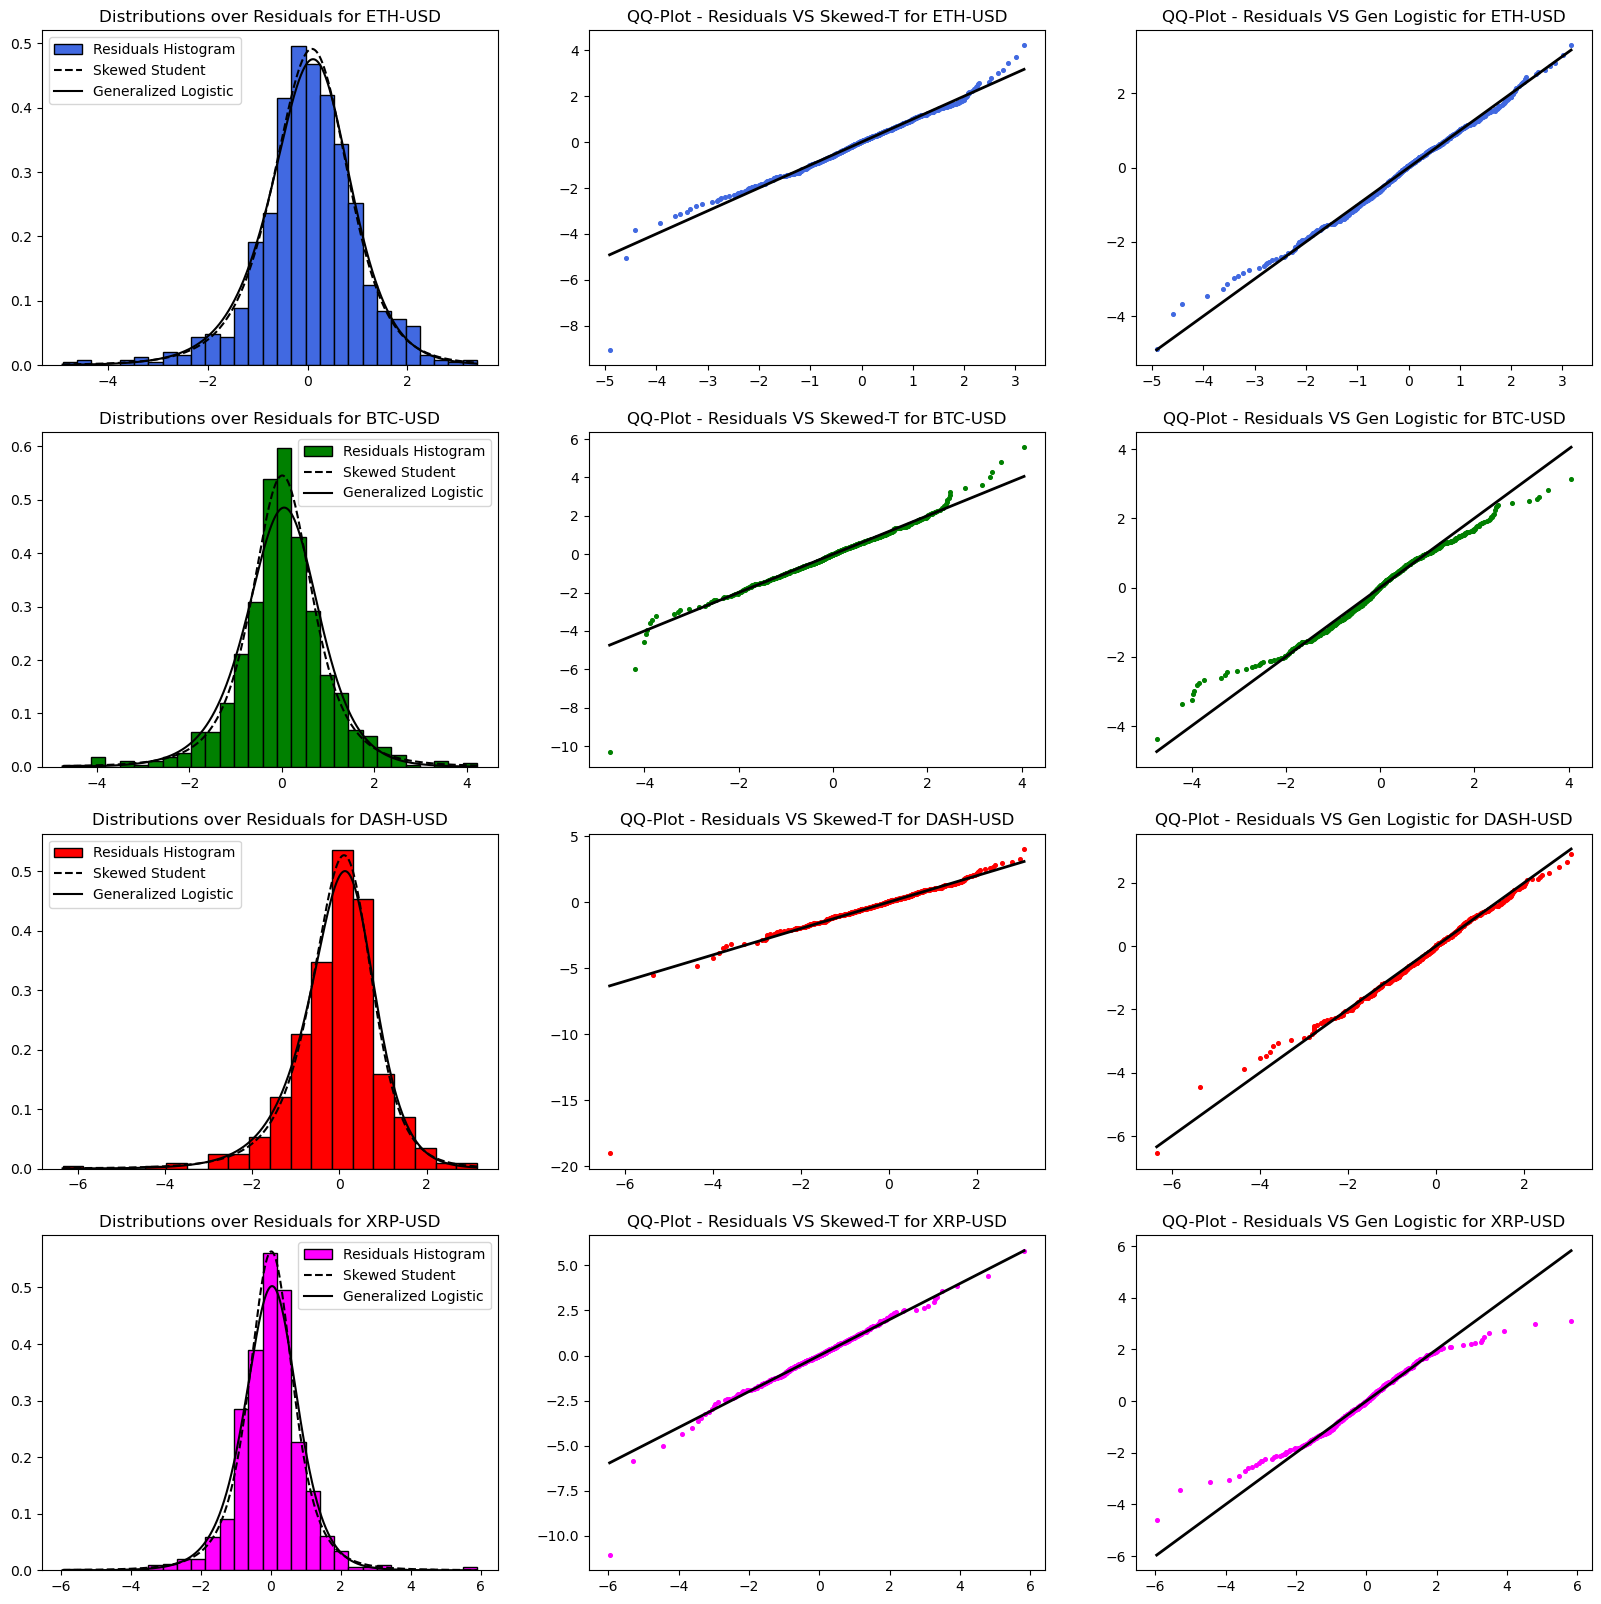

<Figure size 640x480 with 0 Axes>

In [53]:
r(f'set.seed({NP_RANDOM_SEED})')

X_STEP = 0.001

r['source']('./R/R_Skewt.R')
r['source']('./R/R_Glogis.R')

skewtDist_R = robjects.globalenv['skewt_dist']
skewGen_R = robjects.globalenv['skewt_gen']

genlogisticDist_R = robjects.globalenv['genlogistic_dist']
genlogisticGen_R = robjects.globalenv['genlogistic_gen']

figure, axs = plt.subplots(nrows = 4, ncols = 3, figsize = (20, 20))

axsIndex = 0
for crypto in cryptoList :
    ax = axs[axsIndex][0]
    
    resid = residualsDict[crypto]["Resid"]
    resid.hist(ax = ax, bins = int(np.sqrt(resid.shape[0])), density = True, color = colors[axsIndex], grid = False, edgecolor = "black", label = "Residuals Histogram")
    hist, binEdges = np.histogram(a = resid, bins = int(np.sqrt(resid.shape[0])))
    firstPoint, lastPoint = binEdges[0], binEdges[binEdges.shape[0] - 1]

    ## Skewed Student
    location = skewedStudentParamsDict[crypto][0]
    scale = skewedStudentParamsDict[crypto][1]
    gamma = skewedStudentParamsDict[crypto][2]
    df = skewedStudentParamsDict[crypto][3]
    skewtPoints = skewtDist_R(np.arange(firstPoint, lastPoint, X_STEP), location, scale, gamma, df)
    ax.plot(np.arange(firstPoint, lastPoint, X_STEP), skewtPoints, color = "black", linestyle = "--", label = "Skewed Student")
    
    ## GenLogistic
    location = genLogisticParamsDict[crypto][0]
    scale = genLogisticParamsDict[crypto][1]
    shape = genLogisticParamsDict[crypto][2]
    genlogisticPoints = genlogisticDist_R(np.arange(firstPoint, lastPoint, X_STEP), location, scale, shape)
    ax.plot(np.arange(firstPoint, lastPoint, X_STEP), genlogisticPoints, color = "black", linestyle = "-", label = "Generalized Logistic")

    ax.legend()
    ax.set_title("Distributions over Residuals for " + crypto)

    axsIndex += 1

axsIndex = 0
RANDOM_POINTS_NUM = 5_000
for crypto in cryptoList :
    skewedAx = axs[axsIndex][1]

    resid = residualsDict[crypto]["Resid"]
    residualsQuant = np.quantile(resid, np.arange(0, 1, X_STEP))

    ## Skewed Student
    location = skewedStudentParamsDict[crypto][0]
    scale = skewedStudentParamsDict[crypto][1]
    gamma = skewedStudentParamsDict[crypto][2]
    df = skewedStudentParamsDict[crypto][3]

    skewedtQuant = np.quantile(skewGen_R(RANDOM_POINTS_NUM, location, scale, gamma, df), np.arange(0, 1, X_STEP))
    
    #skewedAx.scatter(x = np.arange(0, residualsQuant.shape[0], 1), y = residualsQuant, sizes = [10], color = colors[axsIndex], label = "Residuals")
    #skewedAx.plot(skewedtQuant, color = "black", label = "Skewed T")

    x = np.arange(residualsQuant.min(), residualsQuant.max(), X_STEP)
    y = x

    skewedAx.scatter(x = residualsQuant, y = skewedtQuant, sizes = [7], color = colors[axsIndex])
    skewedAx.plot(x, y, color = "black", linewidth = 2)

    #skewedAx.legend()
    skewedAx.set_title("QQ-Plot - Residuals VS Skewed-T for " + crypto)

    ## GenLog
    genLogAx = axs[axsIndex][2]

    location = genLogisticParamsDict[crypto][0]
    scale = genLogisticParamsDict[crypto][1]
    shape = genLogisticParamsDict[crypto][2]

    genLogQuant = np.quantile(genlogisticGen_R(RANDOM_POINTS_NUM, location, scale, shape), np.arange(0, 1, X_STEP))

    # genLogAx.scatter(x = np.arange(0, residualsQuant.shape[0], 1), y = residualsQuant, sizes = [7.5], color = colors[axsIndex], label = "Residuals")
    # genLogAx.plot(genLogQuant, color = "black", label = "Generalized Logistic")

    genLogAx.scatter(x = residualsQuant, y = genLogQuant, sizes = [7], color = colors[axsIndex])
    genLogAx.plot(x, y, color = "black", linewidth = 2,)

    #genLogAx.legend()
    genLogAx.set_title("QQ-Plot - Residuals VS Gen Logistic for " + crypto)

    axsIndex += 1
    
plt.show()
plt.clf()

Procediamo quindi a selezionare la distribuzione che restituisce il valore massimo di *Log-Likelihood*".

In [54]:
bestDistrTable = buildTable("Best Guessed Distribution for crypto", ["Crypto", "Skewed Student Log-Likelihood", "Generalized Logistic Log-Likelihood", "Chosen Distribution"], ["left", "right", "right", "right"])
for crypto in cryptoList:
    maxLikelihoodIndex = np.argmax(a = np.array([skewedStudentParamsDict[crypto][4], genLogisticParamsDict[crypto][3]]))
    if maxLikelihoodIndex == 0 :
        chosenDist = "Skewed Student"
    elif maxLikelihoodIndex == 1 :
        chosenDist = "Generalized Logistic"

    bestDistrTable.add_row(crypto, str(skewedStudentParamsDict[crypto][4]), str(genLogisticParamsDict[crypto][3]), chosenDist)
        
Console().print(bestDistrTable)

                                  Best Guessed Distribution for crypto                                  
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ Crypto   ┃ Skewed Student Log-Likelihood ┃ Generalized Logistic Log-Likelihood ┃ Chosen Distribution ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ ETH-USD  │           -1204.1528851052553 │                 -1205.3666488127258 │      Skewed Student │
│ BTC-USD  │           -1203.4957732999053 │                  -1214.435506980533 │      Skewed Student │
│ DASH-USD │            -585.7144012540351 │                  -587.6248517903006 │      Skewed Student │
│ XRP-USD  │           -1103.9276325024002 │                 -1121.7298065866314 │      Skewed Student │
└──────────┴───────────────────────────────┴─────────────────────────────────────┴─────────────────────┘

La skewed student si rivela essere la distribuzione che in tutti i casi cattura meglio il comportamento dei residui del modello GARCH.  
Questo significa che, essendo una Student, gli eventi rari sono più frequenti rispetto a quanto non lo siano invece in una Normale.

In [55]:
gammaTable = buildTable("Gamma for Skewed Student", ["Crypto", "Gamma"], ["left", "right"])
for crypto in cryptoList :
    gammaTable.add_row(crypto, str(skewedStudentParamsDict[crypto][2]))

Console().print(gammaTable)

     Gamma for Skewed Student     
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃ Crypto   ┃               Gamma ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ ETH-USD  │ -0.3228989079727239 │
│ BTC-USD  │ 0.01147859718582429 │
│ DASH-USD │ -0.6704196131287173 │
│ XRP-USD  │ -0.1087986200691051 │
└──────────┴─────────────────────┘

Come si vede dai valori, il gamma risulta negativo per tutte le crypto ad eccezione di *Bitcoin*.  
La negatività di questo parametro implica che gli eventi "negativi" siano più frequenti di quelli positivi e che quindi gli investitori reagiscano peggio ad eventi negativi piuttosto che meglio ad eventi positivi (e viceversa).

Per quanto riguarda *BTC-USD* possiamo notare come il valore sia molto piccolo (oltre che positivo): notando che $0$ è incluso nell'intervallo di confidenza al $95\%$ possiamo anche supporre che questo valore sia nullo e che quindi i residui nella realtà seguano una Student-T non Skewed

#### 6.2.2] Generazione delle bande di predizione

Procediamo, dopo aver calcolato la miglior distribuzione per i residui, al calcolo di traiettorie come nell'approccio non parametrico.  
A differenza del caso precedente, non facciamo delle estrazioni con reinserimento dall'insieme dei residui, ma generiamo dei valori partendo dalla distribuzione stimata.

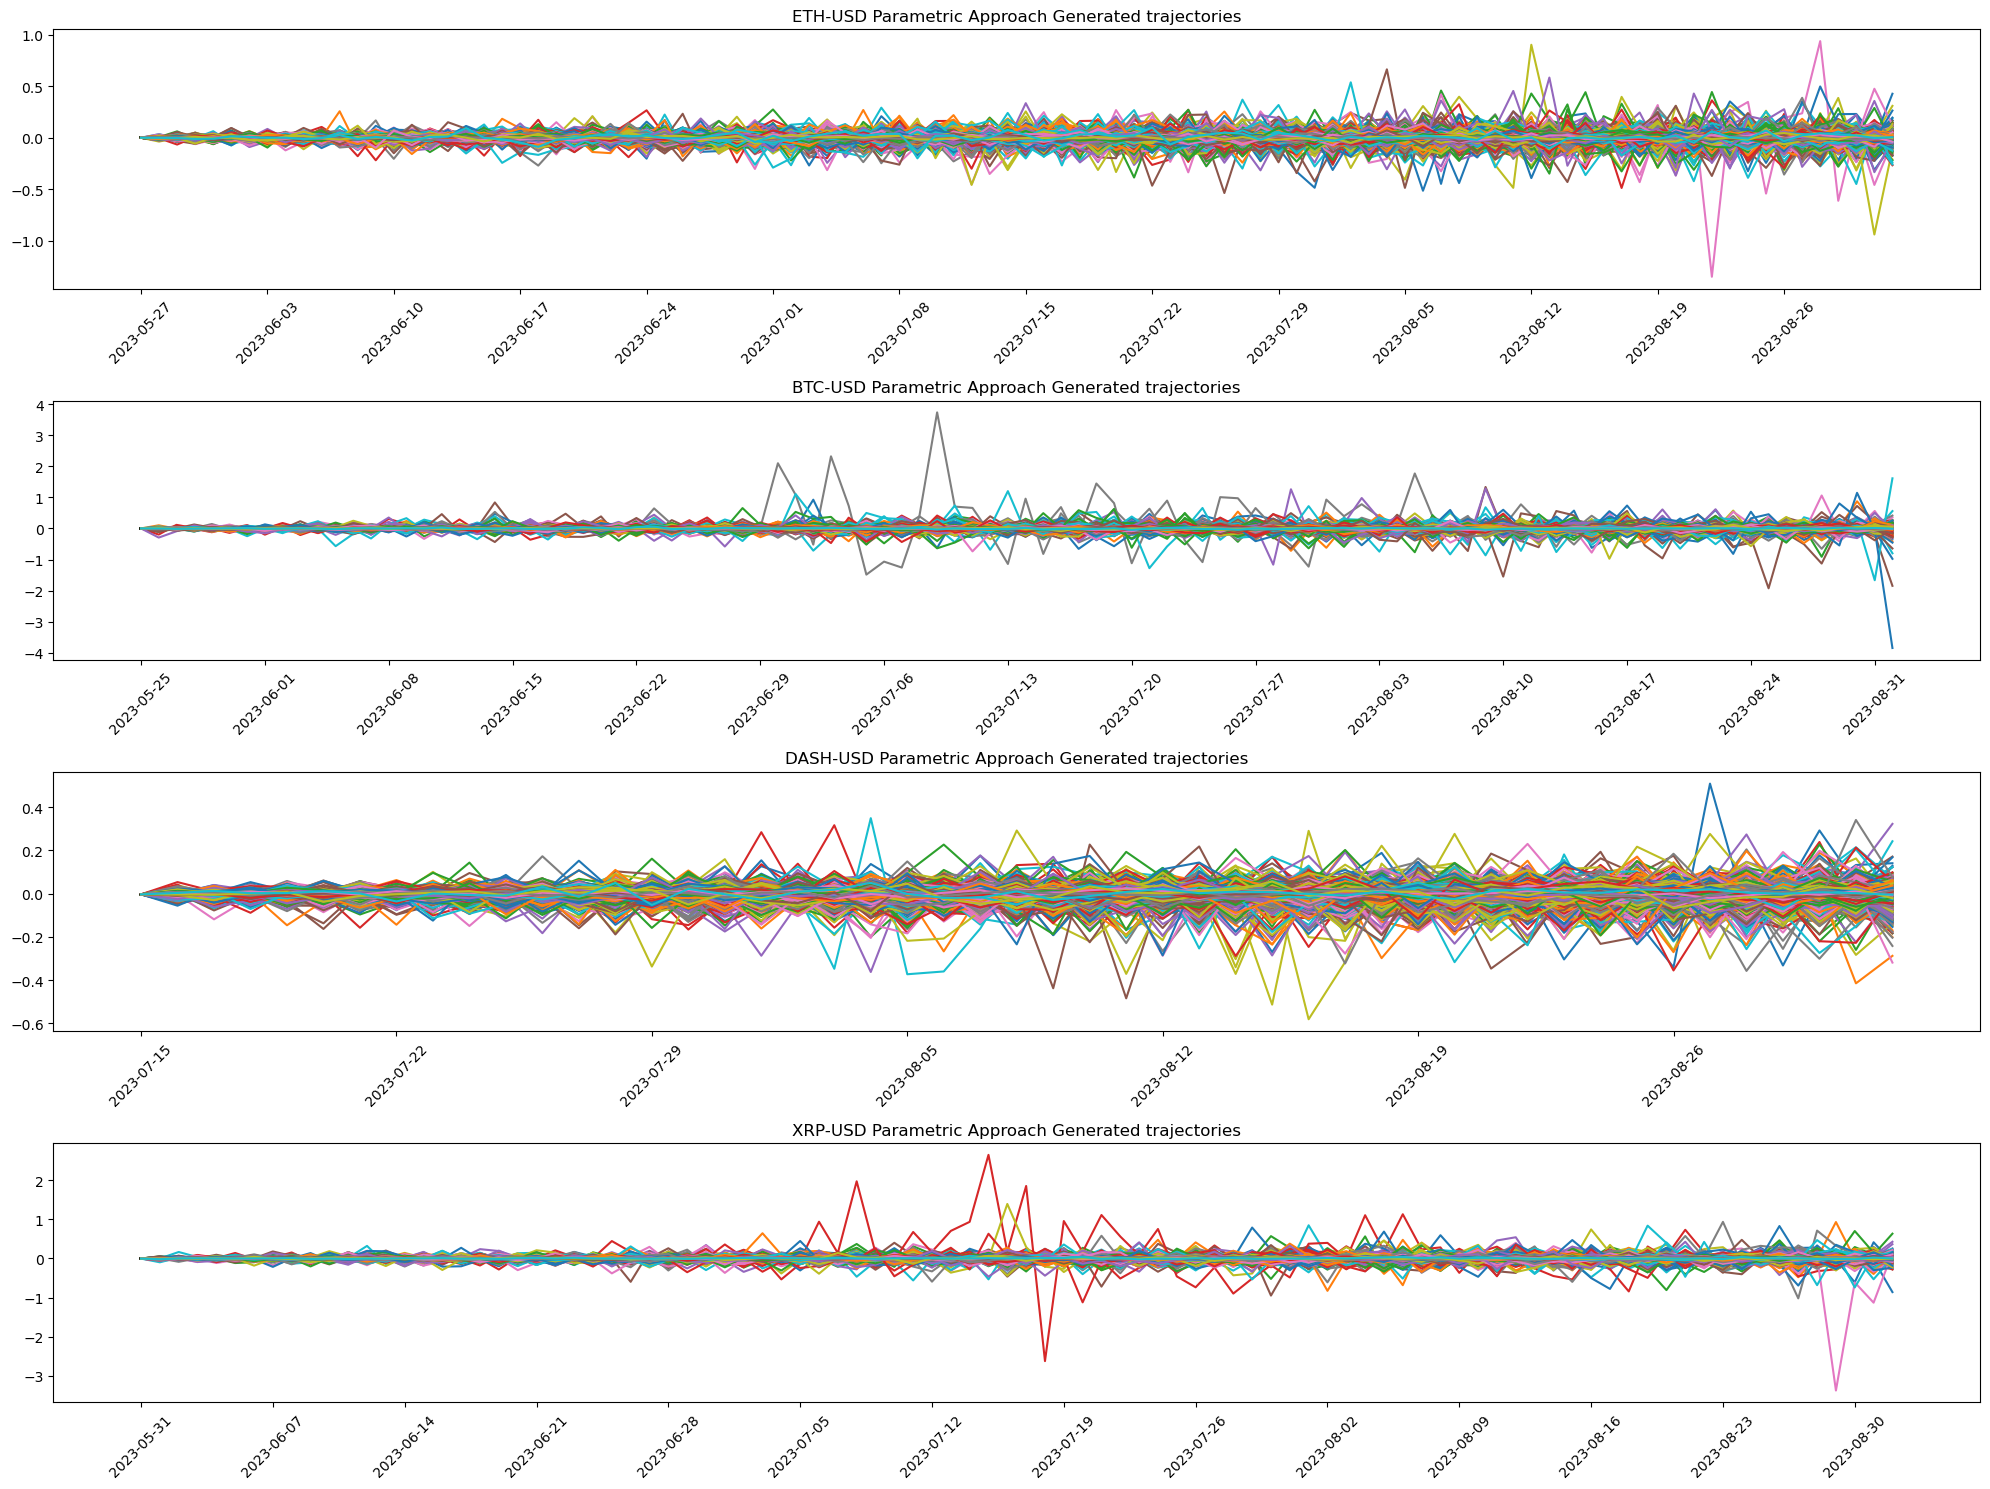

<Figure size 640x480 with 0 Axes>

In [56]:
r(f'set.seed({NP_RANDOM_SEED})')

r['source']('./R/R_Skewt.R')
r['source']('./R/R_Glogis.R')

skewtGen_R = robjects.globalenv['skewt_gen']
genlogisticGen_R = robjects.globalenv['genlogistic_gen']

NUM_SAMPLES = 10000
fig, axs = plt.subplots(nrows = len(cryptoList), ncols = 1, figsize=(20,15))
axsIndex = 0
np.random.seed(NP_RANDOM_SEED)

paramTrajectoriesDict : dict[str, list[list]] = {}
for crypto in cryptoList:
    TRAINING_SET_LEN = trainCryptoDiffDict[crypto].shape[0]
    TESTING_SET_LEN = testCryptoDiffDict[crypto].shape[0]
    trajectories = []
    for _ in range(NUM_SAMPLES):
        computedXt = []

        if genLogisticParamsDict[crypto][3] < skewedStudentParamsDict[crypto][4]:
            location = skewedStudentParamsDict[crypto][0]
            scale = skewedStudentParamsDict[crypto][1]
            gamma = skewedStudentParamsDict[crypto][2]
            df = skewedStudentParamsDict[crypto][3]
            residuals = skewtGen_R(TESTING_SET_LEN, location, scale, gamma, df)

        else:
            location = genLogisticParamsDict[crypto][0]
            scale = genLogisticParamsDict[crypto][1]
            shape = genLogisticParamsDict[crypto][2]
            residuals = genlogisticGen_R(TESTING_SET_LEN, location , scale, shape)

        prev_Xt = trainCryptoDiffDict[crypto]["Diff"].iloc[TRAINING_SET_LEN-1]
        computedXt.append(prev_Xt)
        prev_var_t = sigma_0**2
        for i in range(TESTING_SET_LEN):
            var_t = alpha_0 + (alpha_1 * (prev_Xt**2)) + (beta_1 * prev_var_t)
            Xt = np.sqrt(var_t) * residuals[i]
            computedXt.append(Xt)
            prev_Xt = Xt
            prev_var_t = var_t
        trajectories.append(computedXt)
    paramTrajectoriesDict[crypto] = trajectories

    axs[axsIndex].set_title(crypto + " Parametric Approach Generated trajectories")
    for traj in trajectories:
        axs[axsIndex].plot(traj)

    xtickPoints = np.arange(start = 0, stop = testCryptoDiffDict[crypto].shape[0], step = STEP)
    xtickLabels = testCryptoDict[crypto]["Date"].iloc[xtickPoints]
    axs[axsIndex].set_xticks(xtickPoints)
    axs[axsIndex].set_xticklabels(xtickLabels, rotation = ROTATION)
    
    axsIndex += 1

fig.set_tight_layout(tight = True)

plt.show()
plt.clf()

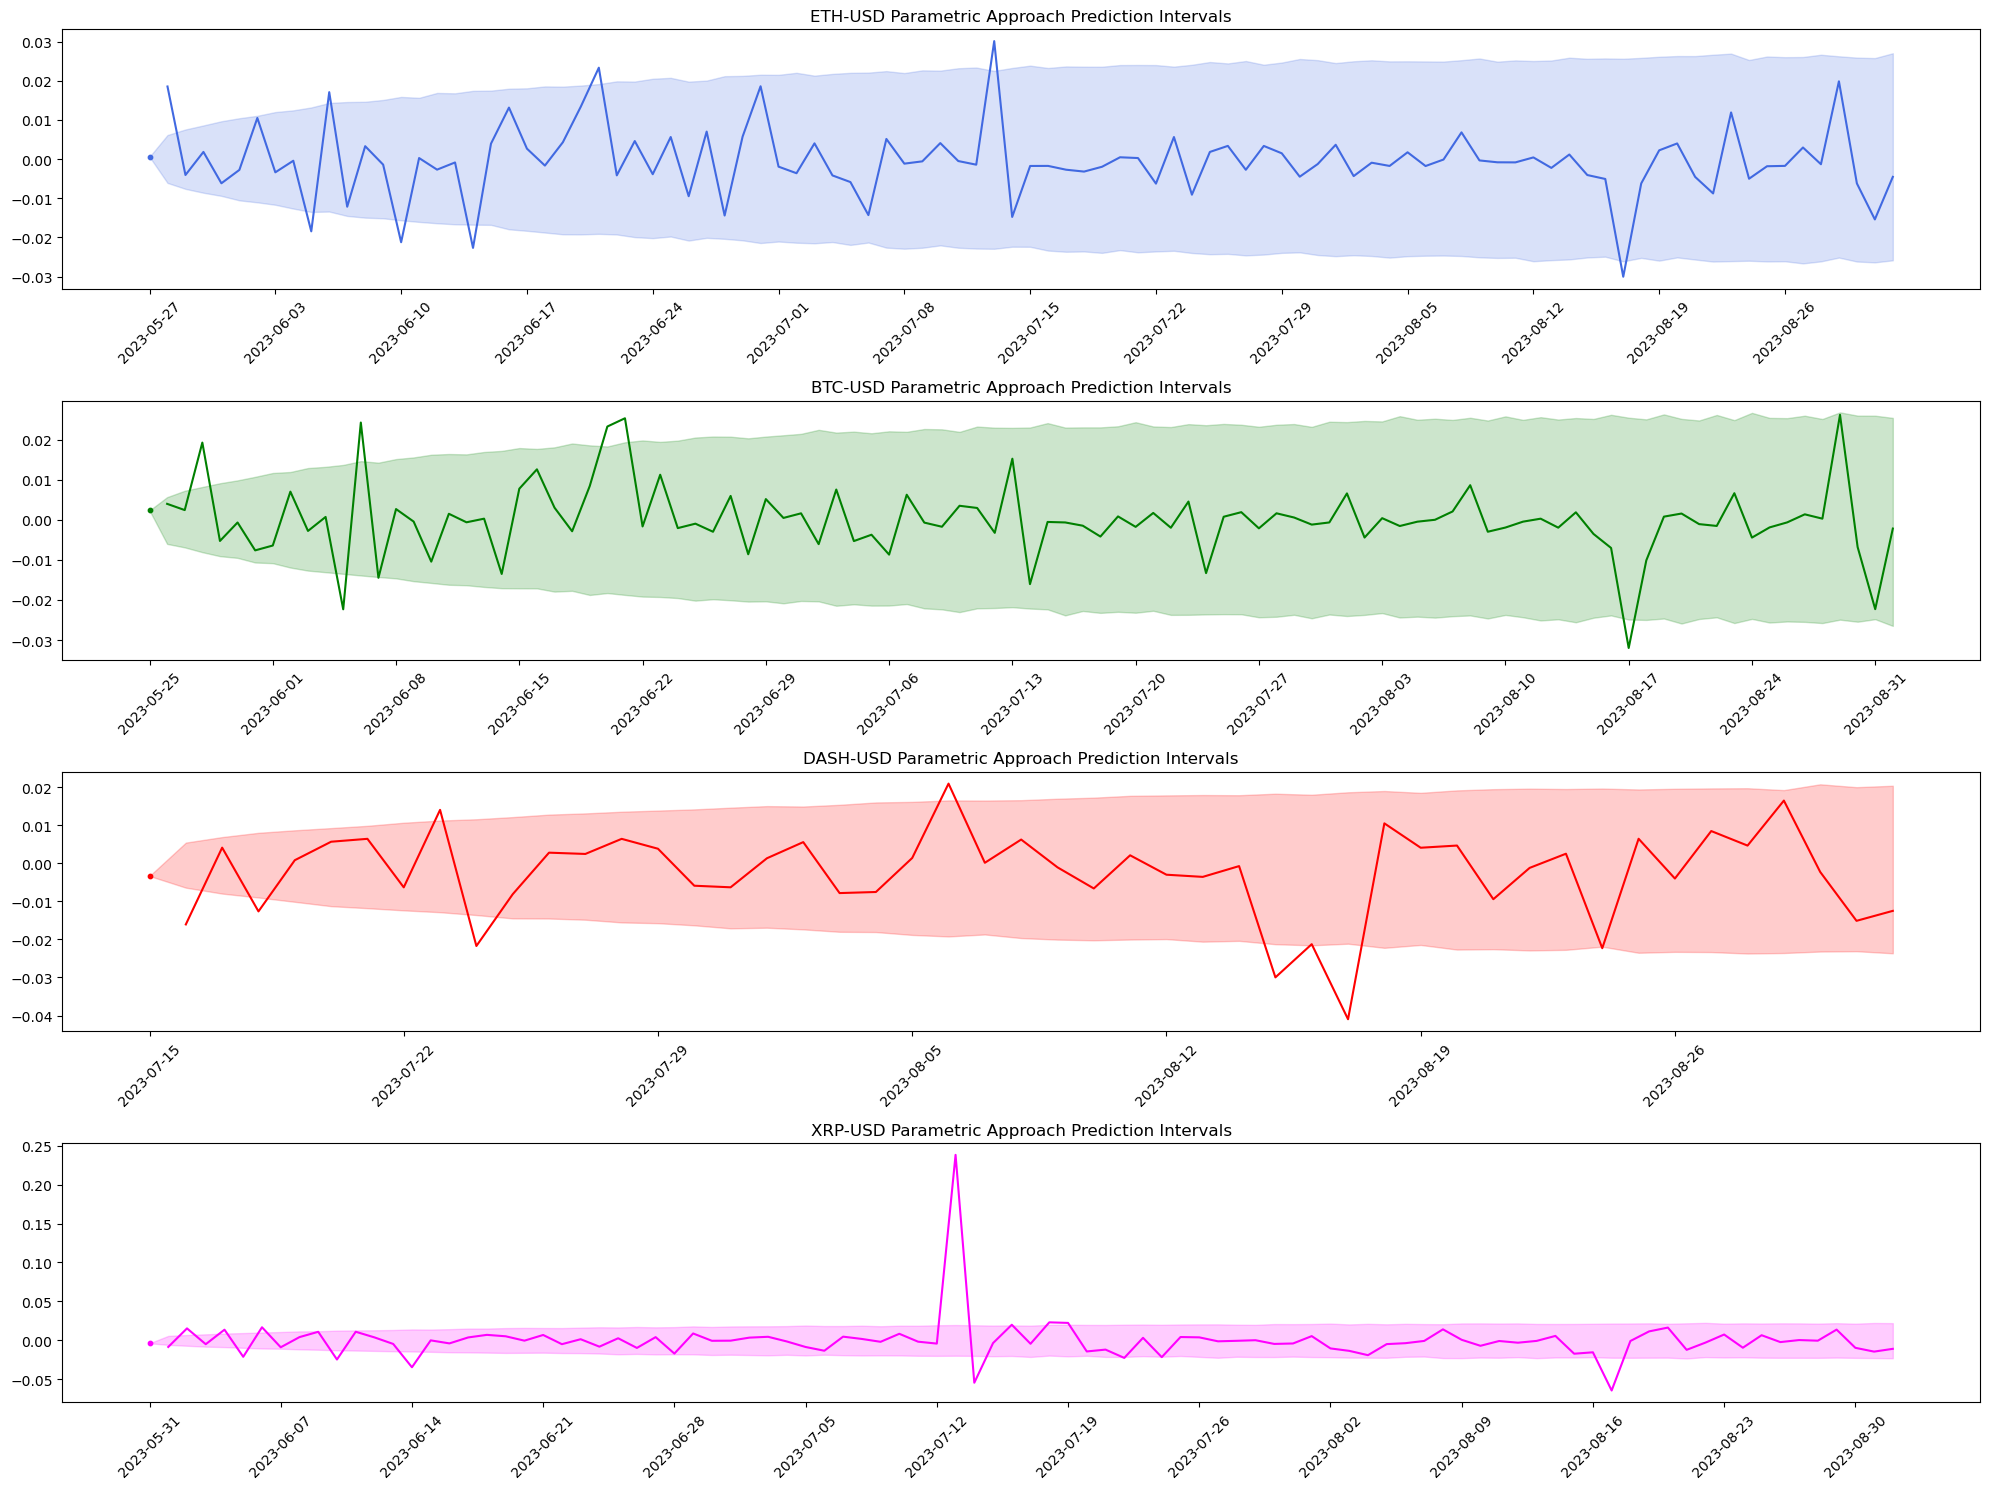

<Figure size 640x480 with 0 Axes>

In [57]:
fig, axs = plt.subplots(nrows = len(cryptoList), ncols = 1, figsize=(20,15))
axsIndex = 0
paramTrajQuantDict : dict[str,tuple[list,list]] = {}

for crypto in cryptoList:
    TRAINING_SET_LEN = trainCryptoDiffDict[crypto].shape[0]
    TESTING_SET_LEN = testCryptoDiffDict[crypto].shape[0]
    
    trajectories = paramTrajectoriesDict[crypto]
    trajectories = np.array(trajectories)
    trajectories = trajectories.T
    trajQuantList_25 = []
    trajQuantList_75 = []
    for i in range(trajectories.shape[0]):
        trajQuant_25 = np.quantile(a = trajectories[i], q = LOW_PERC)
        trajQuant_75 = np.quantile(a = trajectories[i], q = HIGH_PERC)
        trajQuantList_25.append(trajQuant_25)
        trajQuantList_75.append(trajQuant_75)
    paramTrajQuantDict[crypto] = (trajQuantList_25,trajQuantList_75)

    firstPoint = trainCryptoDiffDict[crypto]["Diff"].iloc[TRAINING_SET_LEN - 1]
    axs[axsIndex].plot(np.arange(1, TESTING_SET_LEN + 1, 1), testCryptoDiffDict[crypto]["Diff"], color = colors[axsIndex])
    axs[axsIndex].scatter(x = 0, y = firstPoint, color = colors[axsIndex], sizes = [10])
    axs[axsIndex].fill_between(x = np.arange(0, len(trajQuantList_25), 1), y1 = trajQuantList_25, y2 = trajQuantList_75, alpha = 0.20, color = colors[axsIndex])
    axs[axsIndex].set_title(crypto + " Parametric Approach Prediction Intervals")

    xtickPoints = np.arange(start = 0, stop = testCryptoDiffDict[crypto].shape[0], step = STEP)
    xtickLabels = testCryptoDict[crypto]["Date"].iloc[xtickPoints]
    axs[axsIndex].set_xticks(xtickPoints)
    axs[axsIndex].set_xticklabels(xtickLabels, rotation = ROTATION)
    
    axsIndex += 1

fig.set_tight_layout(tight = True)

plt.show()
plt.clf()

Calcoliamo anche in questo caso la percentuale di punti che ricade nelle bande di predizione generate.

In [58]:
inIntervalTable = buildTable("TestingSet captured by interval - Parametric Approach", ["Crypto", "% of Points"], ["left", "right"])

for crypto in cryptoList:
    inInterval = 0
    lowTraj = paramTrajQuantDict[crypto][0][1:]
    highTraj = paramTrajQuantDict[crypto][1][1:]
    TESTING_SET_LEN = testCryptoDiffDict[crypto].shape[0]
    for t in range(0, TESTING_SET_LEN):
        if lowTraj[t] <= testCryptoDiffDict[crypto]["Diff"][t] <= highTraj[t]:
            inInterval+=1
    inIntervalTable.add_row(crypto, str((inInterval/TESTING_SET_LEN) * 100))

console = Console()
console.print(inIntervalTable)

TestingSet captured by interval 
     - Parametric Approach      
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Crypto   ┃       % of Points ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ ETH-USD  │ 91.75257731958763 │
│ BTC-USD  │ 92.92929292929293 │
│ DASH-USD │ 83.33333333333334 │
│ XRP-USD  │ 83.87096774193549 │
└──────────┴───────────────────┘

#### 6.2.4] Metriche di Accuratezza

Per valutare il modello usato, consideriamo le seguenti metriche di accuratezza:
* Scale-Dependent Metrics <br>
    * $\LARGE \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $ <br>
    Indica l'errore medio assoluto tra le previsioni e i valori reali. Un valore basso è preferibile, poiché indica una buona adattabilità del modello ai dati. <br> <br>
    * $\LARGE \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $ <br>
    Misura la deviazione quadratica media tra le previsioni e i valori reali. Si eleva al quadrato gli errori, enfatizzando gli errori più grandi. È sensibile agli outlier. Un MSE più basso è migliore, indicando una migliore precisione.

* Scale Free Metrics <br>
    * $\LARGE \text{MASE} = \frac{MAE}{\frac{1}{m-1} \sum_{j=2}^{m} |y_j - y_{j-1}|} $ <br>
    Valuta la capacità predittiva del modello rispetto a un modello *naïve* dove le previsioni sono basate sul valore precedente. Un valore inferiore a 1 indica che il modello è migliore del modello *naïve*. <br> <br>
    * $\LARGE \text{RMSSE} = \sqrt{\frac{MSE}{\frac{1}{m-1} \sum_{j=2}^{m} (y_j - y_{j-1})^2}} $ <br>
    È una versione scalata di MSE, che considera anche il confronto con un modello di benchmark (ad esempio, il modello naïve). Un valore inferiore a 1 indica una migliore performance rispetto al modello di riferimento.


In [59]:
predictionsDict : dict[str, list[float]] = {}

for crypto in cryptoList:
    actualValues = testCryptoDiffDict[crypto]["Diff"].to_numpy()
    predictions = []
    trajectories = paramTrajectoriesDict[crypto]
    trajectories = np.array(trajectories)[:, 1:]
    trajectories = trajectories.T
    for i in range(trajectories.shape[0]):
        prediction_t = np.median(trajectories[i])
        predictions.append(prediction_t)
    
    predictionsDict[crypto] = np.array(predictions)

In [60]:
cryptoAccuracyMeasuresDict : dict[str, dict[str, float]] = {}
for crypto in cryptoList :
    cryptoAccuracyMeasuresDict[crypto] = {}

for crypto in cryptoList :
    actualValues = testCryptoDiffDict[crypto]["Diff"].to_numpy()
    predictions = predictionsDict[crypto]

    ## Scale-Dependent
    mae = np.mean(np.abs(actualValues - predictions))
    cryptoAccuracyMeasuresDict[crypto]["MAE"] = mae

    mse = np.mean((actualValues - predictions)**2)
    cryptoAccuracyMeasuresDict[crypto]["MSE"] = mse

    ## Scale Free Error
    mase = mae / np.mean(np.abs(trainCryptoDiffDict[crypto]["Diff"].pct_change()) * 100)
    cryptoAccuracyMeasuresDict[crypto]["MASE"] = mase
    
    rmsse = np.sqrt(mse / np.mean(((trainCryptoDiffDict[crypto]["Diff"].pct_change()) * 100)**2))
    cryptoAccuracyMeasuresDict[crypto]["RMSSE"] = rmsse


In [61]:
scaleDependentMetricsTable = buildTable("Scale dependent Metrics", ["Crypto", "MAE", "MSE"], ["left", "right","right"])
percentageErrorMetricsTable = buildTable("Percentage Error Metrics ", ["Crypto", "MAPE"], ["left", "right"])
relativeErrorMetricsTable = buildTable("Relative Error Metrics", ["Crypto", "SMAPE"], ["left", "right"])
scaleFreeErrorMetricsTable = buildTable("Scale Free Error Metrics", ["Crypto", "MASE", "RMSSE"], ["left", "right","right"])


for crypto in cryptoList :
    scaleDependentMetricsTable.add_row(
        crypto,
        str(cryptoAccuracyMeasuresDict[crypto]["MAE"]),
        str(cryptoAccuracyMeasuresDict[crypto]["MASE"])
    )
    scaleFreeErrorMetricsTable.add_row(
        crypto,
        str(cryptoAccuracyMeasuresDict[crypto]["MASE"]),
        str(cryptoAccuracyMeasuresDict[crypto]["RMSSE"])
    )
console = Console()
console.print(scaleDependentMetricsTable)


                  Scale dependent Metrics                   
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Crypto   ┃                  MAE ┃                    MSE ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ ETH-USD  │  0.00631040687818553 │ 1.1805823471175029e-05 │
│ BTC-USD  │ 0.005668715012765018 │ 1.1472455007084417e-05 │
│ DASH-USD │  0.00852420464572344 │  9.113228816304299e-06 │
│ XRP-USD  │ 0.011707208114645536 │ 1.7493349984090394e-05 │
└──────────┴──────────────────────┴────────────────────────┘

Per quanto riguarda le metriche $Scale$ $Dependent$ abbiamo un risultato piuttosto soddisfacente. In particolare su *MSE* abbiamo dei valori molto più piccoli di $1$ e questo può essere dovuto al fatto che nella scelta del valore predetto è stata considerata la mediana dei valori assunti dalle traiettorie generate, che ha eliminato gli outlier.

In [62]:
console.print(scaleFreeErrorMetricsTable)

                  Scale Free Error Metrics                   
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Crypto   ┃                   MASE ┃                 RMSSE ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩
│ ETH-USD  │ 1.1805823471175029e-05 │ 3.363031017370534e-06 │
│ BTC-USD  │ 1.1472455007084417e-05 │ 4.516776079722822e-06 │
│ DASH-USD │  9.113228816304299e-06 │ 2.049551620136622e-06 │
│ XRP-USD  │ 1.7493349984090394e-05 │  4.05952979224054e-06 │
└──────────┴────────────────────────┴───────────────────────┘

Passando alle metriche $Scale$ $Free$ $Error$ otteniamo per entrambe un valore molto inferiore ad $1$ confermando quindi che il modello è di gran lunga migliore del modello *naïve* dove le previsioni sono basate sul valore precedente.

### 6.3] Approccio Parametrico VS Approccio Non Parametrico

Confrontiamo per concludere i due approcci.

In [63]:
inIntervalTable = buildTable("TestingSet captured by interval - Comparison", ["Crypto", "% of Points - Param", "% of Points - Non Param"], ["left", "right", "right"])

for crypto in cryptoList:
    TESTING_SET_LEN = testCryptoDiffDict[crypto].shape[0]
    paramInInterval = 0
    nonParamInInterval = 0
    lowTraj = paramTrajQuantDict[crypto][0][1:]
    highTraj = paramTrajQuantDict[crypto][1][1:]
    
    for t in range(0, TESTING_SET_LEN):
        if lowTraj[t] <= testCryptoDiffDict[crypto]["Diff"][t] <= highTraj[t]:
            paramInInterval+=1
    
    lowTraj = trajQuantDict[crypto][0][1:]
    highTraj = trajQuantDict[crypto][1][1:]
    for t in range(0, TESTING_SET_LEN):
        if lowTraj[t] <= testCryptoDiffDict[crypto]["Diff"][t] <= highTraj[t]:
            nonParamInInterval+=1
    inIntervalTable.add_row(crypto, str((paramInInterval/TESTING_SET_LEN) * 100), str((nonParamInInterval/TESTING_SET_LEN) * 100))

console = Console()
console.print(inIntervalTable)

        TestingSet captured by interval - Comparison        
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Crypto   ┃ % of Points - Param ┃ % of Points - Non Param ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ ETH-USD  │   91.75257731958763 │       88.65979381443299 │
│ BTC-USD  │   92.92929292929293 │       83.83838383838383 │
│ DASH-USD │   83.33333333333334 │       89.58333333333334 │
│ XRP-USD  │   83.87096774193549 │       83.87096774193549 │
└──────────┴─────────────────────┴─────────────────────────┘

Come si vede l'approccio parametrico migliora di molto il numero di punti del testing set catturati dalle bande di predizione per *ETH* e *BTC*, mentre rimane uguale per *XRP* e addirittura peggiora per *DASH*, indice del fatto che per queste due crypto la distribuzione dei residui potrebbe essere diversa.

## 7] Analisi ETH-USD con ARIMA-GARCH

Notiamo che per la cryptovaluta *ETH-USD*, secondo il test di Ljiung-Box, è presente autocorrelazione nel differencing. Possiamo procedere in questo caso ad un'analisi con modello ARIMA-GARCH.

Cerchiamo i parametri (p,q) migliori per il modello ARIMA; in particolare li cerchiamo nell'intervallo:
* $p \in [0,7]$
* $q \in [0,7]$

In [64]:
logLike = 0
bestARIMAModel : ARIMAResults = None
best_p = 0
best_q = 0
for p in range(0, 8) :
    for q in range(0, 8) :
        fittedModel = ARIMA(trainCryptoDiffDict["ETH-USD"]["Diff"], order = (p,0,q)).fit()
        if logLike < fittedModel.llf :
            logLike = fittedModel.llf
            bestARIMAModel = fittedModel
            best_p = p
            best_q = q

bestARIMAModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Diff   No. Observations:                  875
Model:                 ARIMA(7, 0, 5)   Log Likelihood                2154.974
Date:                Wed, 20 Dec 2023   AIC                          -4281.949
Time:                        17:11:03   BIC                          -4215.110
Sample:                             0   HQIC                         -4256.381
                                - 875                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.001      0.534      0.593      -0.001       0.002
ar.L1          0.1985      0.709      0.280      0.780      -1.191       1.588
ar.L2         -0.8322      0.442     -1.882      0.060      -1.699       0.034
ar.L3          0.2975      0.855      0.348      0.728      -1.377       1.972
ar.L4         -0.2060      0.325     -0.635      0.526      -0.842       0.430
ar.L5         -0.1387      0.347     -0.399      0.690      -0.820       0.542
ar.L6          0.0930      0.037      2.512      0.012       0.020       0.166
ar.L7         -0.0734      0.068     -1.075      0.282      -0.207       0.060
ma.L1         -0.2441      0.709     -0.344      0.731      -1.634       1.146
ma.L2          0.8748      0.424      2.062      0.039       0.043       1.706
ma.L3         -0.3215      0.870     -0.370      0.712      -2.026       1.383
ma.L4          0.2708      0.318      0.851      0.395      -0.353       0.895
ma.L5          0.0834      0.372      0.224      0.823      -0.646       0.813
sigma2         0.0004   1.36e-05     31.330      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               545.04
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.38   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Vediamo il comportamento dei residui del modello ARIMA, cercando:
* Stazionarietà (*KPSS*, *ADF*)
* Autocorrelazione (*Ljung-Box*)
* Eteroschedasticità(*Breusch-Pagan*, *White*)

In [65]:
kpss_test({"ETH-USD" : pd.DataFrame(data = {"Resid" : fittedModel.resid})}, colName = "Resid", cryptoList=["ETH-USD"])
adf_test({"ETH-USD" : pd.DataFrame(data = {"Resid" : fittedModel.resid})}, colName = "Resid", cryptoList=["ETH-USD"])

ljung_box_test({"ETH-USD" : pd.DataFrame(data = {"Resid" : fittedModel.resid})}, colName = "Resid", cryptoList=["ETH-USD"])

breusch_pagan_test({"ETH-USD" : pd.DataFrame(data = {"Resid" : fittedModel.resid})}, colName = "Resid", cryptoList=["ETH-USD"])
white_test({"ETH-USD" : pd.DataFrame(data = {"Resid" : fittedModel.resid})}, colName = "Resid", cryptoList=["ETH-USD"])

                        KPSS                        
┏━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓
┃ Crypto  ┃           StatValue ┃ pValue ┃ Outcome ┃
┡━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD │ 0.27513424536569653 │    0.1 │ Accept  │
└─────────┴─────────────────────┴────────┴─────────┘

                        ADF                        
┏━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓
┃ Crypto  ┃          StatValue ┃ pValue ┃ Outcome ┃
┡━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD │ -29.92968714547965 │    0.0 │ Reject  │
└─────────┴────────────────────┴────────┴─────────┘

                          Ljung-Box                           
┏━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto  ┃         StatValue ┃             pValue ┃ Outcome ┃
┡━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD │ 5.245167337174701 │ 0.8742103281143567 │ Accept  │
└─────────┴───────────────────┴────────────────────┴─────────┘

                          Breusch-Pagan                           
┏━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto  ┃          StatValue ┃                pValue ┃ Outcome ┃
┡━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD │ 24.338153488367745 │ 9.676907223507973e-07 │ Reject  │
└─────────┴────────────────────┴───────────────────────┴─────────┘

                              White                               
┏━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto  ┃         StatValue ┃                 pValue ┃ Outcome ┃
┡━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD │ 12.59208126626427 │ 4.0626595216713415e-06 │ Reject  │
└─────────┴───────────────────┴────────────────────────┴─────────┘

Notiamo che i residui del modello ARIMA sono stazionari e scorrelati, ma presentano eteroschedasticità: possiamo passare i residui al modello GARCH(1,1) per cercare di rimuovere questa componente. 

In [66]:
%%capture
garchFitted = arch_model(bestARIMAModel.resid).fit(disp = False)

garchResidualsFun_R = robjects.globalenv['garchResiduals']
garchResiduals = pd.Series(garchResidualsFun_R(bestARIMAModel.resid)).dropna()

In [67]:
kpss_test({"ETH-USD" : pd.DataFrame(data = {"Resid" : garchResiduals})}, colName = "Resid", cryptoList=["ETH-USD"])
adf_test({"ETH-USD" : pd.DataFrame(data = {"Resid" : garchResiduals})}, colName = "Resid", cryptoList=["ETH-USD"])

ljung_box_test({"ETH-USD" : pd.DataFrame(data = {"Resid" : garchResiduals})}, colName = "Resid", cryptoList=["ETH-USD"])

breusch_pagan_test({"ETH-USD" : pd.DataFrame(data = {"Resid" : garchResiduals})}, colName = "Resid", cryptoList=["ETH-USD"])
white_test({"ETH-USD" : pd.DataFrame(data = {"Resid" : garchResiduals})}, colName = "Resid", cryptoList=["ETH-USD"])

                        KPSS                        
┏━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓
┃ Crypto  ┃           StatValue ┃ pValue ┃ Outcome ┃
┡━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD │ 0.19959129371118908 │    0.1 │ Accept  │
└─────────┴─────────────────────┴────────┴─────────┘

                        ADF                        
┏━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓
┃ Crypto  ┃          StatValue ┃ pValue ┃ Outcome ┃
┡━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD │ -28.56531398784409 │    0.0 │ Reject  │
└─────────┴────────────────────┴────────┴─────────┘

                          Ljung-Box                           
┏━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto  ┃         StatValue ┃             pValue ┃ Outcome ┃
┡━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD │ 4.265337753763579 │ 0.9345842639932007 │ Accept  │
└─────────┴───────────────────┴────────────────────┴─────────┘

                         Breusch-Pagan                          
┏━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto  ┃          StatValue ┃              pValue ┃ Outcome ┃
┡━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD │ 3.2869408579080446 │ 0.07017674401227583 │ Accept  │
└─────────┴────────────────────┴─────────────────────┴─────────┘

                             White                              
┏━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Crypto  ┃          StatValue ┃              pValue ┃ Outcome ┃
┡━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ ETH-USD │ 2.4179310888052066 │ 0.08970367360378642 │ Accept  │
└─────────┴────────────────────┴─────────────────────┴─────────┘

Passare per un modello GARCH permette di rimuovere l'eteroschedasticità dei residui, quindi la coppia dei modelli si rivela essere un buon mezzo per modellare il comportamento della serie.

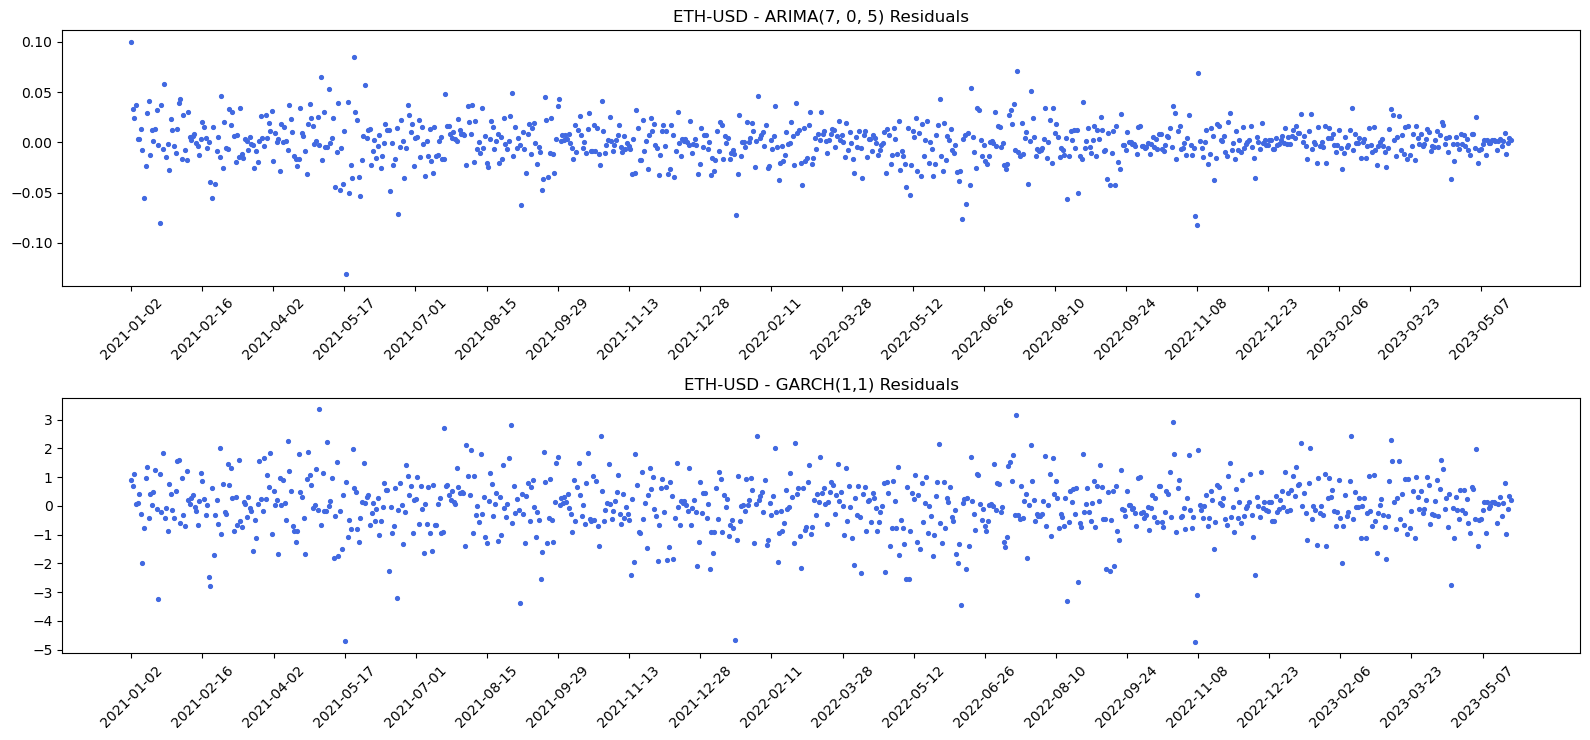

<Figure size 1600x500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [68]:
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (16, 7.5))
plt.figure(figsize = (16,5))
axs[0].scatter(x = np.arange(0, len(bestARIMAModel.resid)), y = bestARIMAModel.resid, sizes = [7.5], color = colors[0])
axs[0].set_title(f"ETH-USD - ARIMA({best_p}, 0, {best_q}) Residuals")
axs[1].scatter(x = np.arange(0, len(garchResiduals)), y = garchResiduals, sizes = [7.5], color = colors[0])
axs[1].set_title("ETH-USD - GARCH(1,1) Residuals")

STEP = 45
xtickPoints = np.arange(start = 0, stop = trainCryptoDict["ETH-USD"].shape[0], step = STEP)
xtickLabels = trainCryptoDict["ETH-USD"]["Date"].iloc[xtickPoints]
axs[0].set_xticks(xtickPoints)
axs[0].set_xticklabels(xtickLabels, rotation = ROTATION)

axs[1].set_xticks(xtickPoints)
axs[1].set_xticklabels(xtickLabels, rotation = ROTATION)

fig.set_tight_layout(True)

plt.show()
plt.clf()

In [69]:
NUM_SAMPLES = 10_000

mu = bestARIMAModel.params[0]
a_array = np.array(bestARIMAModel.params[1 : best_p + 1])
b_array = np.array(bestARIMAModel.params[best_p + 1 : 1 + best_p + best_q])

alpha_0 = garchFitted.params["omega"]
alpha_1 = garchFitted.params["alpha[1]"]
beta_1 = garchFitted.params["beta[1]"]

TRAINING_SET_LEN = trainCryptoDiffDict["ETH-USD"]["Diff"].shape[0]
TESTING_SET_LEN = testCryptoDiffDict["ETH-USD"]["Diff"].shape[0]

arimaResid = bestARIMAModel.resid.dropna()

trajectories = []
garchResiduals = pd.Series(data = garchResiduals).dropna()
for _ in range(NUM_SAMPLES):
    garchResidSamples = np.random.choice(a = garchResiduals, size = TESTING_SET_LEN, replace = True)
    sigma_0 = arimaResid[len(arimaResid) - 1]
    prevError = arimaResid[len(arimaResid) - 1]

    computedErrorARIMA = []
    computedErrorARIMA.append(prevError)
    prev_var_t = sigma_0**2
    for i in range(0, TESTING_SET_LEN) :
        var_t = alpha_0 + (alpha_1 * (prevError**2)) + (beta_1 * prev_var_t)
        error = np.sqrt(var_t) * garchResidSamples[i]
        computedErrorARIMA.append(error)
        prevError = error
        prev_var_t = var_t
    

    computedTraj = []
    prevXArray = trainCryptoDiffDict["ETH-USD"]["Diff"][-best_p:].to_list()
    prevErrorArray = arimaResid[-best_q:].to_list()
    prevXArray.reverse()
    prevErrorArray.reverse()
    for i in range(0, TESTING_SET_LEN) :
        computedXt = mu + np.dot(a_array, np.array(prevXArray)) + np.dot(b_array, np.array(prevErrorArray)) + computedErrorARIMA[i]
        computedTraj.append(computedXt)

        prevXArray.insert(0, computedXt)
        prevXArray = prevXArray[ : -1]
        prevErrorArray.insert(0, computedErrorARIMA[i])
        prevErrorArray = prevErrorArray[ : -1]

    trajectories.append(computedTraj)


Passiamo alla generazione di una banda di predizione con la tecnica di bootstrap.
Procediamo nello stesso modo che con il GARCH(1,1) precedente, ma in questo caso i valori stimati dal GARCH sono usati come termine di errore nel modello ARIMA. In particolare abbiamo i seguenti passi
1. Fit del modello *ARIMA(p,q)* sul TrainingSet
1. Fit del modello *GARCH(1,1)* sui residui del modello ARIMA
3. Tecnica di Bootstrap:
    - Estrazione di *TESTING_SET_LEN* samples con rimpiazzamento dai residui del modello GARCH
    - Generazione di *10000 traiettorie*:
        - GARCH(1,1)
            <br> $\sigma^2_t = \alpha_0 + \alpha_1 \epsilon_{t-1}^2 + \beta_1 \sigma_{t-1}^2$
            <br> $\epsilon_t = \sigma_t W_t$
        - ARIMA(p,q)
            <br> $X_t = \mu + \sum_{i = 1}^{p} a_i X_{t-i} + \sum_{j = 1}^{q} b_i \epsilon_{t-i} + \epsilon_t$
4. Estrazione delle traiettorie per le bande di predizione di ampiezza $80\%$

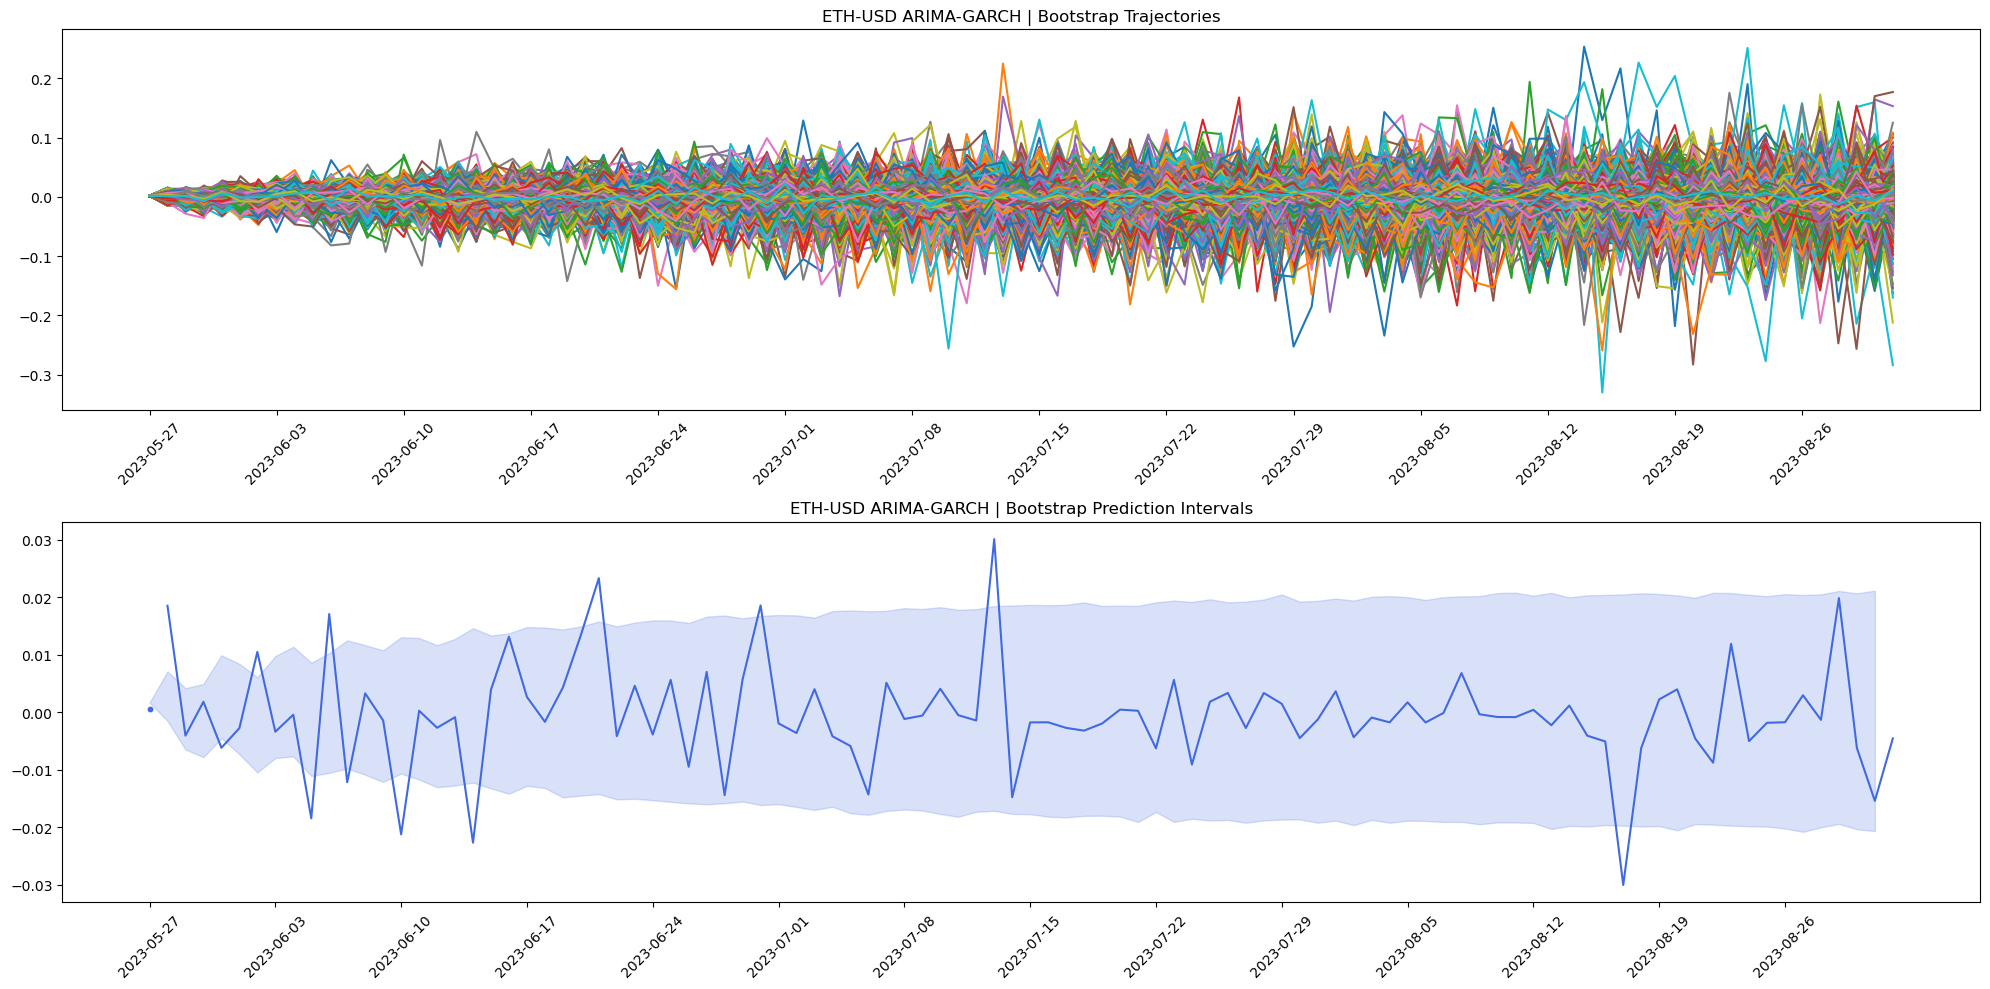

<Figure size 640x480 with 0 Axes>

In [70]:
STEP = 7

fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize=(20,10))

TRAINING_SET_LEN = trainCryptoDiffDict["ETH-USD"].shape[0]
TESTING_SET_LEN = testCryptoDiffDict["ETH-USD"].shape[0]

trajectories = np.array(trajectories)
trajectories = trajectories.T
trajQuantList_25 = []
trajQuantList_75 = []
for i in range(trajectories.shape[0]):
    trajQuant_25 = np.quantile(a = trajectories[i], q = LOW_PERC)
    trajQuant_75 = np.quantile(a = trajectories[i], q = HIGH_PERC)
    trajQuantList_25.append(trajQuant_25)
    trajQuantList_75.append(trajQuant_75)

firstPoint = trainCryptoDiffDict["ETH-USD"]["Diff"].iloc[TRAINING_SET_LEN - 1]
axs[1].plot(np.arange(1, TESTING_SET_LEN + 1, 1), testCryptoDiffDict["ETH-USD"]["Diff"], color = colors[0])
axs[1].scatter(x = 0, y = firstPoint, color = colors[0], sizes = [10])
axs[1].fill_between(x = np.arange(0, len(trajQuantList_25), 1), y1 = trajQuantList_25, y2 = trajQuantList_75, alpha = 0.20, color = colors[0])
axs[1].set_title("ETH-USD ARIMA-GARCH | Bootstrap Prediction Intervals")

axs[0].set_title("ETH-USD ARIMA-GARCH | Bootstrap Trajectories")
for traj in trajectories.T :
    axs[0].plot(traj)



xtickPoints = np.arange(start = 0, stop = testCryptoDiffDict["ETH-USD"].shape[0], step = STEP)
xtickLabels = testCryptoDict["ETH-USD"]["Date"].iloc[xtickPoints]

axs[0].set_xticks(xtickPoints)
axs[0].set_xticklabels(xtickLabels, rotation = ROTATION)

axs[1].set_xticks(xtickPoints)
axs[1].set_xticklabels(xtickLabels, rotation = ROTATION)

fig.set_tight_layout(True)
plt.show()
plt.clf()

In [71]:
inIntervalTable = buildTable("TestingSet captured by interval - Comparison", ["Crypto", "% of Points - Param", "% of Points - Non Param", "% of Points - ARIMA-GARCH"], ["left", "right", "right", "right"])


TESTING_SET_LEN = testCryptoDiffDict["ETH-USD"].shape[0]
paramInInterval = 0
nonParamInInterval = 0
arGarInInterval = 0
lowTraj = paramTrajQuantDict["ETH-USD"][0][1:]
highTraj = paramTrajQuantDict["ETH-USD"][1][1:]

for t in range(0, TESTING_SET_LEN) :
    if lowTraj[t] <= testCryptoDiffDict["ETH-USD"]["Diff"][t] <= highTraj[t]:
        paramInInterval+=1

lowTraj = trajQuantDict["ETH-USD"][0][1:]
highTraj = trajQuantDict["ETH-USD"][1][1:]
for t in range(0, TESTING_SET_LEN) :
    if lowTraj[t] <= testCryptoDiffDict["ETH-USD"]["Diff"][t] <= highTraj[t]:
        nonParamInInterval+=1

lowTraj = trajQuantList_25[1:]
highTraj = trajQuantList_75[1:]
for t in range(0, TESTING_SET_LEN - 1) :
    if lowTraj[t] <= testCryptoDiffDict["ETH-USD"]["Diff"][t] <= highTraj[t]:
        arGarInInterval+=1
arGarInInterval += 1


inIntervalTable.add_row("ETH-USD", str((paramInInterval/TESTING_SET_LEN) * 100), str((nonParamInInterval/TESTING_SET_LEN) * 100), str((arGarInInterval/(TESTING_SET_LEN)) * 100))

console = Console()
console.print(inIntervalTable)

                     TestingSet captured by interval - Comparison                      
┏━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Crypto  ┃ % of Points - Param ┃ % of Points - Non Param ┃ % of Points - ARIMA-GARCH ┃
┡━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ ETH-USD │   91.75257731958763 │       88.65979381443299 │         87.62886597938144 │
└─────────┴─────────────────────┴─────────────────────────┴───────────────────────────┘

Come si vede quindi la coppia ARIMA-GARCH non apporta grande beneficio rispetto alle bende ottenuto con un modello GARCH semplice.

## 8] Conclusioni

In conclusione, l'analisi effettuata ha portato a risultati inaspettati. 
Emerge infatti che, nonostante le differenze intrinseche, il mercato delle criptovalute sembra adattarsi e rispondere in maniera analoga a quello tradizionale.

Uno degli aspetti evidenziati nell'analisi riguarda l'autocorrelazione riscontrata in ETH-USD, fenomeno non esclusivo delle cryptovalute ma presente anche in alcune valute tradizionali. Questo risultato suggerisce che il mercato crypto è permeato da dinamiche che, pur nella loro unicità, non sfuggono completamente alle leggi e alle tendenze del mercato finanziario tradizionale.

L'aspettativa di trovarsi di fronte a un contesto completamente distinto è stata smentita dai risultati, poiché i modelli utilizzati hanno dimostrato di essere altrettanto validi nel contesto delle criptovalute. Il mercato si è dimostrato regolamentato in maniera simile, imponendo alle cryptovalute, con il loro elevato volume di trading, di sottostare alle stesse leggi del mercato tradizionale.

La sorprendente regolarità dell'andamento delle cryptovalute e similarità in termini di mercato alle valute tradizionali, suggerisce l'efficienza del mercato crypto. Nonostante la mancanza di un valore tangibile, il comportamento coerente delle cryptovalute indica che il mercato ha esercitato una forza tale da influenzare e modellare l'andamento di questi asset portandoli a comportarsi in maniera sorprendentemente convenzionale.

## 9] Librerie Utilizzate

### 9.1] Librerie Python
* pandas
* matplotlib
* numpy
* rpy2 
* rich 
* datetime
* statsmodels
* scipy
* arch

### 9.2] Librerie R
* strucchange
* SupMZ
* tseries
* skewt
* fitdistrplus
* glogis
* sn
